# RNN-LSTM Model
### pub ver 3
try normalized dataset (0~1)


In [65]:
import os
import datetime

import IPython
import IPython.display
from IPython.display import set_matplotlib_formats, display
import matplotlib as mpl
import matplotlib.pyplot as plt
import matplotlib.ticker as mtick
from cycler import cycler

import numpy as np
import pandas as pd
import seaborn as sns
import tensorflow as tf
import mglearn
# from preamble.py
plt.rcParams['savefig.dpi'] = 300
plt.rcParams['figure.dpi'] = 300
plt.rcParams['image.cmap'] = "viridis"
plt.rcParams['image.interpolation'] = "none"
plt.rcParams['savefig.bbox'] = "tight"
plt.rcParams['lines.linewidth'] = 2
plt.rcParams['legend.numpoints'] = 1
plt.rc('axes', prop_cycle=(
        cycler('color', mglearn.plot_helpers.cm_cycle.colors) +
        cycler('linestyle', ['-', '-', "--", (0, (3, 3)), (0, (1.5, 1.5))])))

mpl.rcParams['figure.figsize'] = (8, 6)
mpl.rcParams['axes.grid'] = False
plt.rcParams['font.size'] = 14


#import t_Mod
from t_Mod import *

#from t_Mod.plots_t import *

In [24]:
# Where to save the figures
PROJECT_ROOT_DIR = "."
CHAPTER_ID = "clogging"
#IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images", CHAPTER_ID)
IMAGES_PATH = os.path.join(PROJECT_ROOT_DIR, "images")
os.makedirs(IMAGES_PATH, exist_ok=True)

def save_fig(fig_id, tight_layout=True, fig_extension="png", resolution=300):
    path = os.path.join(IMAGES_PATH, fig_id + "." + fig_extension)
    print("Saving figure", fig_id)
    if tight_layout:
        plt.tight_layout()
    plt.savefig(path, format=fig_extension, dpi=resolution)

In [25]:
df = pd.read_csv(
    os.path.join(mglearn.datasets.DATA_PATH, "constant0(del).csv") )
#df2 = pd.read_csv(
#    os.path.join(mglearn.datasets.DATA_PATH, "constant(val).csv") )
# 예제를 위해 몇개의 열만 선택합니다
#df = df[['IR', 'FlowHt', 'Const', 'Var', 'Base', 'MixS75','MixS50','MixS25']]
#df = df[['IR', 'FlowHt', 'Sand','Ash','delIR','delFlow']]
df = df[['IR', 'FlowHt', 'Sand','Ash','delIR','delFlow']]
#df2 = df2[['IR', 'FlowHt', 'Sand','Ash']]
df['delIF'] = df['delFlow']/df['delIR']*-1

df['delIF']=df['delIF'].replace(np.nan, 0)
df = df[['IR', 'FlowHt', 'Sand','Ash','delIR' ]]

display(df.head())
#display(df2.head())

IR  FlowHt  Sand   Ash  delIR
0 1.000   0.000 1.000 0.000  0.000
1 1.000   0.180 1.000 0.000 -0.001
2 0.999   0.539 1.000 0.000 -0.001
3 0.997   1.076 1.000 0.000 -0.002
4 0.995   1.788 1.000 0.000 -0.002

Saving figure test


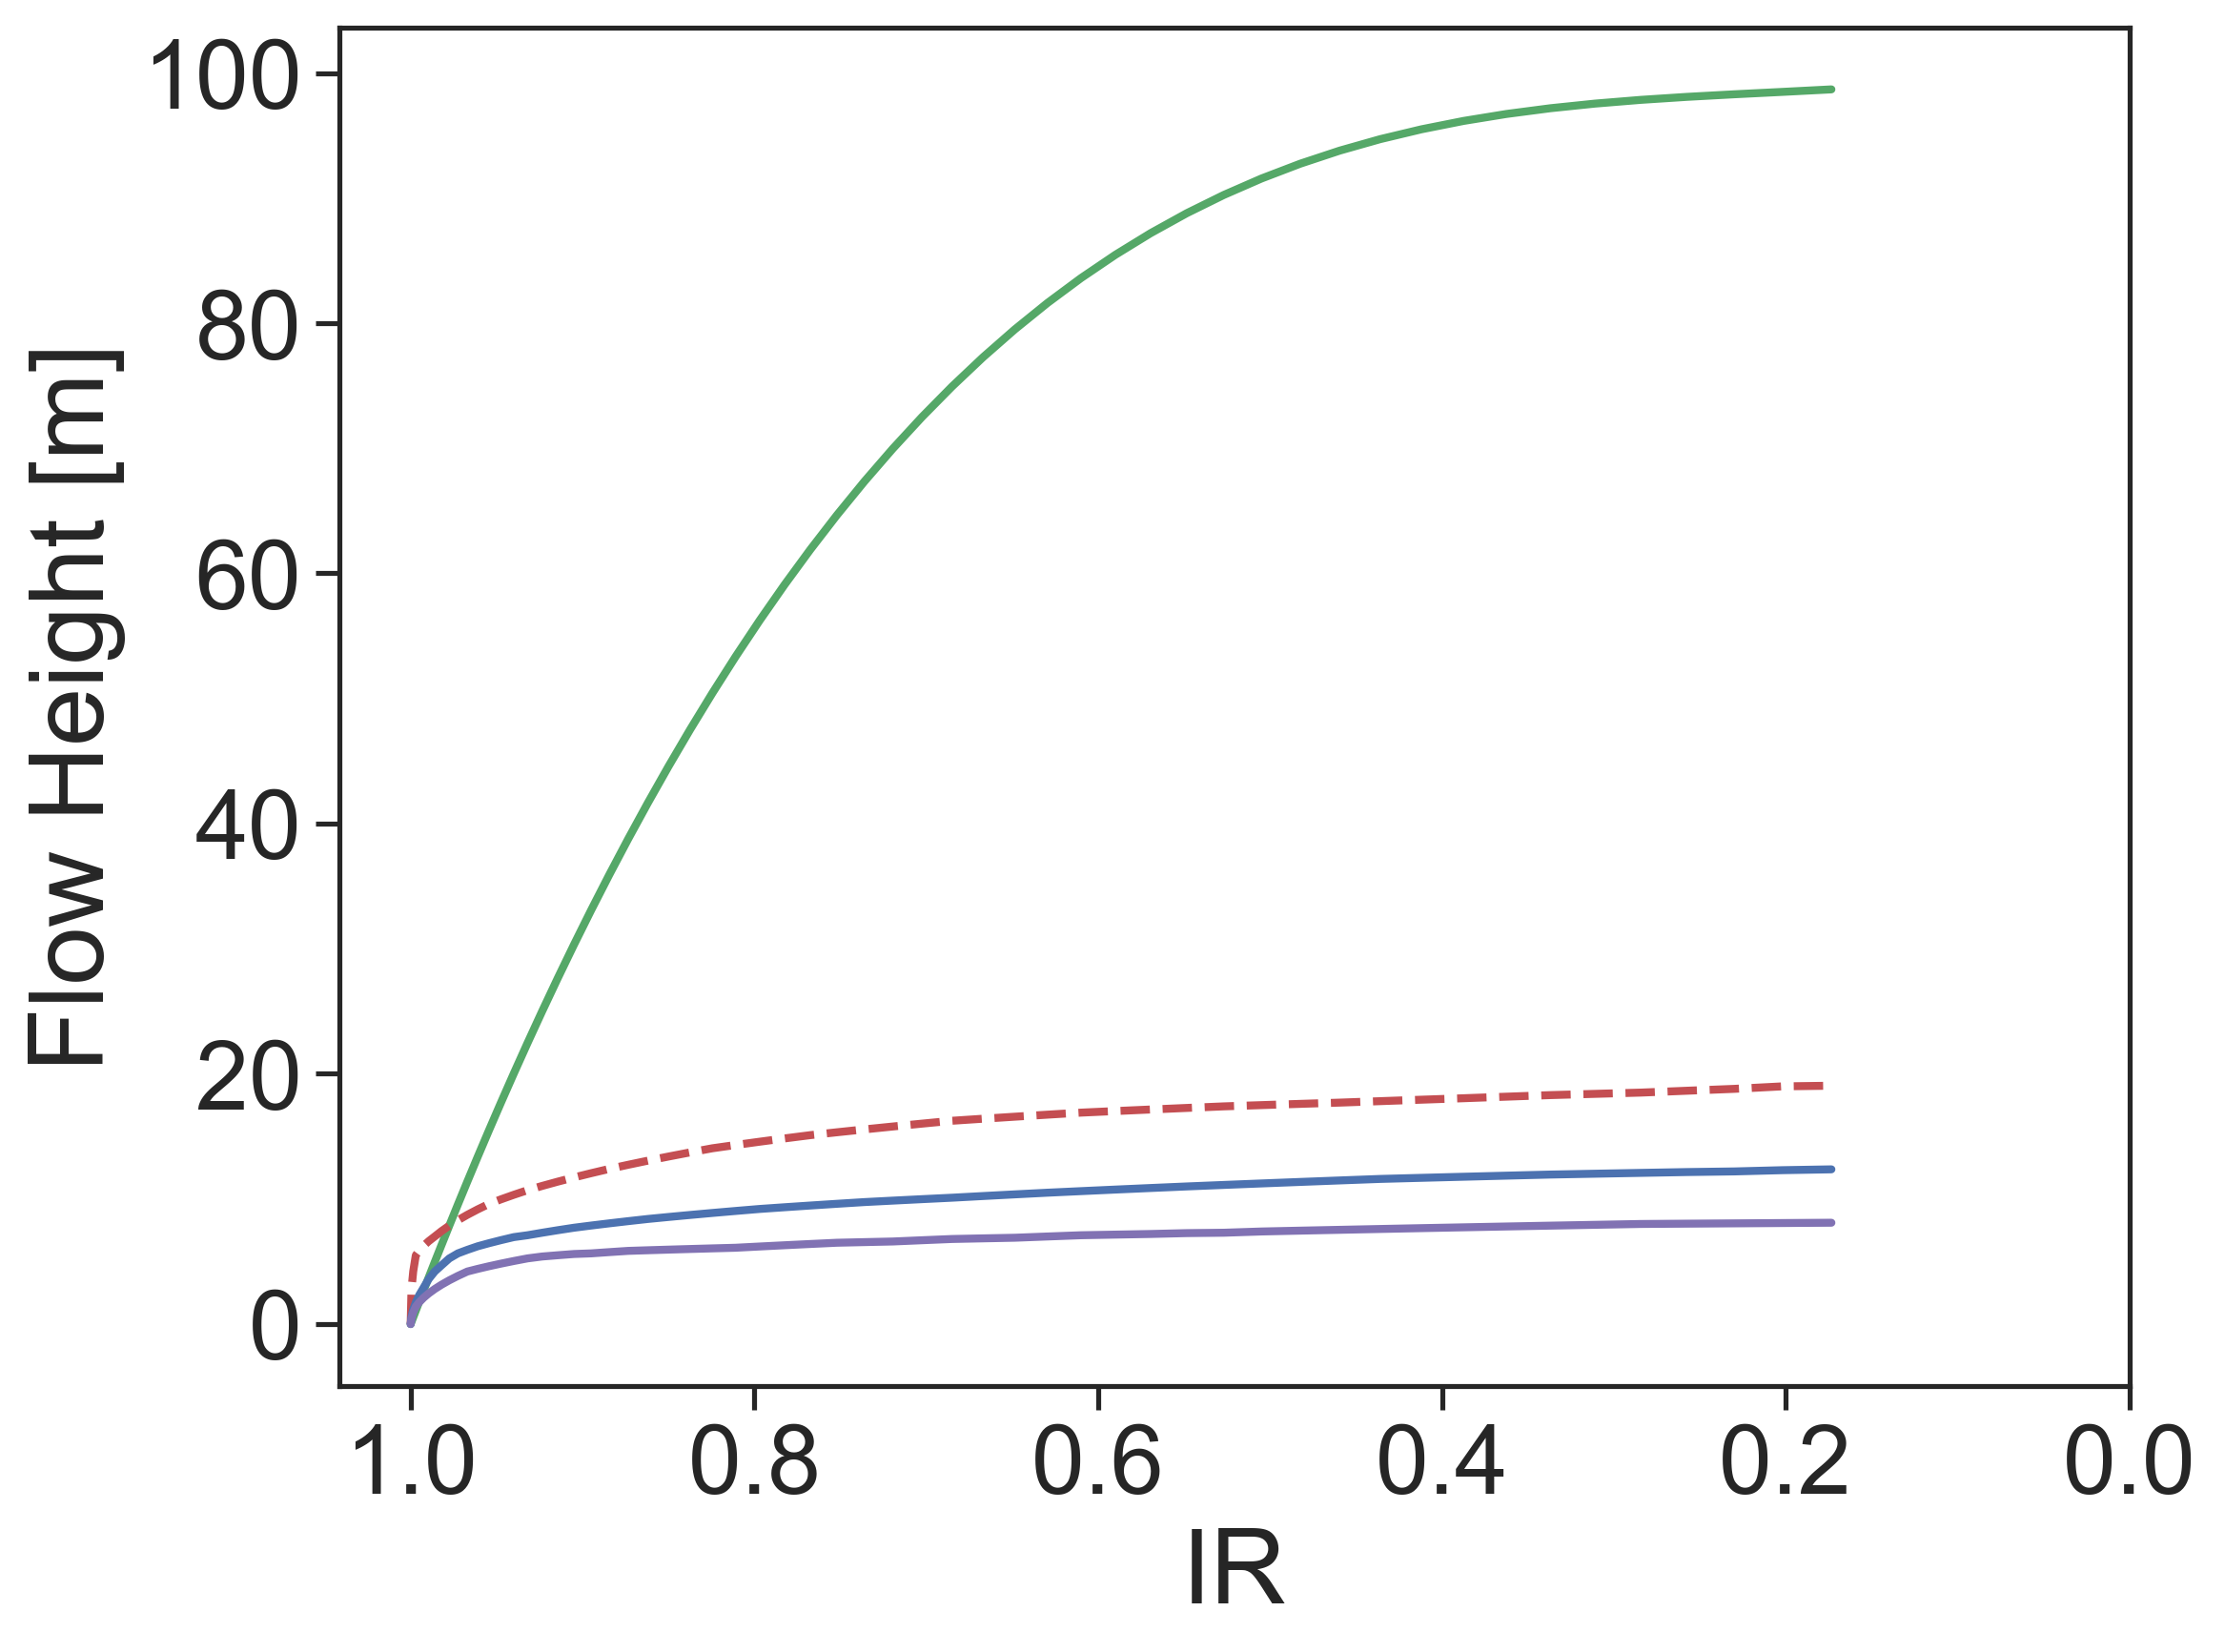

In [26]:

plt.plot(df.iloc[0:58,0], df.iloc[0:58,1], 'g-'
         , df.iloc[58:116,0], df.iloc[58:116,1],'r--'
         ,df.iloc[116:174,0], df.iloc[116:174,1],'b-'
         ,df.iloc[174:232,0], df.iloc[174:232,1], 'm-')
plt.xlabel('IR')
plt.ylabel('Flow Height [m]')
#plt.axis('equal')
#plt.axis('square')
plt.xlim([plt.xlim()[1], 0])
#plt.ylim([0,plt.ylim()[1]])
#_ = plt.plot([-100, 100], [-100, 100])

save_fig("test")

In [27]:
# ## 데이터 정규화

num_features = df.shape[1]
num_features

5

In [28]:
#df['FlowHt']=(df['FlowHt']-df['FlowHt'].mean())/df['FlowHt'].std()


df.describe()

IR  FlowHt    Sand     Ash   delIR
count 464.000 464.000 464.000 464.000 464.000
mean    0.720  18.216   0.562   0.438  -0.014
std     0.251  23.804   0.293   0.293   0.008
min     0.173   0.000   0.100   0.000  -0.029
25%     0.527   5.900   0.363   0.212  -0.021
50%     0.790   8.882   0.550   0.450  -0.014
75%     0.948  15.365   0.787   0.637  -0.007
max     1.000  98.685   1.000   0.900   0.000

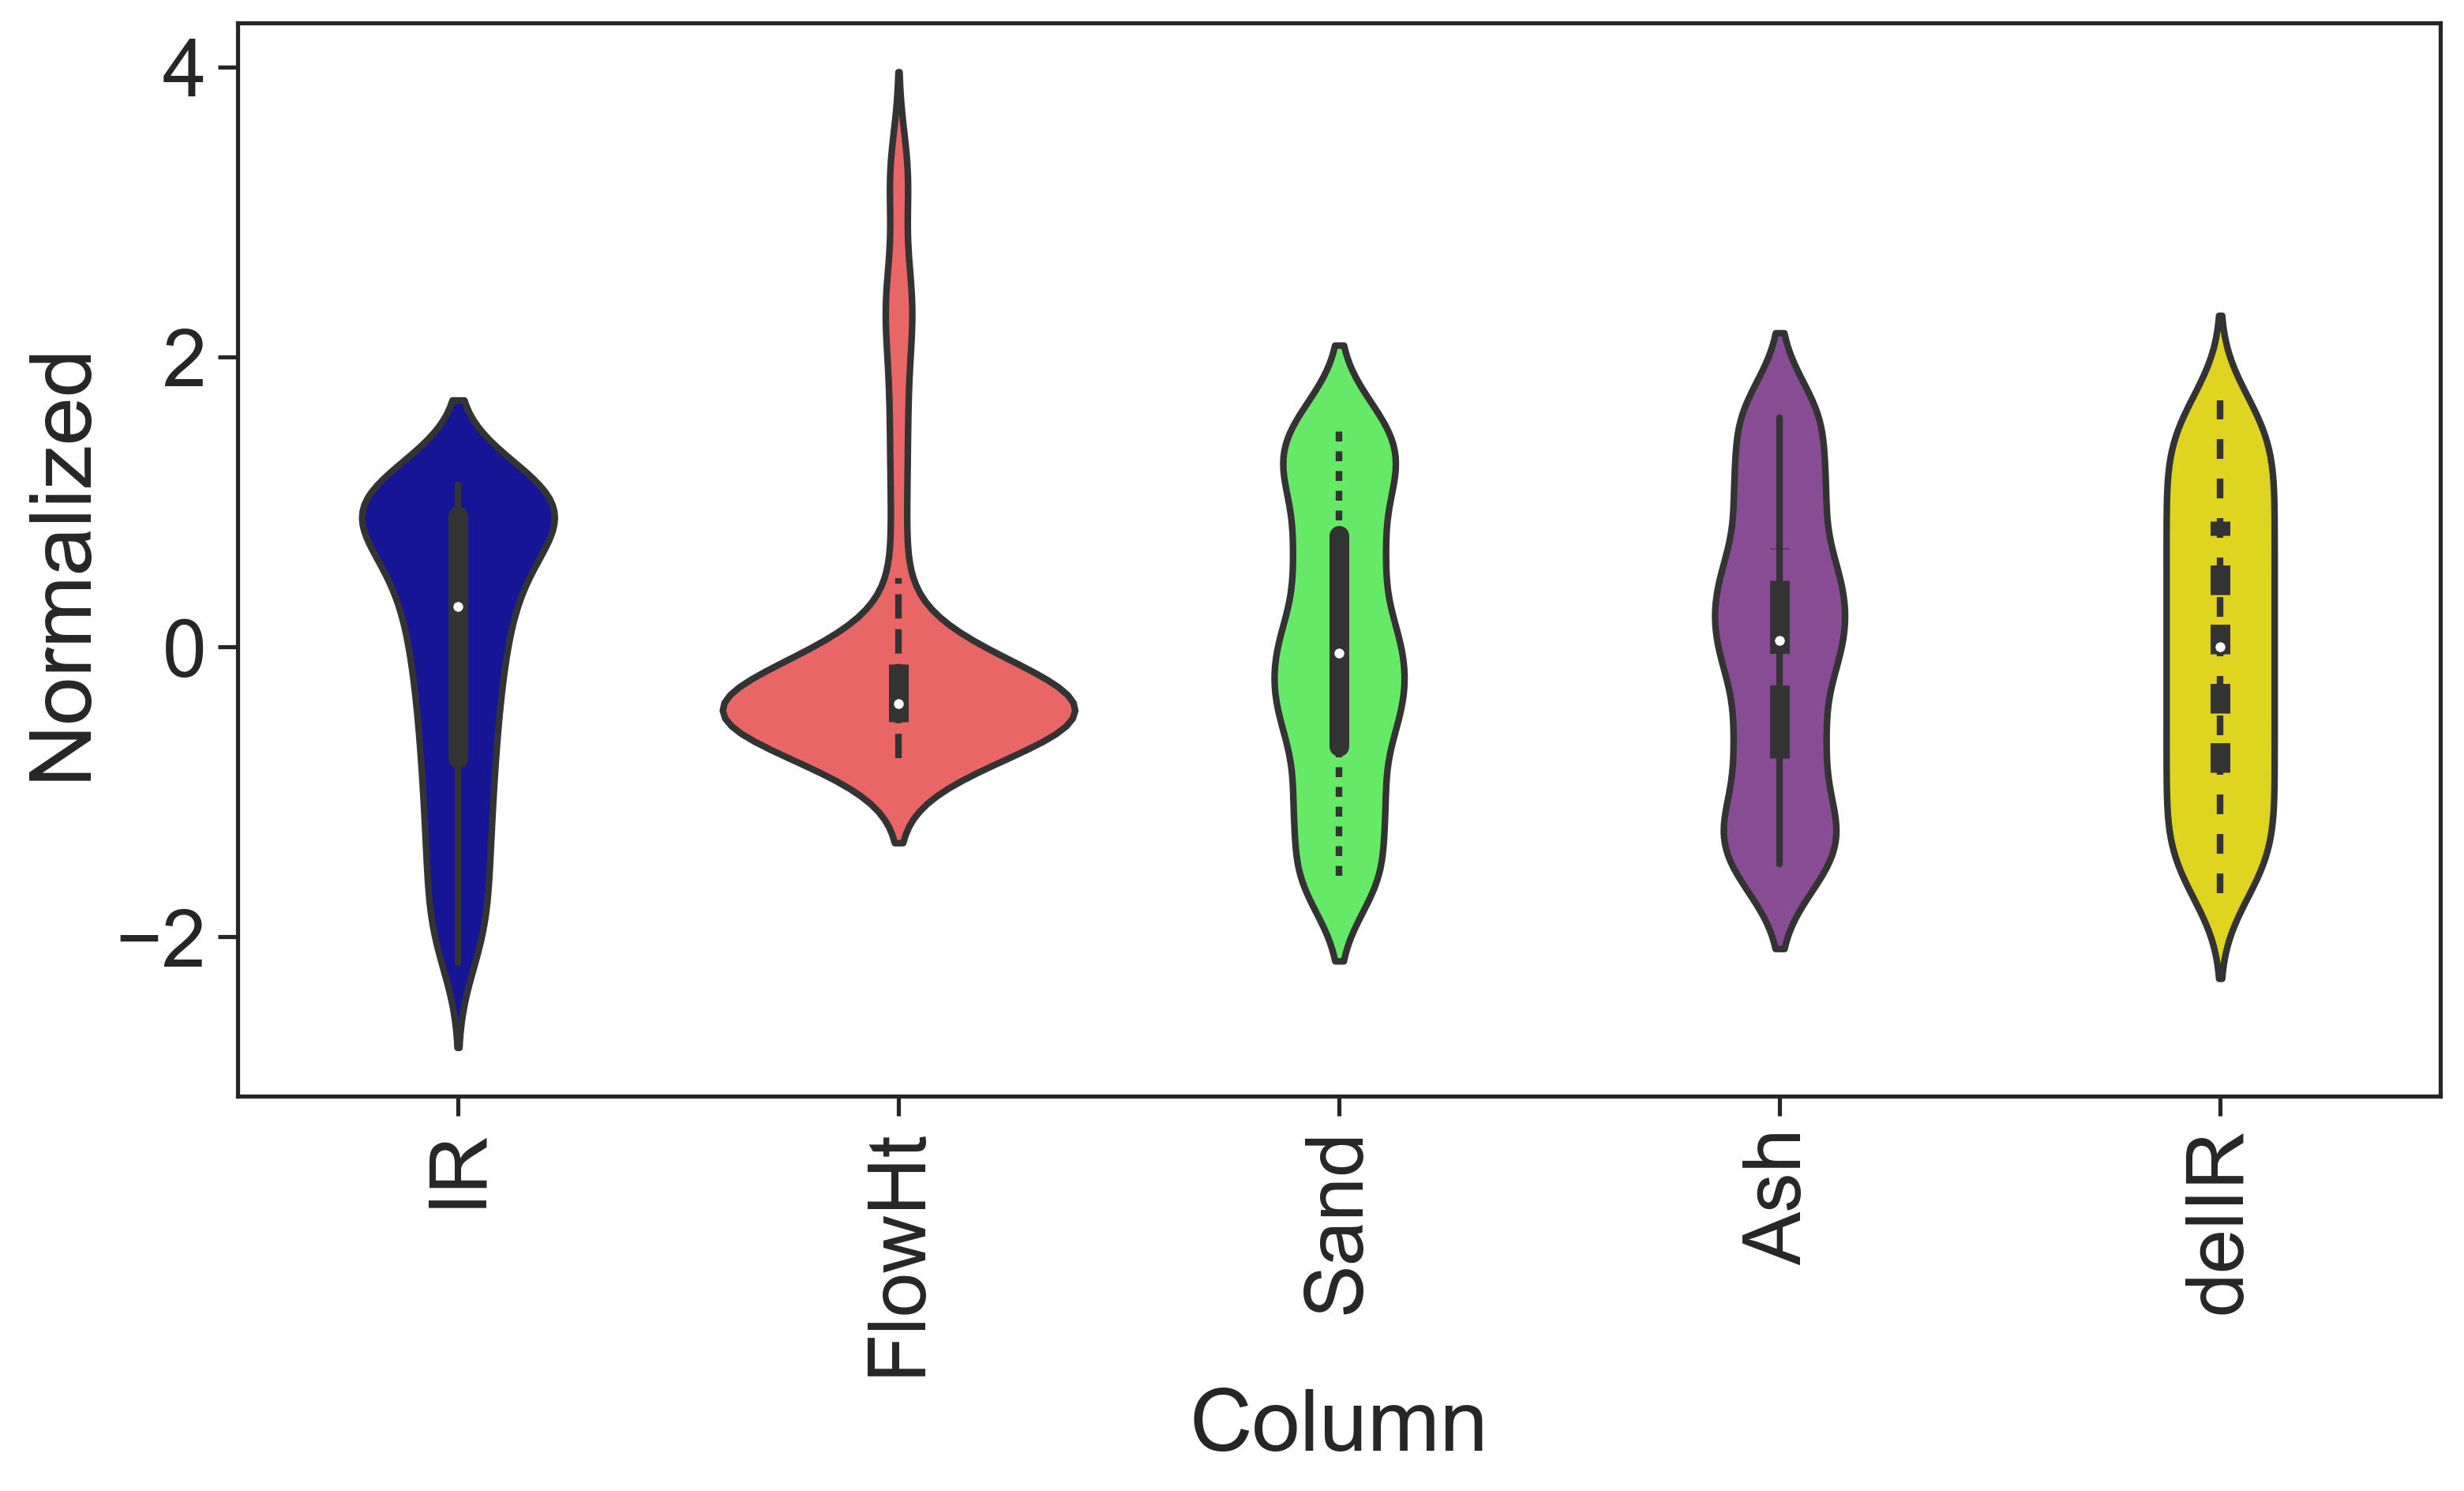

In [29]:
df_mean = df.mean()
df_std = df.std()
df_std_s = (df - df_mean) / df_std
df_std_m = df_std_s.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std_m)
_ = ax.set_xticklabels(df.keys(), rotation=90)
df_std_s.describe()
plt.show()

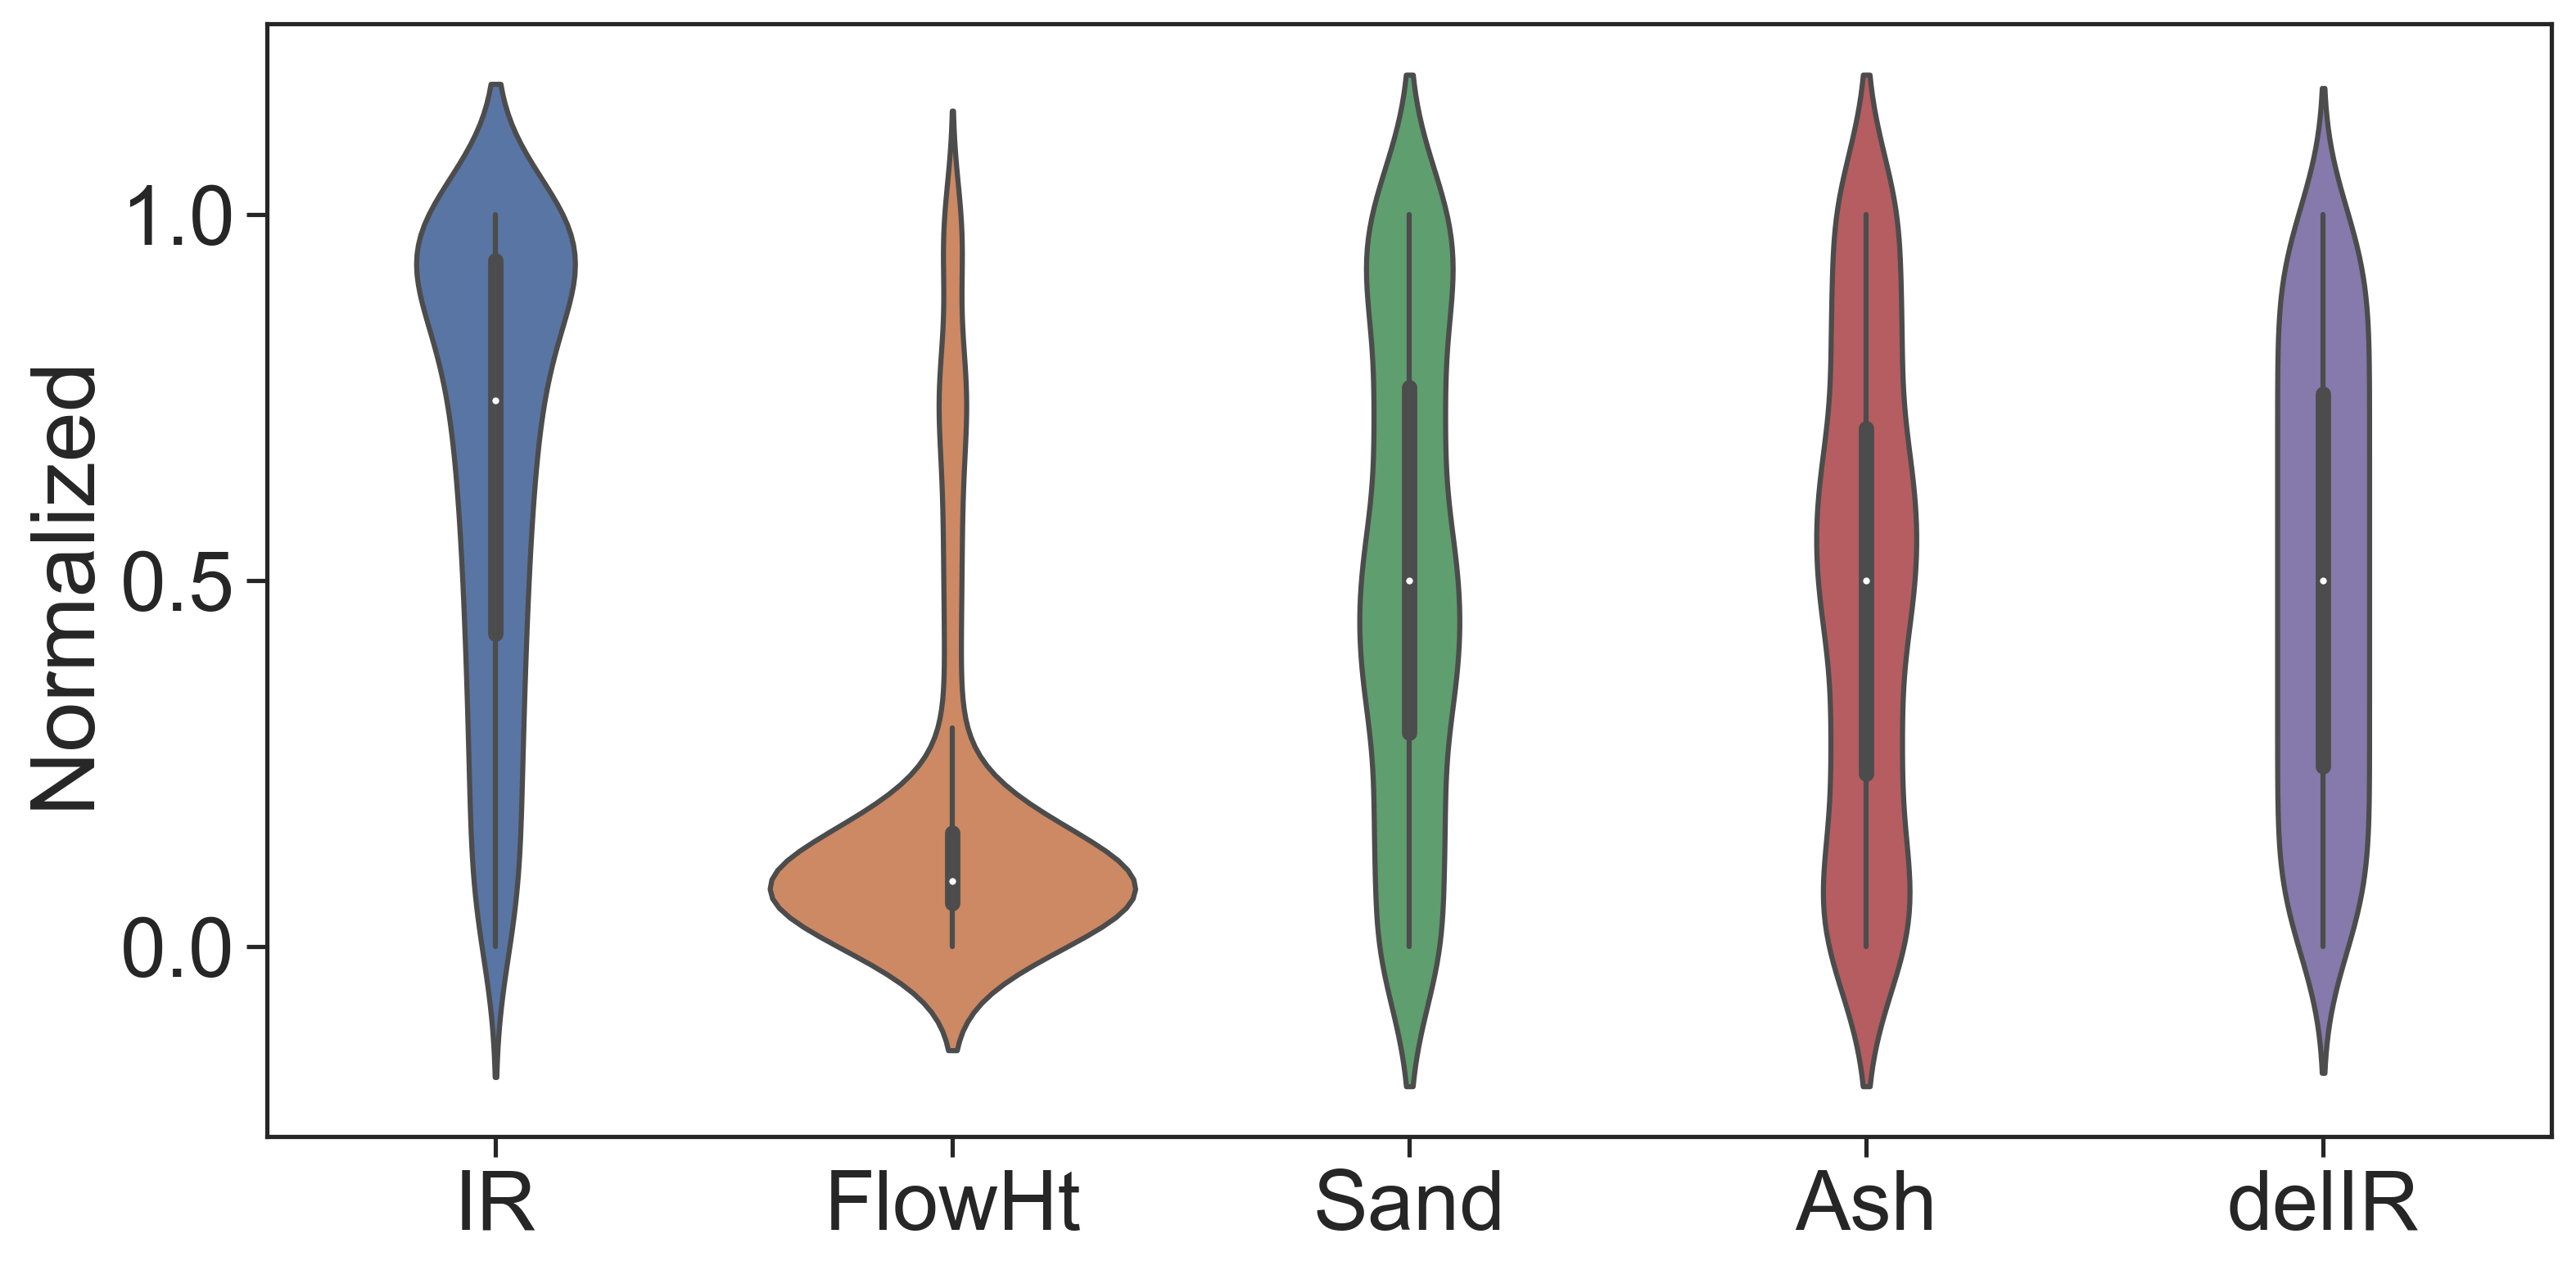

Saving figure violine


<Figure size 2400x1800 with 0 Axes>

In [30]:
df_min = df.min()
df_max = df.max()
df_std_01 = (df - df_min) / (df_max-df_min)
df_std_m01 = df_std_01.melt(var_name='Column', value_name='Normalized')

sns.set(font_scale=2.2)
sns.set_style("white")
sns.set_style("ticks")

fig = plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std_m01 )

#_ = ax.set_xticklabels(df.keys(), rotation=0,  fontsize=24)
_ = ax.set_xticklabels(df.keys(), rotation=0)
#_ = ax.set_yticklabels(df_std_m01['Normalized'].map('{:,.3f}'.format), rotation=0,  fontsize=22)

ax.set_xlabel("")
#ax.set_ylabel("Normalized", fontsize=25)
#ax.set_xlabel("", fontsize=20)
#ax.set_ylabel("Normalized", fontsize=25)

plt.show()
save_fig("violine")
fig.savefig("figures/viol.png", dpi=600)
#fig.savefig("figures/viol.svg", dpi=300)
#fig.savefig("figures/viol.eps", dpi=300)

In [31]:
pd.set_option('display.float_format', lambda x: '%.3f' % x)

df_std_01.describe()

IR  FlowHt    Sand     Ash   delIR
count 464.000 464.000 464.000 464.000 464.000
mean    0.661   0.185   0.514   0.486   0.500
std     0.304   0.241   0.325   0.325   0.294
min     0.000   0.000   0.000   0.000   0.000
25%     0.428   0.060   0.292   0.236   0.246
50%     0.746   0.090   0.500   0.500   0.500
75%     0.936   0.156   0.764   0.708   0.754
max     1.000   1.000   1.000   1.000   1.000

In [32]:
"""   # desc = df_std_s['IR'].describe()
desc = df_std_s.describe()

    #create a subplot without frame
plot = plt.subplot(111, frame_on=False)

    #remove axis
plot.xaxis.set_visible(False)
plot.yaxis.set_visible(False)

    #create the table plot and position it in the upper left corner

plot.table(desc,loc='upper right')

    #save the plot as a png file
    #plt.savefig('desc_plot.png')
"""

"   # desc = df_std_s['IR'].describe()\ndesc = df_std_s.describe()\n\n    #create a subplot without frame\nplot = plt.subplot(111, frame_on=False)\n\n    #remove axis\nplot.xaxis.set_visible(False)\nplot.yaxis.set_visible(False)\n\n    #create the table plot and position it in the upper left corner\n\nplot.table(desc,loc='upper right')\n\n    #save the plot as a png file\n    #plt.savefig('desc_plot.png')\n"

In [33]:
"""#fig, ax = plt.subplots(1,2, figsize=(20, 10))
fig, ax = plt.subplots(figsize=(10, 10))

# hide axes
# fig.patch.set_visible(False)
#ax[0][0].axis('off')
ax.axis('off')
#ax[0][1].axis('off')
#ax[0][1].axis('tight')
#ax[0][0].axis('tight')

#df = pd.DataFrame(np.random.rand(10, 4), columns=list('ABCD'))

#ax[0][0].table(cellText=df_std_s.head().values, colLabels=df_std_s.columns, loc='center')
ax.table(cellText=df_std_s.head().values, colLabels=df_std_s.columns, loc='center')

#df.plot(kind='hist', ax=ax[1][0])
#df.plot(kind='box', ax=ax[1][1])

fig.tight_layout()

plt.show()
"""

"#fig, ax = plt.subplots(1,2, figsize=(20, 10))\nfig, ax = plt.subplots(figsize=(10, 10))\n\n# hide axes\n# fig.patch.set_visible(False)\n#ax[0][0].axis('off')\nax.axis('off')\n#ax[0][1].axis('off')\n#ax[0][1].axis('tight')\n#ax[0][0].axis('tight')\n\n#df = pd.DataFrame(np.random.rand(10, 4), columns=list('ABCD'))\n\n#ax[0][0].table(cellText=df_std_s.head().values, colLabels=df_std_s.columns, loc='center')\nax.table(cellText=df_std_s.head().values, colLabels=df_std_s.columns, loc='center')\n\n#df.plot(kind='hist', ax=ax[1][0])\n#df.plot(kind='box', ax=ax[1][1])\n\nfig.tight_layout()\n\nplt.show()\n"

#### determined not to applied the normalization

In [34]:
# data
df_org = df
df = df_std_s
df = df_std_01

column_indices = {name: i for i, name in enumerate(df.columns)}

n = len(df)*0.5

curve_0 = df[0:int(n*0.25)].copy()
curve_1 = df[int(n*0.25):int(n*0.5)].copy()
curve_2 = df[int(n*0.5):int(n*0.75)].copy()
curve_3 = df[int(n*0.75):int(n)].copy()
curve_4 = df[int(n):].copy()
#train_df_s = train_df_s.reset_index(drop=True)

In [35]:
df.describe()
#print(df[58:116])

IR  FlowHt    Sand     Ash   delIR
count 464.000 464.000 464.000 464.000 464.000
mean    0.661   0.185   0.514   0.486   0.500
std     0.304   0.241   0.325   0.325   0.294
min     0.000   0.000   0.000   0.000   0.000
25%     0.428   0.060   0.292   0.236   0.246
50%     0.746   0.090   0.500   0.500   0.500
75%     0.936   0.156   0.764   0.708   0.754
max     1.000   1.000   1.000   1.000   1.000

Saving figure normalcurve


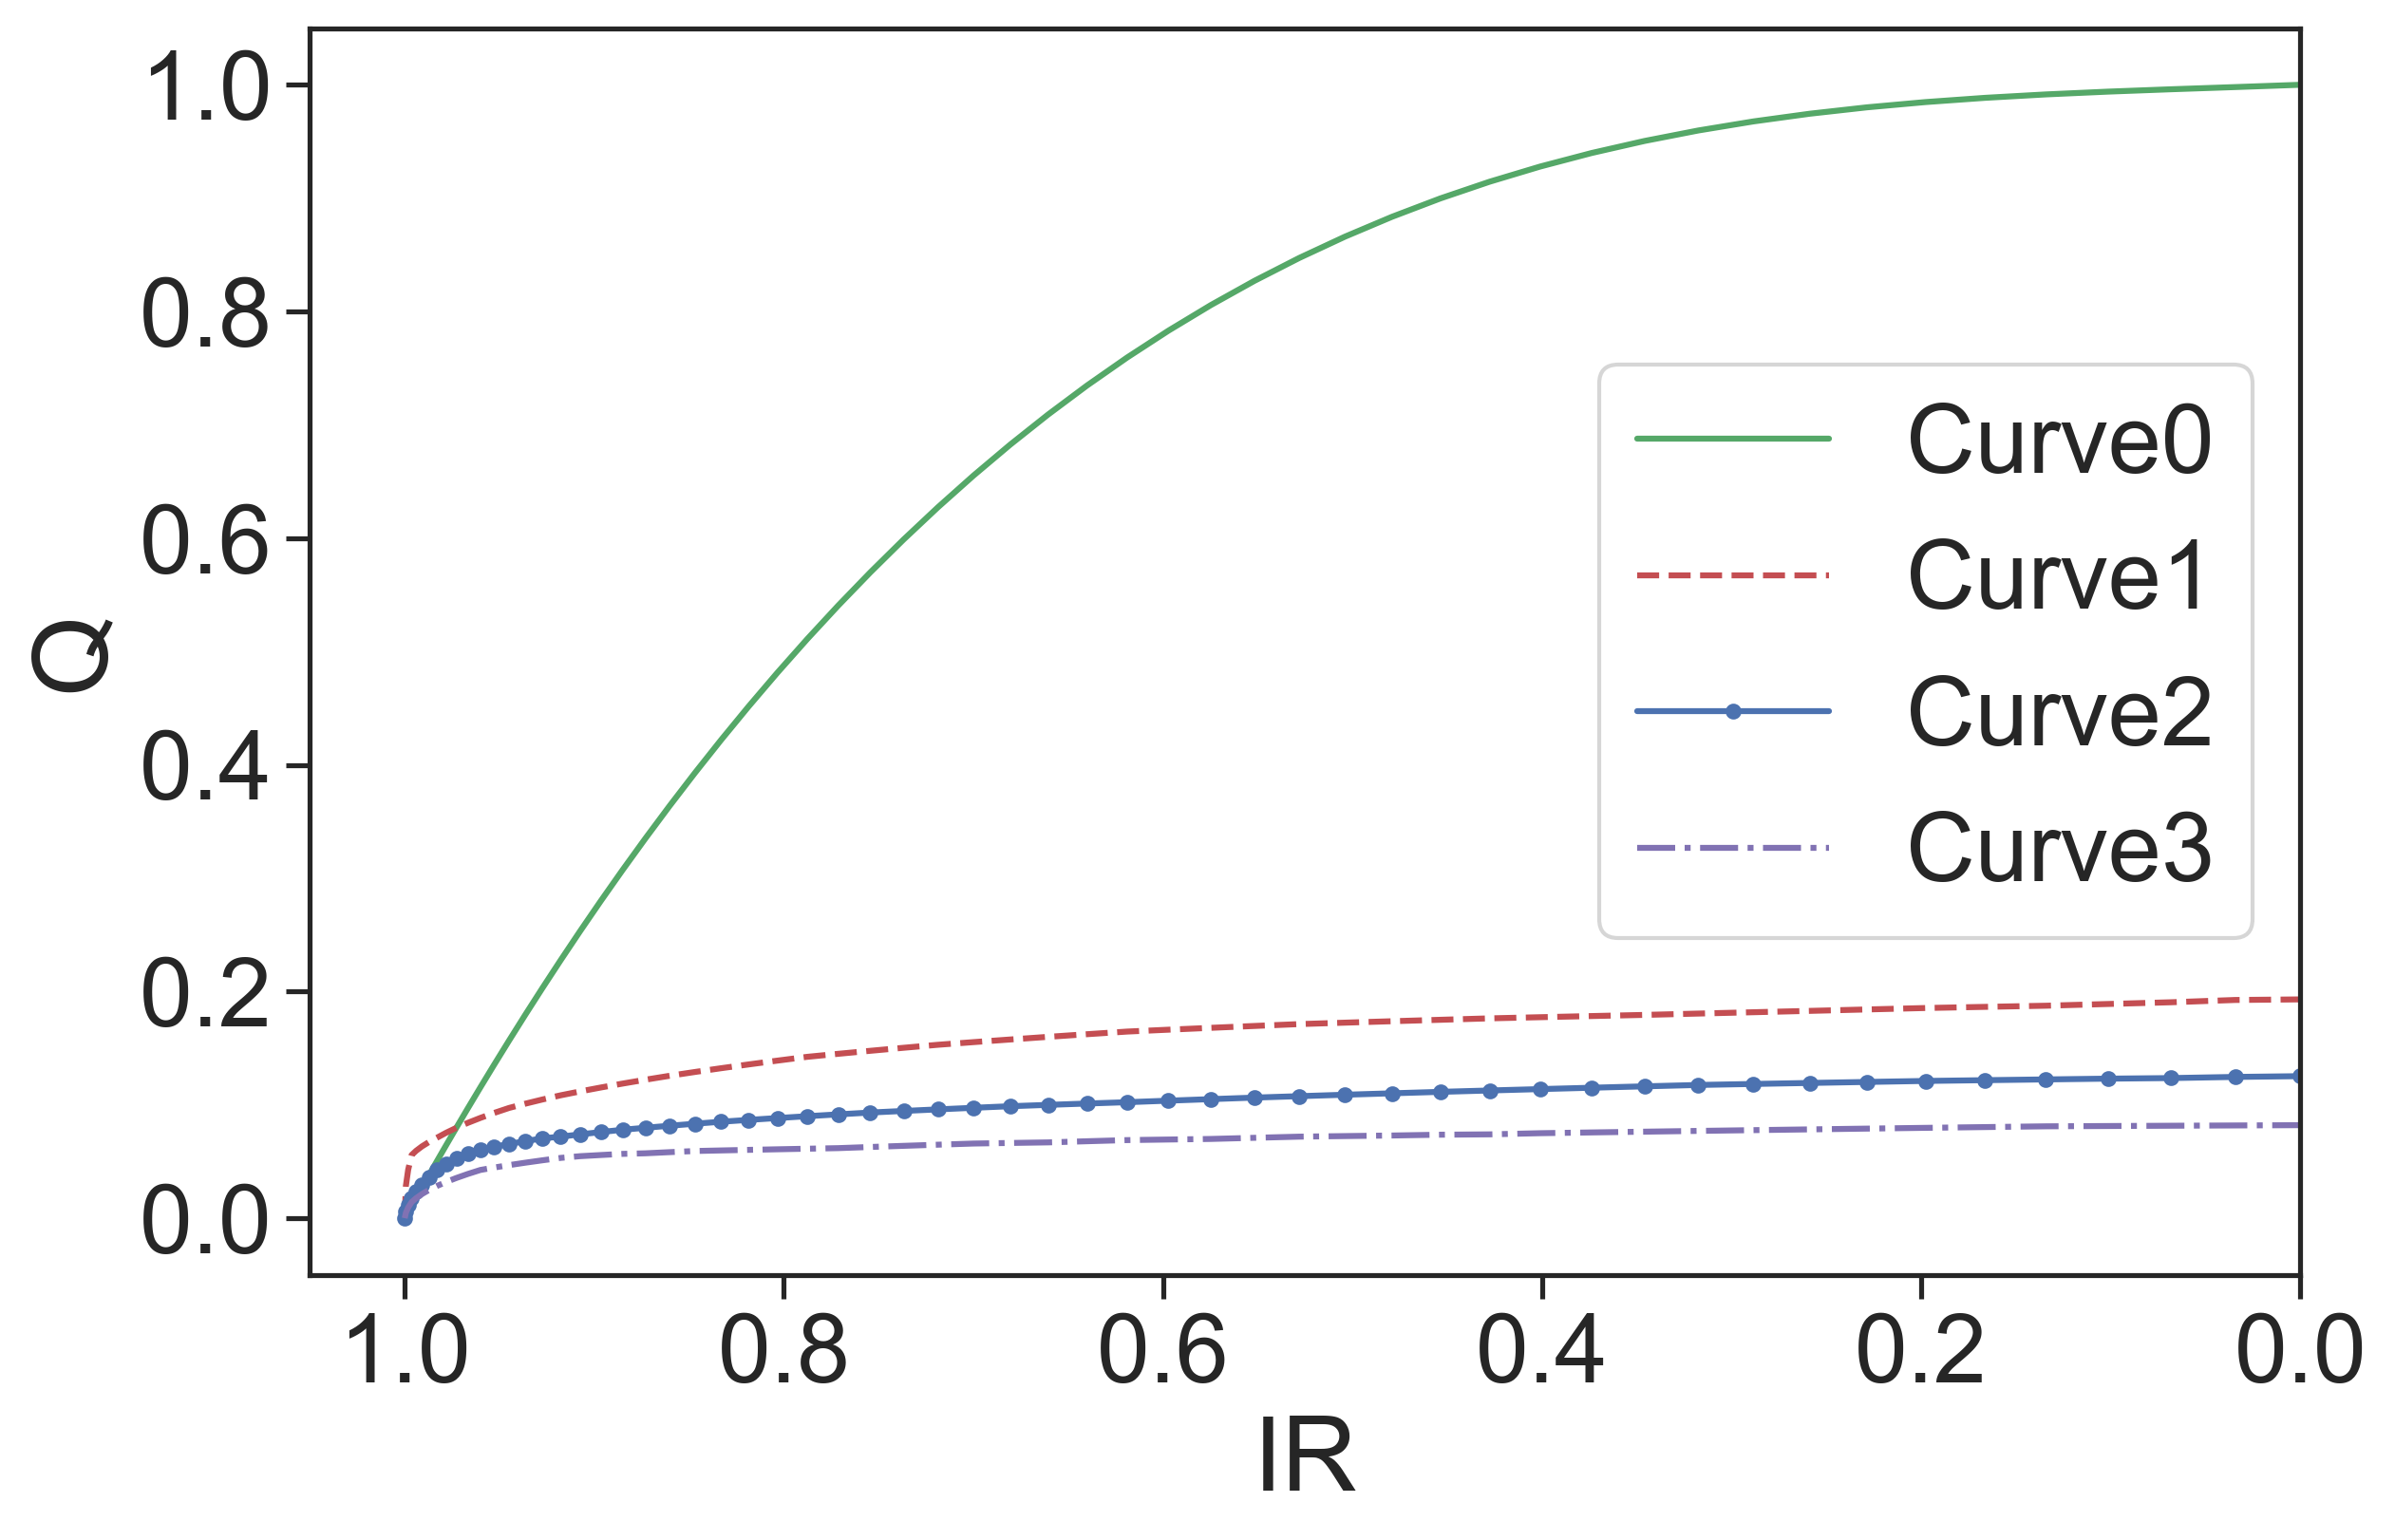

In [36]:
#sns.set(font_scale=1.2)
#sns.set_style("white")
#sns.set_style("ticks")
#sns.set()
#sns.set_style()
plt.figure(figsize=(9,6))

plt.plot(df.iloc[0:58,0], df.iloc[0:58,1], 'g-', label='Curve0')
plt.plot(df.iloc[58:116,0], df.iloc[58:116,1],'r--', label='Curve1')
plt.plot(df.iloc[116:174,0], df.iloc[116:174,1],'b.-', label='Curve2')
plt.plot(df.iloc[174:232,0], df.iloc[174:232,1], 'm-.', label='Curve3')
plt.xlabel('IR')
plt.ylabel('Q')
#plt.axis('equal')
#plt.axis('square')
plt.xlim([plt.xlim()[1],0])
#plt.ylim([0,plt.ylim()[1]])
#_ = plt.plot([1, 0], [0, 1])
plt.legend()

#,transparent = True
save_fig('normalcurve')
plt.savefig("figures/normcurves.png",transparent = True, dpi=600)
#plt.savefig("figures/normcurves.svg", dpi=300)
#plt.savefig("figures/normcurves.eps", dpi=300)
#plt.savefig("figures/normcurves.emf", dpi=300)

## for publish

#  curve_0


#### use plot_curve2

In [37]:
crv_0 = curve_0.copy()
crv_0 = crv_0.reset_index(drop=True)
#m1 = int(n*0.2)
m1 = int(len(curve_0))
#
m = m1*1.0
train_df_00 = crv_0[0:int(m*0.8)]
val_df_00 = crv_0[int(m*0.8):int(m*1.0)]
test_df_00 = crv_0[int(m*0.8):int(m)]

for i in range(2, 4):
#    m = m1*0.33334*i
    if i == 2 : m = m1*0.9
    if i == 3 : m = m1*1.0
    train_df_0 = crv_0[0:int(m*0.6)]
    val_df_0 = crv_0[int(m*0.6):int(m*0.8)]
    test_df_0 = crv_0[int(m*0.8):int(m)]
    exec(f'train_df_0{i-1} = train_df_0')
    exec(f'val_df_0{i-1} = val_df_0')
    exec(f'test_df_0{i-1} = test_df_0')


In [38]:
train_total = [train_df_00, train_df_01, train_df_02]
val_total = [val_df_00, val_df_01, val_df_02]
test_total = [test_df_00, test_df_01, test_df_02]

ttt = { 'tr' : train_total, 'va' : val_total, 'te' : test_total}
#ttt = { 'tr' : train_total, 'va' : val_total, 'te' : val_total}
ttt = pd.DataFrame(ttt)
print(ttt.columns)
print(ttt.index)

Index(['tr', 'va', 'te'], dtype='object')
RangeIndex(start=0, stop=3, step=1)


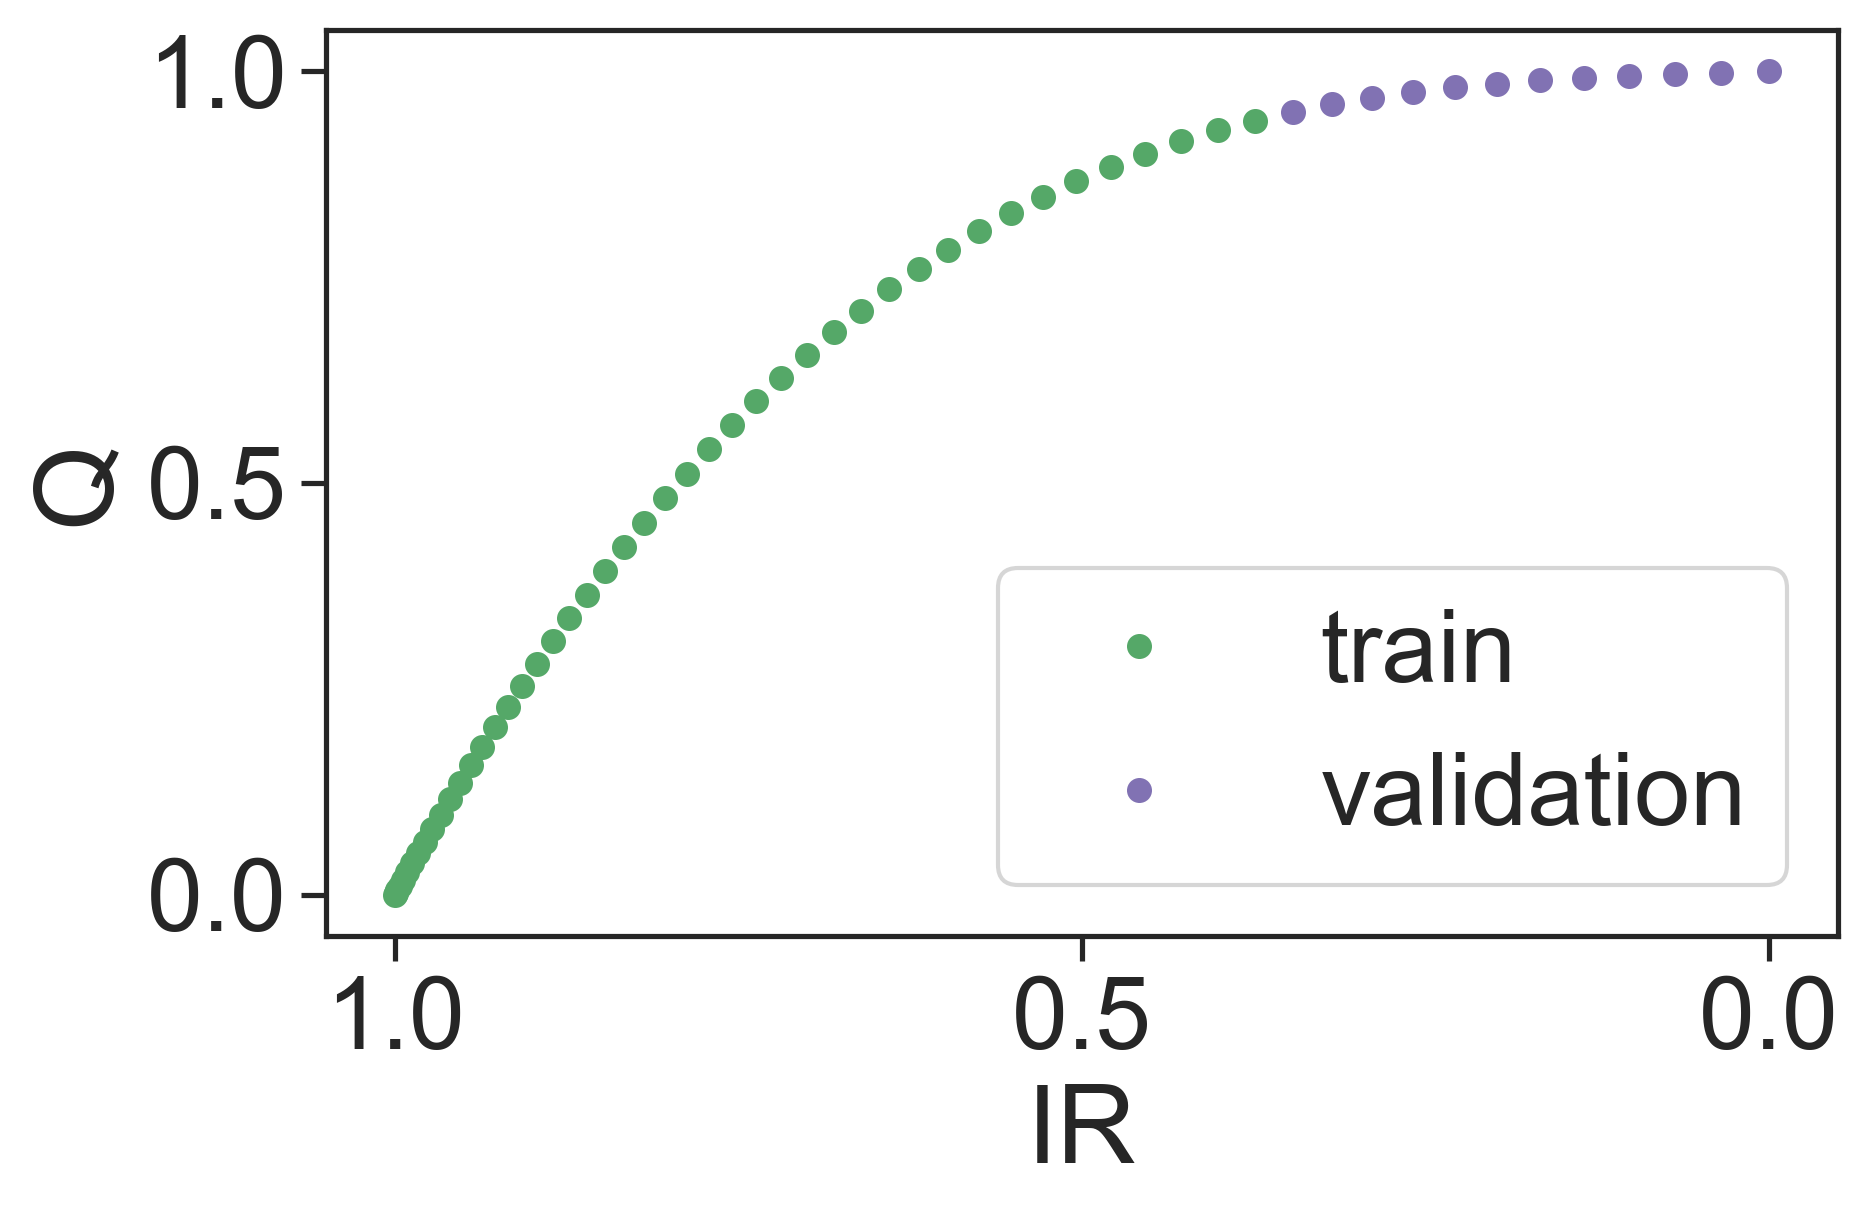

In [39]:
def plot_curve2(trg=None, valg=None, teg=None):
    if(trg is not None) : plt.plot(trg['IR'], trg['FlowHt'], 'go', label='train', markersize=5, zorder=1)
    if(valg is not None) : plt.plot(valg['IR'], valg['FlowHt'], 'mo', label='validation',  markersize=5, zorder=1)
    if(teg is not None) : plt.plot(teg['IR'], teg['FlowHt'], 'ro', label='test',  markersize=5, zorder=1)
    plt.xlabel('IR')
    plt.ylabel('Q')
    #plt.xlim([plt.xlim()[1], plt.xlim()[0]])
    plt.legend(loc='best')
    plt.gca().invert_xaxis()
   # plt.gca().invert_yaxis()
#from t_Mod.plots_t import plot_curve, eval, add_curve # absolute path, import 함수

for i in range(0, 1) :
 #   for x in dat_list :
        plt.figure(figsize=(6.5, 4))
        tr = ttt.iloc[i]['tr']
        va = ttt.iloc[i]['va']
        te = ttt.iloc[i]['te']
    #    plot_curve2(trg = tr, valg = va)
        plot_curve2( tr,  va)
   #     plots_t.plot_curve(tr, va, va)
#        t_Mod.plots_t.plot_curve(tr, va, te)
#plt.gca().set_xlim(1.05, 0)
#plt.gca().set_ylim(0, 105)
#plt.invert_xaxis()

plt.savefig("figures/crv0.png", dpi=300)


# curve 1

In [40]:
crv_1 = curve_1.copy()
m1 = int(len(crv_1))
m = m1*1.0
train_df_10 = crv_1[0:int(m*0.8)]
val_df_10 = crv_1[int(m*0.8):int(m*1.0)]
test_df_10 = crv_1[int(m*0.8):int(m)]

for i in range(2, 4):
    m = m1*0.33334*i
    train_df_1 = crv_1[0:int(m*0.6)]
    val_df_1 = crv_1[int(m*0.6):int(m*0.8)]
    test_df_1 = crv_1[int(m*0.8):int(m)]
    exec(f'train_df_1{i-1} = train_df_1')
    exec(f'val_df_1{i-1} = val_df_1')
    exec(f'test_df_1{i-1} = test_df_1')

train_t_1 = {0: train_df_10 , 1: train_df_11, 2: train_df_12 }
val_t_1 = {0: val_df_10 , 1: val_df_11, 2: val_df_12 }
test_t_1 = {0: test_df_10 , 1: test_df_11, 2: test_df_12 }

ttt_1 = { 'tr' : train_t_1, 'va' : val_t_1, 'te' : test_t_1}
ttt_1 = pd.DataFrame(ttt_1)

Saving figure crv1


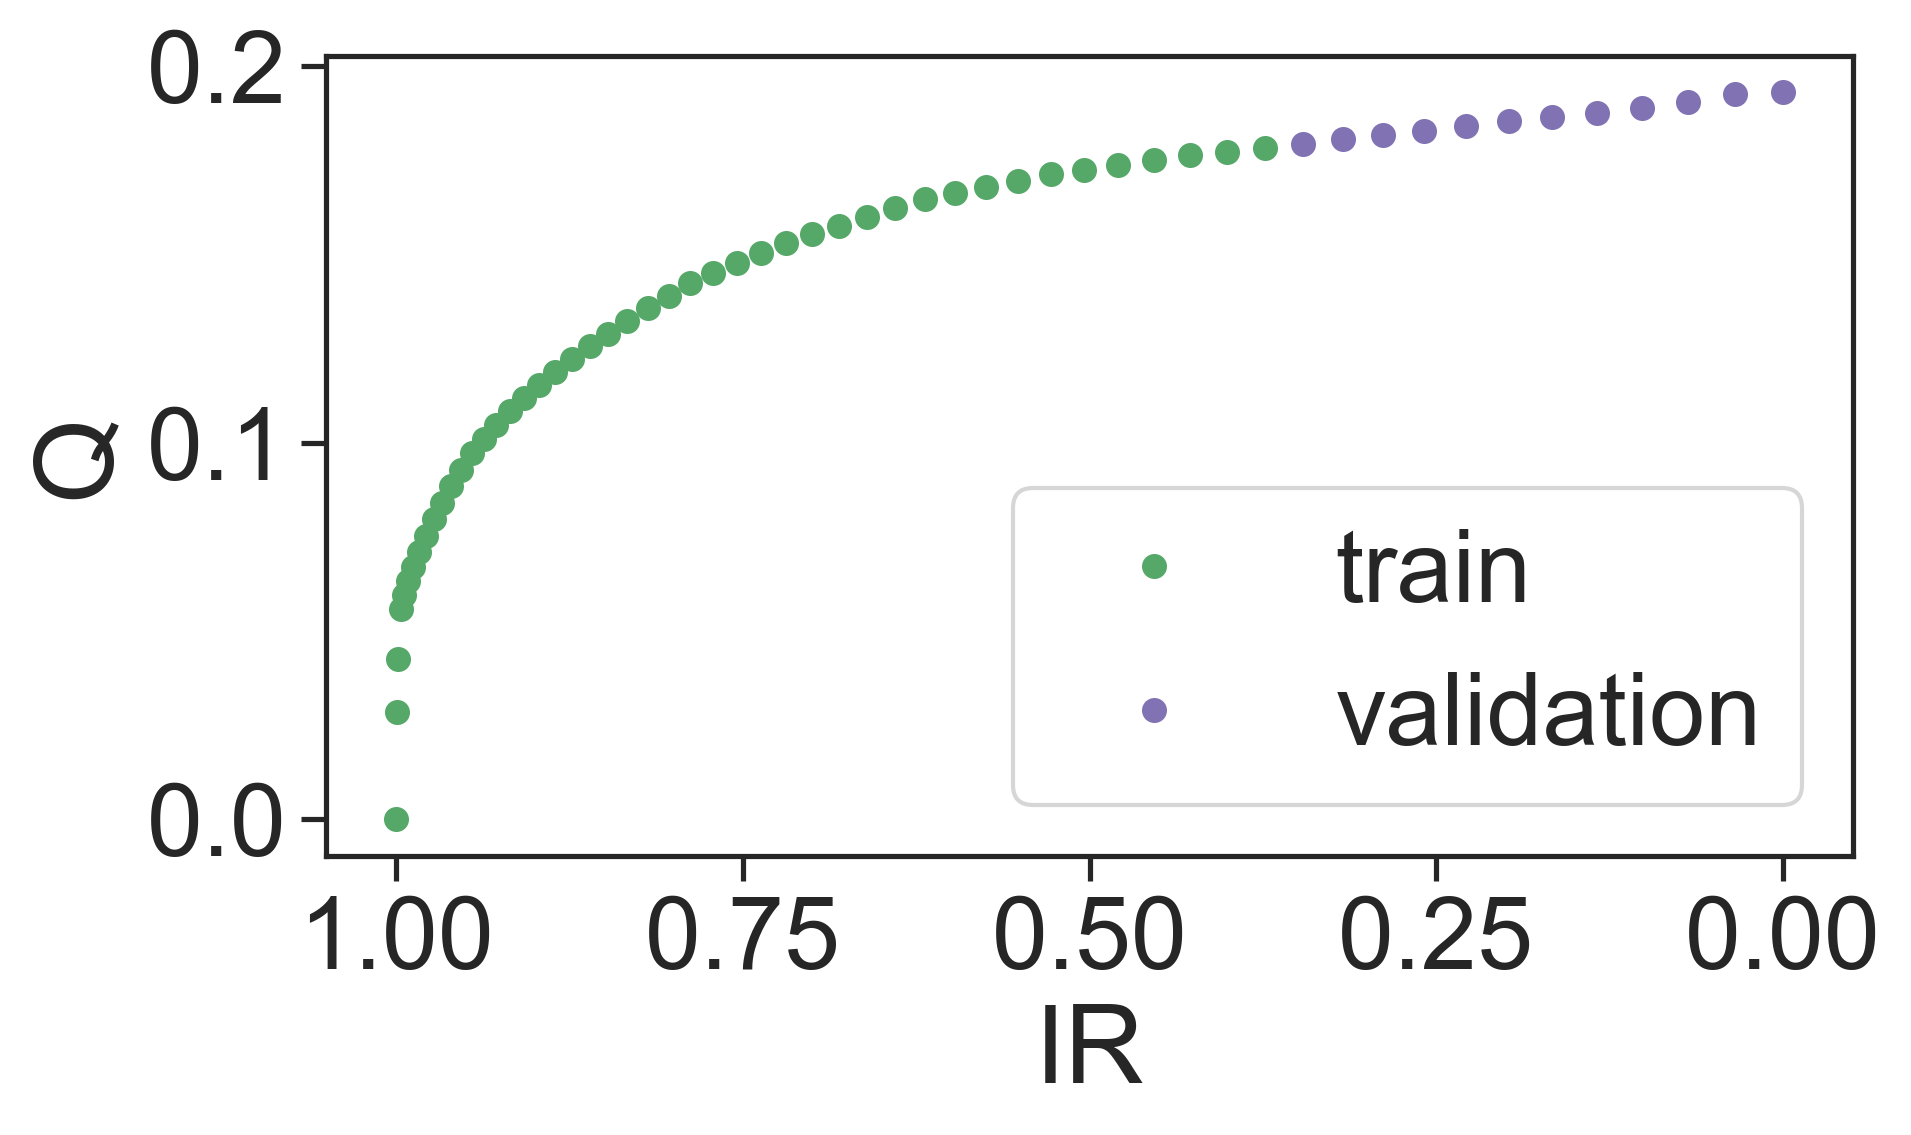

In [66]:
for i in range(0, 1) :
 #   for x in dat_list :
        plt.figure(figsize=((6.5, 4)))
        tr = ttt_1.iloc[i]['tr']
        va = ttt_1.iloc[i]['va']
        te = ttt_1.iloc[i]['te']
        plot_curve2( tr, va )
#plt.gca().set_xlim(1.05, 0)
#plt.gca().set_ylim(0, 25)
save_fig("crv1")
plt.savefig("figures/crv1.png", dpi=300)

# curve_2  -----
#### test set 100%, use train as test

In [42]:
crv_2 = curve_2.copy()
m1 = int(len(crv_2))
m = m1*1.0
train_df_20 = crv_2[0:int(m*1.0)]
val_df_20 = crv_2[int(m*0.8):int(m*1.0)]
test_df_20 = crv_2[int(m*0.0):int(m)]

for i in range(2, 4):
    m = m1*0.33334*i
    train_df_2 = crv_2[0:int(m*0.6)]
    val_df_2 = crv_2[int(m*0.6):int(m*0.8)]
    test_df_2 = crv_2[int(m*0.8):int(m)]
    exec(f'train_df_2{i-1} = train_df_2')
    exec(f'val_df_2{i-1} = val_df_2')
    exec(f'test_df_2{i-1} = test_df_2')

train_t_2 = {0: train_df_20 , 1: train_df_21, 2: train_df_22 }
val_t_2 = {0: val_df_20 , 1: val_df_21, 2: val_df_22 }
test_t_2 = {0: test_df_20 , 1: test_df_21, 2: test_df_22 }

ttt_2 = { 'tr' : train_t_2, 'va' : val_t_2, 'te' : test_t_2}
ttt_2 = pd.DataFrame(ttt_2)

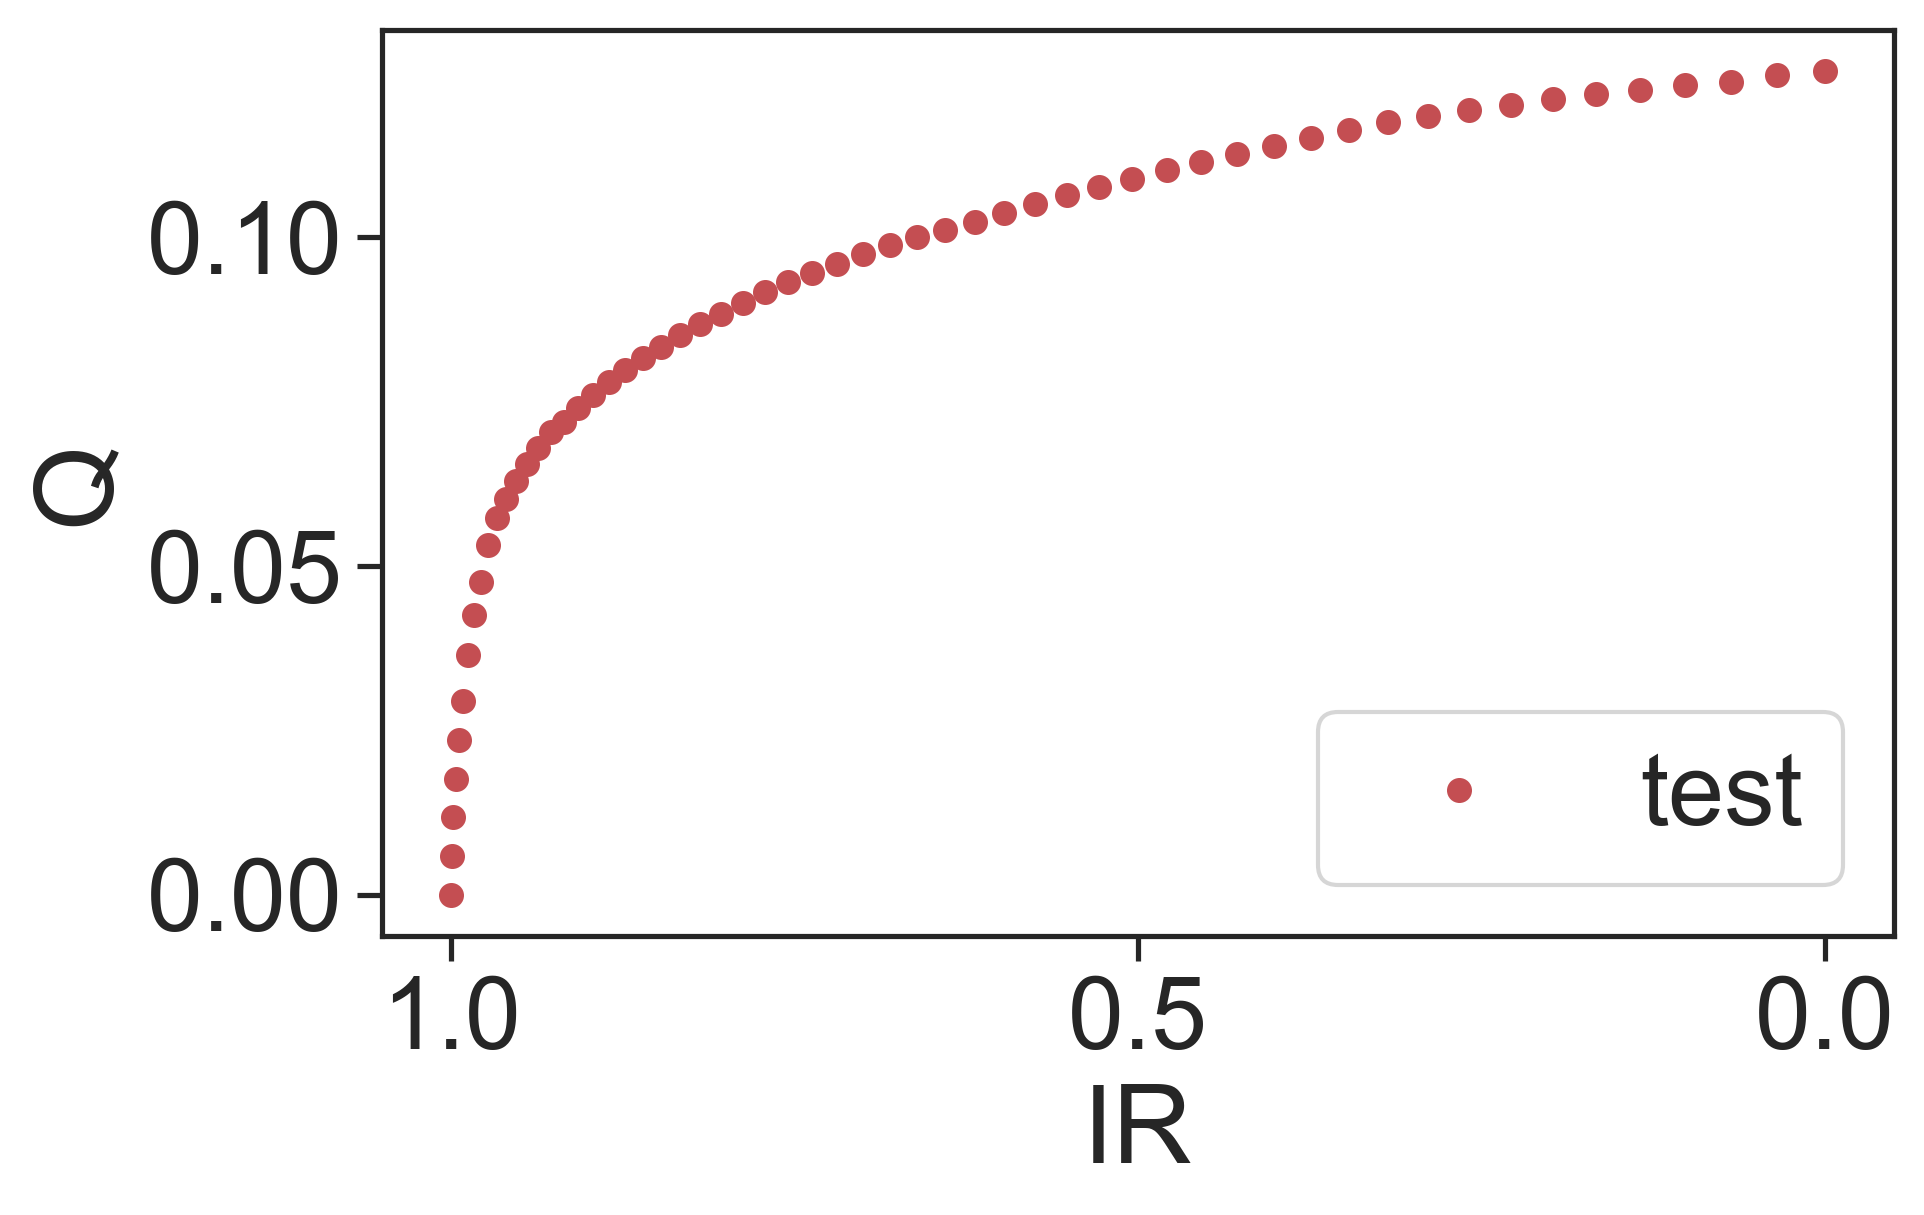

In [43]:
for i in range(0, 1) :
 #   for x in dat_list :
        plt.figure(figsize=(6.5, 4))
        tr = ttt_2.iloc[i]['tr']
        va = ttt_2.iloc[i]['va']
        te = ttt_2.iloc[i]['te']
        plot_curve2(teg = te)
#plt.gca().set_xlim(1.05, 0)
#plt.gca().set_ylim(0, 15)
plt.savefig("figures/crv2.png", dpi=300)

# curve 3

In [44]:
crv_3 = curve_3.copy()
m1 = int(len(crv_3))
m = m1*1.0
train_df_30 = crv_3[0:int(m*0.8)]
val_df_30 = crv_3[int(m*0.8):int(m*1.0)]
test_df_30 = crv_3[int(m*0.8):int(m)]

for i in range(2, 4):
    m = m1*0.33334*i
    train_df_3 = crv_3[0:int(m*0.8)]
    val_df_3 = crv_3[int(m*0.6):int(m*0.8)]
    test_df_3 = crv_3[int(m*0.8):int(m)]
    exec(f'train_df_3{i-1} = train_df_3')
    exec(f'val_df_3{i-1} = val_df_3')
    exec(f'test_df_3{i-1} = test_df_3')

train_t_3 = {0: train_df_30 , 1: train_df_31, 2: train_df_32 }
val_t_3 = {0: val_df_30 , 1: val_df_31, 2: val_df_32 }
test_t_3 = {0: test_df_30 , 1: test_df_31, 2: test_df_32 }

ttt_3 = { 'tr' : train_t_3, 'va' : val_t_3, 'te' : test_t_3}
ttt_3 = pd.DataFrame(ttt_3)

Saving figure curve123test


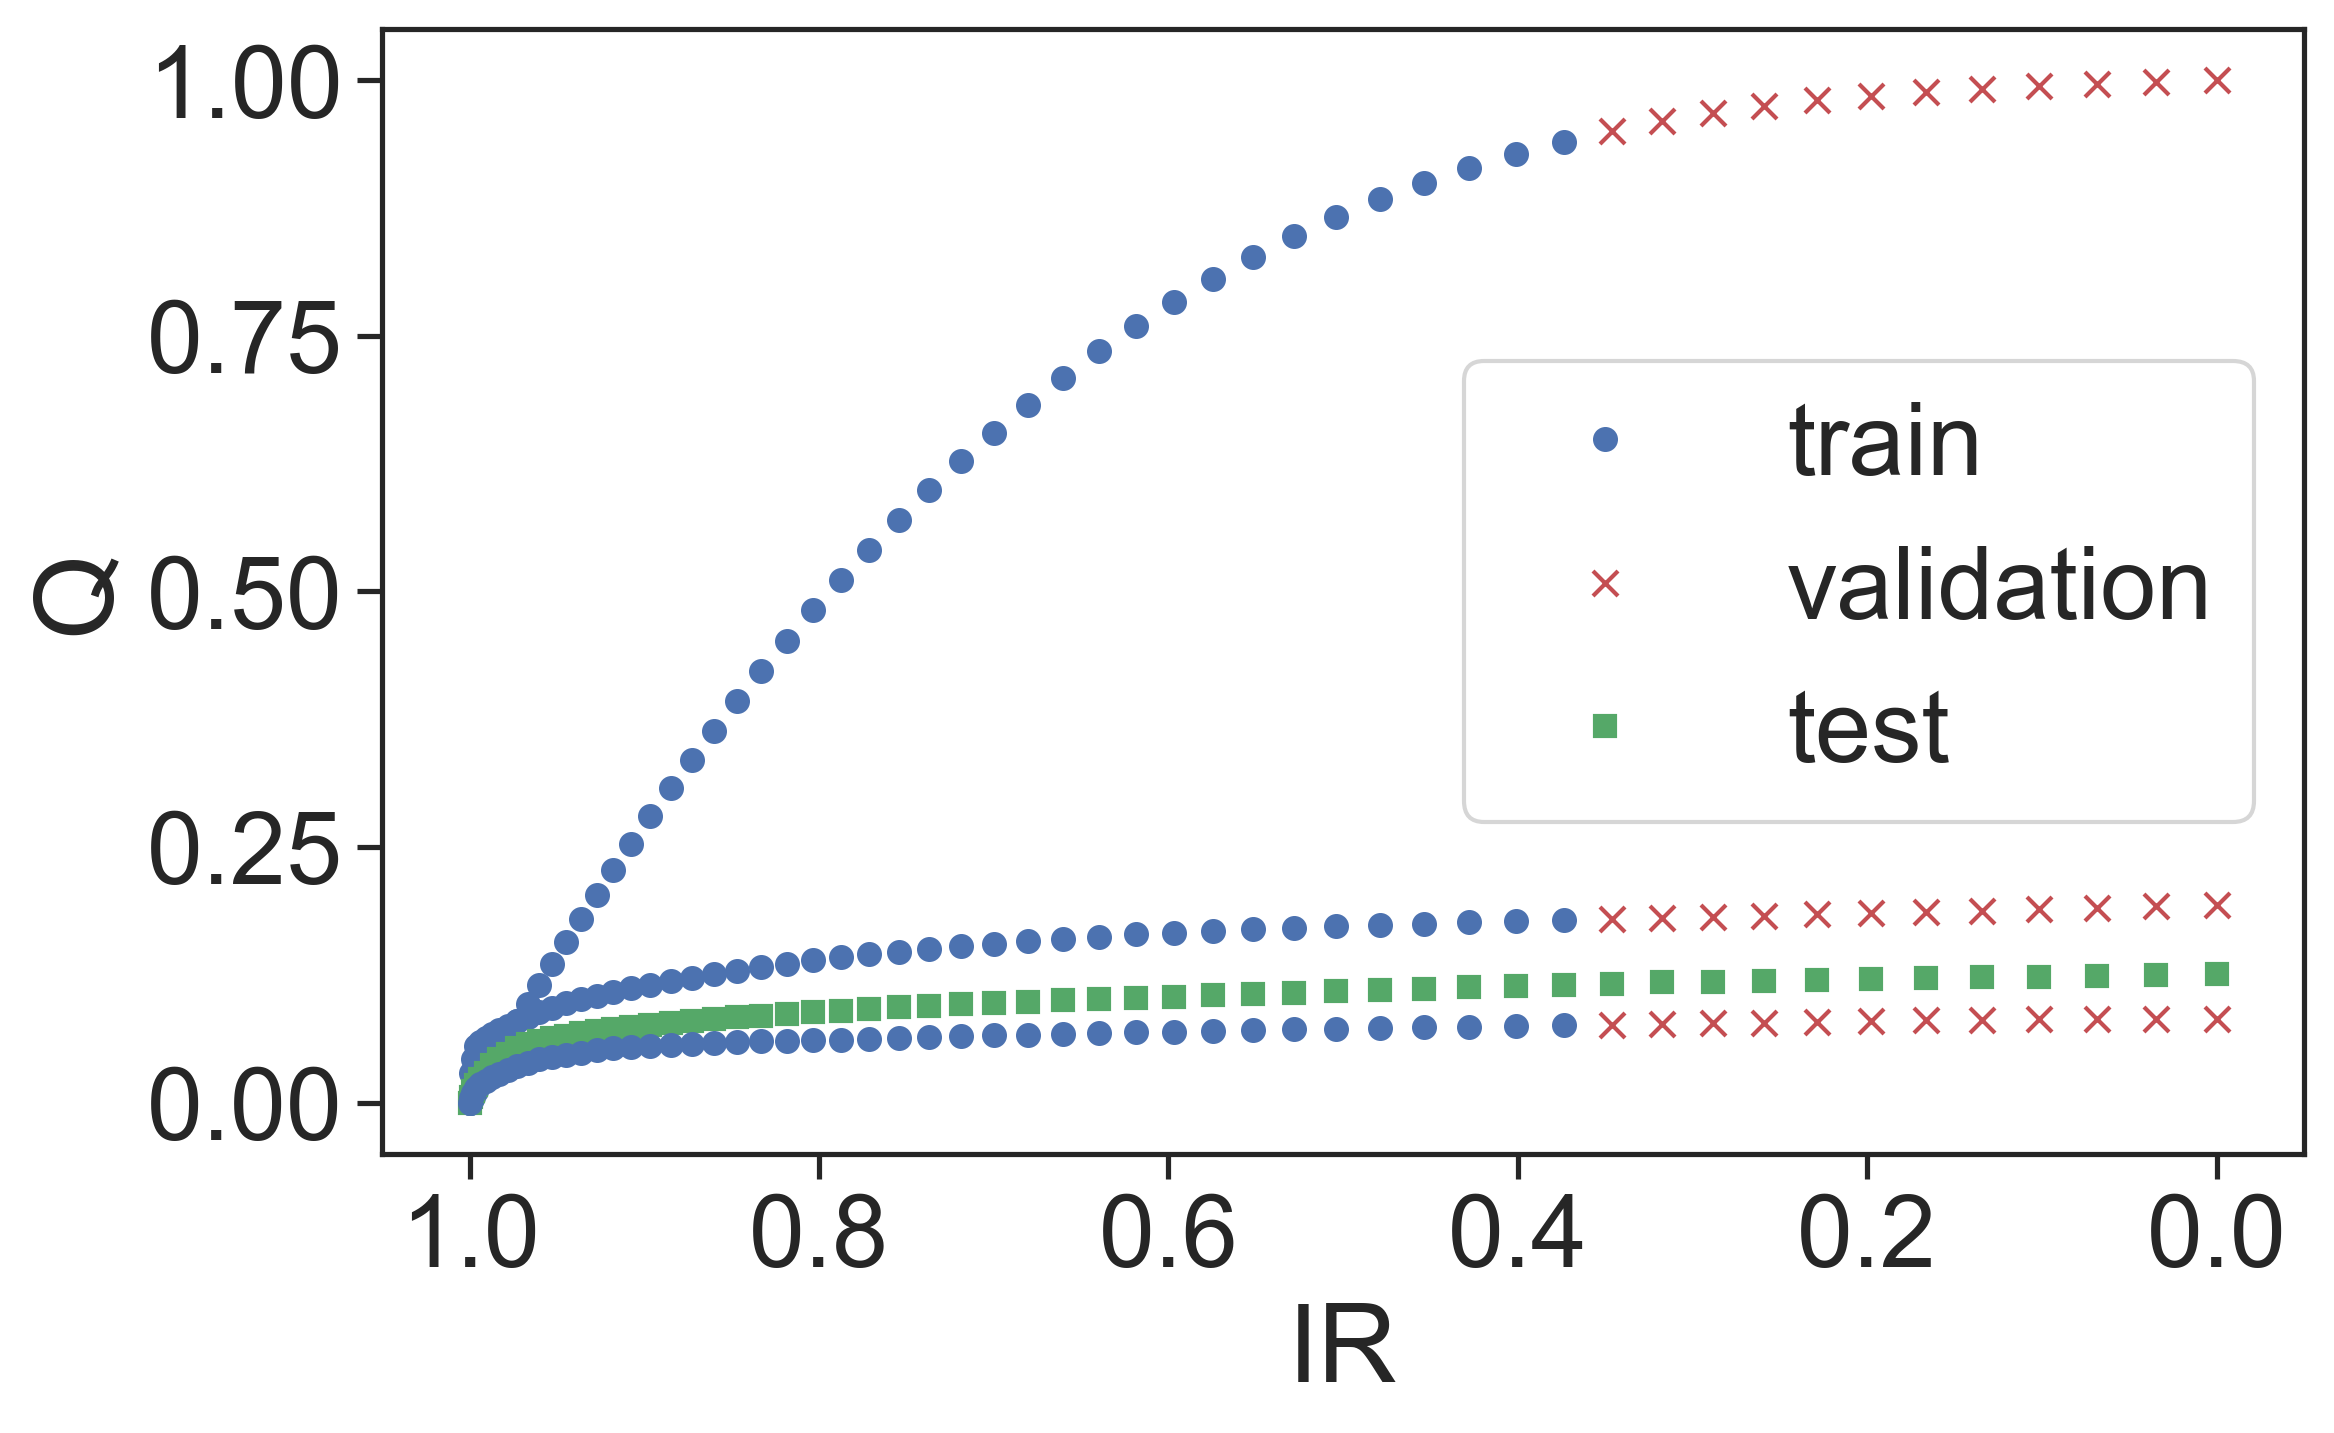

In [83]:
#for i in range(0, 1) :
 #   for x in dat_list :
plt.figure(figsize=(8,5))

tr = ttt.iloc[i]['tr']
va = ttt.iloc[i]['va']
te = ttt.iloc[i]['te']
plt.plot(tr['IR'], tr['FlowHt'], 'bo', label='train', markersize=5, zorder=1)
plt.plot(va['IR'], va['FlowHt'], 'rx',   label='validation',  markersize=6, zorder=1)
#plt.plot(va['IR'], va['FlowHt'], 'ro', markeredgecolor = ' ', label='validation',  markersize=5, zorder=1)
#plt.plot(te['IR'], te['FlowHt'], 'yo', markersize=5, zorder=1)

tr = ttt_1.iloc[i]['tr']
va = ttt_1.iloc[i]['va']
te = ttt_1.iloc[i]['te']
plt.plot(tr['IR'], tr['FlowHt'], 'bo',   markersize=5, zorder=1)
plt.plot(va['IR'], va['FlowHt'], 'rx',  markersize=6, zorder=1)
#plt.plot(te['IR'], te['FlowHt'], 'ro',   markersize=5, zorder=1)

tr = ttt_2.iloc[i]['tr']
va = ttt_2.iloc[i]['va']
te = ttt_2.iloc[i]['te']
#plt.plot(tr['IR'], tr['FlowHt'], 'bo',  markersize=5, zorder=1)
#plt.plot(va['IR'], va['FlowHt'], 'mo',   markersize=5, zorder=1)
plt.plot(te['IR'], te['FlowHt'], 'gs', label='test',  markersize=5, zorder=1)

tr = ttt_3.iloc[i]['tr']
va = ttt_3.iloc[i]['va']
te = ttt_3.iloc[i]['te']
plt.plot(tr['IR'], tr['FlowHt'], 'bo',   markersize=5, zorder=1)
plt.plot(va['IR'], va['FlowHt'], 'rx',    markersize=6, zorder=1)
#plt.plot(te['IR'], te['FlowHt'], 'rX',   markersize=5, zorder=1)

plt.xlabel('IR')
plt.ylabel('Q')
#plt.xlim([plt.xlim()[1], plt.xlim()[0]])
plt.legend(loc='best')
plt.gca().invert_xaxis()

    #    plot_curve2(trg = tr, valg = va)
#plt.gca().set_xlim(1.05, 0)
#plt.gca().set_ylim(0, 12)
save_fig('curve123test')
#plt.savefig("figures/crv3.png", dpi=300)

In [ ]:
for i in range(0, 1) :
 #   for x in dat_list :
        plt.figure(figsize=(6.5, 4))
        tr = ttt_3.iloc[i]['tr']
        va = ttt_3.iloc[i]['va']
        te = ttt_3.iloc[i]['te']
        plot_curve2(tr, va)

#### WindowGrerator Class
#### WinGen()

In [20]:
# WindowGen needs train_df
#+++++++++++++++++++++++++++++++++++++++++++++++++++++++
train_df = train_df_01.copy()
val_df = val_df_01.copy()
test_df = val_df_01.copy()


In [21]:
single_step_window = Class_t.WindowGenerator(
    input_width=1, label_width=1, shift=1,
    train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])
single_step_window

Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['FlowHt']

In [22]:
single_step_window_t = Class_t.WinGen(
    input_width=1, label_width=1, shift=1,
    train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])
single_step_window_t


Total window size: 2
Input indices: [0]
Label indices: [1]
Label column name(s): ['FlowHt']

In [23]:
CONV_WIDTH = 3
conv_window = Class_t.WindowGenerator(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
        train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])

conv_window

conv_window_t = Class_t.WinGen(
    input_width=CONV_WIDTH,
    label_width=1,
    shift=1,
        train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])

conv_window_t

Total window size: 4
Input indices: [0 1 2]
Label indices: [3]
Label column name(s): ['FlowHt']

In [24]:
wide_window = Class_t.WindowGenerator(
    input_width=8, label_width=8, shift=1,
    train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])

wide_window
#print(wide_window)
wide_window_t = Class_t.WinGen(
    input_width=8, label_width=8, shift=1,
    train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])

wide_window_t

Total window size: 9
Input indices: [0 1 2 3 4 5 6 7]
Label indices: [1 2 3 4 5 6 7 8]
Label column name(s): ['FlowHt']

In [25]:
LABEL_WIDTH = 8
INPUT_WIDTH = LABEL_WIDTH + (CONV_WIDTH - 1)
wide_conv_window = Class_t.WindowGenerator(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])

wide_conv_window

Total window size: 11
Input indices: [0 1 2 3 4 5 6 7 8 9]
Label indices: [ 3  4  5  6  7  8  9 10]
Label column name(s): ['FlowHt']

In [26]:
wide_conv_window_t = Class_t.WinGen(
    input_width=INPUT_WIDTH,
    label_width=LABEL_WIDTH,
    shift=1,
    train_df=train_df, val_df=val_df, test_df=test_df,
    label_columns=['FlowHt'])

wide_conv_window_t



Total window size: 11
Input indices: [0 1 2 3 4 5 6 7 8 9]
Label indices: [ 3  4  5  6  7  8  9 10]
Label column name(s): ['FlowHt']

In [27]:
crv_4 = curve_4.copy()
m = len(crv_4)
train_df_41 = crv_4[116:174]  #10% 90%
train_df_42 = crv_4[0:58]  #40% 60%
train_df_43 = crv_4[58:116]  #60% 40%
train_df_4 = crv_4[174:]  #90% 10%
train_df_45 = crv_4[:]  #all


#  Recurrent Neural Network(RNN)


# functions

In [28]:
tr_loss_con = []
va_loss_con= []
tr_mae_con = []
va_mae_con = []


In [46]:
def add_curve1(curve=None, window = None, window_t=None,
              model=None, npat= 2, num_epoch = 20, add_num=0,  df_name=None ) :

    train_loss = []
    val_loss = []
    train_mae = []
    val_mae = []

    #for i in range(0,(3-add_num)) :
    for i in range(0, 3):
        MAX_EPOCHS = num_epoch + 10*i
#        MAX_EPOCHS = 20 + 10*i
        train_df = curve.iloc[i]['tr']
        val_df = curve.iloc[i]['va']
        #val_df = curve.iloc[i]['tr']
        test_df = curve.iloc[i]['te']

        window.train_df = train_df
        window.val_df = val_df
        window.test_df = test_df

       # if i >= add_num :
        if i == add_num :
            hist =  fit_3(model, window, patience= npat, EPOCHS = MAX_EPOCHS )

            train_loss += hist.history['loss'][-1:]
            if 'val_loss' not in hist.history:
                print("val_loss not in the list")
            else : val_loss += hist.history['val_loss'][-1:]

            train_mae += hist.history['mean_absolute_error'][-1:]
            if 'val_mean_absolute_error' not in hist.history:
                print("val_mean_absolute_error not in the list")
            else : val_mae += hist.history['val_mean_absolute_error'][-1:]
            #IPython.display.clear_output()

            eval1(hist)

            window_t.train_df = train_df
            window_t.val_df = val_df
            window_t.test_df = test_df

            #window_t.plot_batch(model, dset_name='train', n_batch=10 )
            plot_xy1(model, window, window_t, n_batch=30)

            subplot_title = (df_name+str(i))
            plt.gca().set_title(subplot_title)

            #plt.text(0.9, 0.1, "subtitle".format(subplot_title))
            #plt.gca().text(0.9, 0.1,  subplot_title)


    #    window_t.plot_batch(model, dset_name='val', n_batch=10, figures=0)

#    window_t.plot_batch(model, dset_name='test', n_batch=10, figures=0)

    train_loss = [x/4 for x in train_loss]
    val_loss = [x/4 for x in val_loss]
    train_mae = [x/4 for x in train_mae]
    val_mae = [x/4 for x in val_mae]

    return train_loss, val_loss, train_mae, val_mae, hist

def fit_3(model, window,   patience=2, EPOCHS=None):
    early_stopping = tf.keras.callbacks.EarlyStopping(monitor='val_loss',
                                                    patience=patience,
                                                    mode='min')
    history = model.fit(window.train, epochs=EPOCHS,
                      validation_data=window.val, verbose=0
                     , callbacks=[early_stopping])
    return history

def eval1(hist) :
    fig, loss_ax = plt.subplots(figsize =(4,3 ))

    acc_ax = loss_ax.twinx()

    loss_ax.plot(hist.history['loss'], 'y', label='train loss')
    if 'val_loss' in hist.history:
        loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

    acc_ax.plot(hist.history['mean_absolute_error'], 'b', label='train MAE')
    if 'val_mean_absolute_error' in hist.history:
        acc_ax.plot(hist.history['val_mean_absolute_error'], 'g', label='val MAE')

    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    acc_ax.set_ylabel('mean_absolute_error')

    acc_ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    loss_ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

    loss_ax.legend(loc='lower left',fontsize=12)
    acc_ax.legend(loc='upper right',fontsize=12)
    #loss_ax.legend(loc='center')
    #acc_ax.legend(loc='lower center')
    plt.gcf().tight_layout()


def plot_xy1(model=None, window=None, window_t=None, dset_name=None, plot_col='FlowHt', max_subplots=40,
             n_batch=None, figures=None):
  if dset_name is not None :
      if dset_name == 'train':
            dataset = window_t.train
      elif dset_name == 'val':
            dataset = window_t.val
      elif dset_name == 'test' :
            dataset = window_t.test
#      else :
#            dataset = self.train

  if model is not None :
        fig, ax2 = plt.subplots(figsize =(4,2))
        ax2.margins(0.01)

  fig, ax3 = plt.subplots(figsize =(3,3))
  ax3.margins(0.01)

  markers = ["o", "s", "D", "h"]
  colors = ["blue", "red", "green", "k",  "m", 'cyan', 'y', 'w']

  if dset_name is not None :
      data = [dataset]
  else :
      data = [window_t.train ]
  for j, dataset in enumerate(data) :
      for i, batch in enumerate(dataset) :
            inputs, labels, lab = batch
#            nrows = len(inputs)
#            if nrows == 1 :nrows=2
            if  j == 0 and i == 0 :
              x_max_0 = np.array([tf.reduce_max(labels)])
              x_min_0 = np.array([tf.reduce_min(labels)])

            x_max_tmp = np.array([tf.reduce_max(labels)])
            x_min_tmp = np.array([tf.reduce_min(labels)])
            if x_max_0 <= x_max_tmp:
                x_max = x_max_tmp
                x_max_0 = x_max_tmp
            if x_min_0 >= x_min_tmp:
                x_min = x_min_tmp
                x_min_0 = x_min_tmp

            if model is not None:
                batnum = len(inputs)
                predictions = model(inputs)

                predict0 = predictions.numpy()
                predict1 =  np.concatenate((predict0.T), axis=0)

                predict = np.zeros([batnum+7, batnum]) #batch+window-shift, batch
                for ii in range(batnum) :
                    predict[ii:8+ii, ii] = predict1[0:, ii]

                avg_pred = np.true_divide(predict.sum(1),(predict!=0).sum(1))
                avg_pred = tf.convert_to_tensor(avg_pred, dtype=tf.float32)
                #ax2.scatter(inputs[:,0,0],avg_pred[:batnum],marker='o',label='Predictions', c='#2ca02c', s=64)

           # lt = window_t.train_df
           # lt_num = lt.to_numpy()
           # for i1 in range(max_n+7) :
           #     ax2.scatter(lt_num[i1, 0],avg_pred[i1],marker='o',label='Predictions', c='#2ca02c', s=64)
#-------------------------------------------------

            #            fvsize = nrows * 1.5
            plot_col_index = window_t.column_indices[plot_col]
            max_n = min(max_subplots, len(inputs))
            ax2.scatter(inputs[:, :, 0], inputs[:, :, plot_col_index],label='Inputs', marker='.',
                        color=colors[j],  facecolors='none')

            for n in range(max_n):
                if window_t.label_columns:
                        label_col_index = window_t.label_columns_indices.get(plot_col, None)
                else:
                        label_col_index = plot_col_index
                if label_col_index is None:
                        continue
                if model is not None:
                    if n == 0 and i == 0 :
                        #ax2.scatter(lab[n, :-1, 0], predictions[n, :-1, 0],marker='o',label='Predictions', c='#ff7f0e', s=32)
                        #ax3.scatter(predictions[n, :-1, 0], labels[n, :-1, label_col_index],color = colors[j],  facecolors='none', marker = '.')
                        pass
                    if n == max_n-1 and i == len(dataset)-1 :
                        #ax2.scatter(lab[n, 1:, 0], predictions[n, 1:, 0],marker='X', label='Predictions',c='#2ca02c',    s=64)
                        pass
                    #ax3.scatter(predictions[n, 0, 0], labels[n, 0, label_col_index],color = colors[j],  facecolors='none', marker = '.')
                    #ax3.scatter(predictions[n, 7, 0], labels[n, 7, label_col_index],color = colors[j],  facecolors='none', marker = '.')

                    l_max = np.array([tf.reduce_max(labels)])
                    p_max = np.array([tf.reduce_max(predictions)])
                    x_max_tmp = max(l_max, p_max)
                    l_min = np.array([tf.reduce_min(labels)])
                    p_min = np.array([tf.reduce_min(predictions)])
                    x_min_tmp = max(l_min, p_min)
                    if x_max_0 < x_max_tmp :
                        x_max = x_max_tmp
                        x_max_0 = x_max_tmp
                    if x_min_0 > x_min_tmp :
                        x_min = x_min_tmp
                        x_min_0 = x_min_tmp
            #ax2.scatter(lab[:, 0, 0], predictions[:, 0, 0],marker='x', label='Predictions', c='#ff7f0e', s=64)
            if i == 0 :
                ax2.scatter(lab[0, 0:7, 0], predictions[0, 0:7, 0],marker='o', label='Predictions',c='#ff7f0e', s=32)
            ax2.scatter(lab[:, 7, 0], predictions[:, 7, 0],marker='o', label='Predictions',c='#ff7f0e', s=32)
            #ax2.scatter(lab[:, :, 0], predictions[:, :, 0],marker='.', label='Predictions',c='#ff7f0e', s=32)
            ax3.scatter(predictions[:, :, 0], labels[:, :, label_col_index],color = colors[j],  facecolors='none', marker = '.')
            #if i == len(dataset)-1  :
            #    ax2.scatter(lab[n, 0:, 0], predictions[n, 0:, 0],
            #            marker='x', label='Predictions', c='#ff7f0e', s=64)

            if n_batch is not None :
                if n_batch <= i :
                    break
                else:
                    continue
            else :
                continue
            x_max_0 = x_max.copy()
            x_min_0 = x_min.copy()
      #ax2.scatter(lab[-1:, 1:, 0], predictions[-1:, 0:7, 0],marker='x', label='Predictions', c='#ff7f0e', s=64)
      #ax2.scatter(lab[-1:, -1:, 0], predictions[-1:, 7, 0],marker='s', label='Predictions', c='#ff7f0e', s=64)
      #ax2.scatter(lab[-1:, 1, 0], predictions[-1:, 0, 0],marker='s', label='Predictions', c='#ff7f0e', s=64)
  if model is not None:
        y_min = tf.identity(x_min)
        y_max = tf.identity(x_max)
#        ax3.set_xlim(x_min, x_max)
#        ax3.set_ylim(y_min, y_max)
        ax3.plot([x_min, y_max], [x_min, y_max], 'k--') # dashed diagonal
        ax3.set_xlabel('Predicted')
        ax3.set_ylabel('Measured')
  ax2.invert_xaxis()
#  ax4.invert_xaxis()

  return(ax2, ax3)

def eval2(hist) :
    fig, loss_ax = plt.subplots(figsize =( 4,3))

    acc_ax = loss_ax.twinx()

    loss_ax.plot(hist.history['loss'], 'y', label='train loss')
    if 'val_loss' in hist.history:
        loss_ax.plot(hist.history['val_loss'], 'r', label='val loss')

    acc_ax.plot(hist.history['mean_absolute_error'], 'b', label='train MAE')
    if 'val_mean_absolute_error' in hist.history:
        acc_ax.plot(hist.history['val_mean_absolute_error'], 'g', label='val MAE')

    loss_ax.set_xlabel('epoch')
    loss_ax.set_ylabel('loss')
    acc_ax.set_ylabel('mean_absolute_error')

    acc_ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    loss_ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))

    loss_ax.legend(loc='upper left',fontsize=12)
    acc_ax.legend(loc='upper right',fontsize=12)
    #loss_ax.legend(loc='center')
    #acc_ax.legend(loc='lower center')
    plt.gcf().tight_layout()

In [30]:
train_df_0_tot = crv_0
train_df_1_tot = crv_1
train_df_2_tot = crv_2
train_df_3_tot = crv_3

In [31]:
#def plot_val(curves=[train_df_00, train_df_10, train_df_20, train_df_30],model=None,
def plot_val( model=None,
             window_t=None, plot_col='FlowHt', max_subplots=40, n_batch=None):

    font = { 'family': 'serif', 'color' : 'black', 'weight': 'normal', 'size'  :  14}
    #print(aaa)
    fig = plt.figure(figsize =(6,12))
    markers = ["o", "s", "D", "h"]
    colors = ["blue", "red", "green", "k",  "m", 'cyan', 'y', 'w']
    df = [train_df_1_tot, train_df_0_tot, train_df_3_tot, train_df_2_tot]
    for j in range(1, 5):
          ax = fig.add_subplot(4, 1, j)
          #df0 = dd[j-1]
          window_t.train_df = df[j-1]
          dataset = window_t.train
          for i, batch in enumerate(dataset) :
                    inputs, labels, lab = batch
                    if  j-1 == 0 and i == 0 :
                      x_max_0 = np.array([tf.reduce_max(labels)])
                      x_min_0 = np.array([tf.reduce_min(labels)])

                    x_max_tmp = np.array([tf.reduce_max(labels)])
                    x_min_tmp = np.array([tf.reduce_min(labels)])
                    if x_max_0 <= x_max_tmp:
                        x_max = x_max_tmp
                        x_max_0 = x_max_tmp
                    if x_min_0 >= x_min_tmp:
                        x_min = x_min_tmp
                        x_min_0 = x_min_tmp

                    if model is not None:
                        batnum = len(inputs)
                        predictions = model(inputs)

                        predict0 = predictions.numpy()
                        predict1 =  np.concatenate((predict0.T), axis=0)

                        predict = np.zeros([batnum+7, batnum]) #batch+window-shift, batch
                        for ii in range(batnum) :
                            predict[ii:8+ii, ii] = predict1[0:, ii]

                        avg_pred = np.true_divide(predict.sum(1),(predict!=0).sum(1))
                        avg_pred = tf.convert_to_tensor(avg_pred, dtype=tf.float32)
                    plot_col_index = window_t.column_indices[plot_col]
                    max_n = min(max_subplots, len(inputs))
                    if i==0 :
                        ax.scatter(inputs[:, :, 0], inputs[:, :, plot_col_index],marker = '.',
                          color='tab:blue', s=16, label='Inputs')
                        ax.plot(inputs[:, :, 0], inputs[:, :, plot_col_index],
                         linestyle='-', linewidth=0.2, color='tab:blue', ms=7)

                    ax.plot(inputs[:, :, 0], inputs[:, :, plot_col_index], marker = '.',
                         linestyle='-', linewidth=0.2, color='tab:blue', zorder=-1 )


                    for n in range(max_n):
                        if window_t.label_columns:
                                label_col_index = window_t.label_columns_indices.get(plot_col, None)
                        else:
                                label_col_index = plot_col_index
                        if label_col_index is None:
                                continue
                        if model is not None:
                            if n == 0 and i == 0 :
                                #ax2.scatter(lab[n, :-1, 0], predictions[n, :-1, 0],marker='o',label='Predictions', c='#ff7f0e', s=32)
                                #ax3.scatter(predictions[n, :-1, 0], labels[n, :-1, label_col_index],color = colors[j],  facecolors='none', marker = '.')
                                pass
                            if n == max_n-1 and i == len(dataset)-1 :
                                #ax2.scatter(lab[n, 1:, 0], predictions[n, 1:, 0],marker='X', label='Predictions',c='#2ca02c',    s=64)
                                pass
                            #ax3.scatter(predictions[n, 0, 0], labels[n, 0, label_col_index],color = colors[j],  facecolors='none', marker = '.')
                            #ax3.scatter(predictions[n, 7, 0], labels[n, 7, label_col_index],color = colors[j],  facecolors='none', marker = '.')

                            l_max = np.array([tf.reduce_max(labels)])
                            p_max = np.array([tf.reduce_max(predictions)])
                            x_max_tmp = max(l_max, p_max)
                            l_min = np.array([tf.reduce_min(labels)])
                            p_min = np.array([tf.reduce_min(predictions)])
                            x_min_tmp = max(l_min, p_min)
                            if x_max_0 < x_max_tmp :
                                x_max = x_max_tmp
                                x_max_0 = x_max_tmp
                            if x_min_0 > x_min_tmp :
                                x_min = x_min_tmp
                                x_min_0 = x_min_tmp
                    #ax2.scatter(lab[:, 0, 0], predictions[:, 0, 0],marker='x', label='Predictions', c='#ff7f0e', s=64)
                    if j-1 != 3 :
                        if i == 0 :
                            ax.scatter(lab[0, 0:7, 0], predictions[0, 0:7, 0],marker='o',
                                   label='Predictions for Training & Evaluation', color='tab:red' ,
                                       edgecolor='k',  alpha=0.7, s=32)
                        ax.scatter(lab[:, 7, 0], predictions[:, 7, 0],marker='o',  color='tab:red',
                                   edgecolor='k',  alpha=0.7, s=32)

                    if j-1 == 3 :
                        if i == 0 :
                            ax.scatter(lab[0, 0:7, 0], predictions[0, 0:7, 0],marker='s',
                                       label='Predictions for Testing', facecolor='g', edgecolor='k', alpha=0.7,s=32)
                        ax.scatter(lab[:, 7, 0], predictions[:, 7, 0],marker='s', facecolor='g',edgecolor='k',alpha=0.7, s=32)
                    #ax2.scatter(lab[:, :, 0], predictions[:, :, 0],marker='.', label='Predictions',c='#ff7f0e', s=32)
                    #plt.scatter(predictions[:, :, 0], labels[:, :, label_col_index],color = colors[j],  facecolors='none', marker = '.')
                    #if i == len(dataset)-1  :
                    #    ax2.scatter(lab[n, 0:, 0], predictions[n, 0:, 0],
                    #            marker='x', label='Predictions', c='#ff7f0e', s=64)
                    if i == 0 :
                        ax.legend(fontsize=11)

                    #if j==1 or 3  :
                    ax.set_ylabel('Q')
                    #if j==3    :
                    #    ax.set_xlabel('Infiltration Ratio')
                    if j==4    :
                        ax.set_xlabel('IR')

                    if n_batch is not None :
                        if n_batch <= i :
                            break
                        else:
                            continue
                    else :
                        continue
                    x_max_0 = x_max.copy()
                    x_min_0 = x_min.copy()
              #ax2.scatter(lab[-1:, 1:, 0], predictions[-1:, 0:7, 0],marker='x', label='Predictions', c='#ff7f0e', s=64)
              #ax2.scatter(lab[-1:, -1:, 0], predictions[-1:, 7, 0],marker='s', label='Predictions', c='#ff7f0e', s=64)
              #ax2.scatter(lab[-1:, 1, 0], predictions[-1:, 0, 0],marker='s', label='Predictions', c='#ff7f0e', s=64)
          if model is not None:
                y_min = tf.identity(x_min)
                y_max = tf.identity(x_max)
         #plt.gca().text(0.9,0.1, "train_df_{}0".format(j), fontdict =font, ha="center", transform=ax[n].transAxes)
          if j-1 == 0 : jj=1
          if j-1 == 1 : jj=0
          if j-1 == 2 : jj=3
          if j-1 == 3 : jj=2
          plt.gca().set_title("curve"+str(jj))
          plt.gca().invert_xaxis()
          #plt.gca().set_ylim(-0.2, 0.9)
          ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
          plt.gcf().tight_layout()

## lstm model build

In [32]:
def get_uncompiled_model():
    model = tf.keras.models.Sequential([
    # Shape [batch, time, features] => [batch, time, lstm_units]
    tf.keras.layers.LSTM(16, return_sequences=True),
    # Shape => [batch, time, features]
    tf.keras.layers.Dense(units=1)])
    return model
#activation	Activation function to use. Default: hyperbolic tangent (tanh).
def get_compiled_model():
  model = get_uncompiled_model()
  model.compile(loss=tf.losses.MeanSquaredError(),
                optimizer=tf.optimizers.Adam(),
                metrics=[tf.metrics.MeanAbsoluteError()])
  return model

In [33]:
MAX_EPOCHS=100

early_stopping = tf.keras.callbacks.EarlyStopping\
    (monitor='val_loss', patience=2, mode='min')



def fit_model(model=None, window=None, epochs_num=MAX_EPOCHS, verb=None, stop=early_stopping ):
    history = model.fit(window.train, epochs=epochs_num, validation_data=window.val,
              verbose=verb, callbacks=[stop])
#              verbose=verb, callbacks=[early_stopping])
    #IPython.display.clear_output()
    print('loss : ', history.history['loss'][-1:])
    print('val_loss : ', history.history['val_loss'][-1:])
    print('mae : ', history.history['mean_absolute_error'][-1:])
    print('val_mae : ', history.history['val_mean_absolute_error'][-1:])

    return history

In [34]:
def eval3(hist) :
 #   fig, loss_ax = plt.subplots(figsize =(5,3.5))
    fig, loss_ax = plt.subplots( figsize =(6,4))
    acc_ax = loss_ax.twinx()
    loss_ax.plot(hist['loss'], 'y', label='train loss')
    if 'val_loss' in hist:
        loss_ax.plot(hist['val_loss'], 'r', label='val loss')

    acc_ax.plot(hist['mean_absolute_error'], 'b', label='train MAE')
    if 'val_mean_absolute_error' in hist:
        acc_ax.plot(hist['val_mean_absolute_error'], 'g', label='val MAE')

    loss_ax.set_xlabel('epoch')
#    loss_ax.set_xlabel('epoch', fontsize=10)
    loss_ax.set_ylabel('loss')
    acc_ax.set_ylabel('mean_absolute_error')

    #acc_ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.3e'))
    #loss_ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.3e'))
    acc_ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))
    loss_ax.ticklabel_format(axis="y", style="sci", scilimits=(0,0))


    #loss_ax.legend(loc='best')
    loss_ax.legend(loc='upper left',fontsize=12)
    acc_ax.legend(loc='upper right',fontsize=12)
    #loss_ax.legend(loc='center')
    #acc_ax.legend(loc='lower center')
    plt.gcf().tight_layout()



In [35]:
#plt.rcParams['figure.figsize'] = (5,5)
#plt.rcParams['figure.dpi'] = 72
#plt.rcParams['lines.linewidth'] = 4
#plt.rcParams['axes.grid'] = True
#plt.rcParams['savefig.dpi'] = 200
#plt.rcParams['savefig.transparent'] = True
#plt.rcParams['font.family'] = 'Dejavu Sans'
#plt.rcParams['font.size'] = 14

#plt.rcParams

mpl.rcdefaults()
plt.rcParams['font.size'] = 12

#plt.style.available

#plt.style.use('default')


In [36]:
"""
filename='log.csv'
history_logger=tf.keras.callbacks.CSVLogger(filename, separator=",", append=True)

history_const=model.fit(x_train, y_train,
              batch_size=BATCH_SIZE,
              epochs=epochs,
              callbacks=[history_logger],
              validation_data=(x_val, y_val),
              shuffle=True)

np.save('history1.npy',history_const.history)

history1=np.load('history1.npy',allow_pickle='TRUE').item()
"""

'\nfilename=\'log.csv\'\nhistory_logger=tf.keras.callbacks.CSVLogger(filename, separator=",", append=True)\n\nhistory_const=model.fit(x_train, y_train,\n              batch_size=BATCH_SIZE,\n              epochs=epochs,\n              callbacks=[history_logger],\n              validation_data=(x_val, y_val),\n              shuffle=True)\n\nnp.save(\'history1.npy\',history_const.history)\n\nhistory1=np.load(\'history1.npy\',allow_pickle=\'TRUE\').item()\n'

In [37]:
"""
lstm_model.save("try_100")

val_mse, val_mae = lstm_model.evaluate(wide_window.val)

eval1(history)

reconstructed_model = tf.keras.models.load_model("try_100")

np.testing.assert_allclose(
    lstm_model.predict(wide_window.train), reconstructed_model.predict(wide_window.train)
)

print('Input shape:', wide_window.example[0].shape)

print('Output shape:', lstm_model(wide_window.example[0]).shape)

lstm_model.summary()

from keras.utils import plot_model
plot_model(lstm_model, to_file='model.png',
               show_shapes=True,
 #   show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)
----------------------------------------------------------
#import os
#os.environ['TF_CPP_MIN_LOG_LEVEL'] = '3'
-----------------------------------------------------------------------
verbose = 0
0 = all messages are logged (default behavior)
1 = INFO messages are not printed
2 = INFO and WARNING messages are not printed
3 = INFO, WARNING, and ERROR messages are not printed
--------------------------------------------------------------------------------
val_mse, val_mae = lstm_model.evaluate(wide_window.val)
history_dict = history.history
history_dict.keys()
print(hist.history)
print(hist.history['loss'])
print(hist.history['acc'])
print(hist.history['val_loss'])
print(hist.history['val_acc'])
"""

'\nlstm_model.save("try_100")\n\nval_mse, val_mae = lstm_model.evaluate(wide_window.val)\n\neval1(history)\n\nreconstructed_model = tf.keras.models.load_model("try_100")\n\nnp.testing.assert_allclose(\n    lstm_model.predict(wide_window.train), reconstructed_model.predict(wide_window.train)\n)\n\nprint(\'Input shape:\', wide_window.example[0].shape)\n\nprint(\'Output shape:\', lstm_model(wide_window.example[0]).shape)\n\nlstm_model.summary()\n\nfrom keras.utils import plot_model\nplot_model(lstm_model, to_file=\'model.png\',\n               show_shapes=True,\n #   show_dtype=False,\n    show_layer_names=True,\n    rankdir="TB",\n    expand_nested=False,\n    dpi=96,\n)\n----------------------------------------------------------\n#import os\n#os.environ[\'TF_CPP_MIN_LOG_LEVEL\'] = \'3\'\n-----------------------------------------------------------------------\nverbose = 0\n0 = all messages are logged (default behavior)\n1 = INFO messages are not printed\n2 = INFO and WARNING messages are

# Fitting

In [56]:
lstm_model = get_compiled_model()

Input shape: (16, 8, 5)
Output shape: (16, 8, 1)
Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
lstm (LSTM)                  (16, 8, 16)               1408      
_________________________________________________________________
dense (Dense)                (16, 8, 1)                17        
Total params: 1,425
Trainable params: 1,425
Non-trainable params: 0
_________________________________________________________________


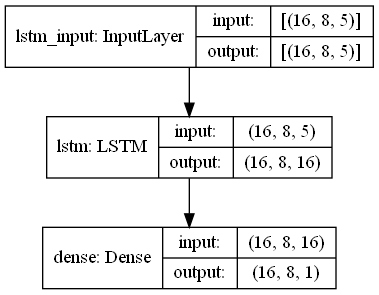

In [39]:
print('Input shape:', wide_window.example[0].shape)
print('Output shape:', lstm_model(wide_window.example[0]).shape)

lstm_model.summary()

from keras.utils import plot_model
plot_model(lstm_model, to_file='model.png',
               show_shapes=True,
 #   show_dtype=False,
    show_layer_names=True,
    rankdir="TB",
    expand_nested=False,
    dpi=96,
)


# Curve 1 + other curves 

In [39]:

"""
lstm_model = get_compiled_model()
filename='log_c1.csv'
history_logger=tf.keras.callbacks.CSVLogger(filename, separator=",", append=True)
hist = fit_model(lstm_model, wide_window, epochs_num=100, verb=0, stop=[early_stopping,history_logger])

np.save('history2.npy',hist.history)
history2=np.load('history2.npy',allow_pickle='TRUE').item()

"""

'\nlstm_model = get_compiled_model()\nfilename=\'log_c1.csv\'\nhistory_logger=tf.keras.callbacks.CSVLogger(filename, separator=",", append=True)\nhist = fit_model(lstm_model, wide_window, epochs_num=100, verb=0, stop=[early_stopping,history_logger])\n\nnp.save(\'history2.npy\',hist.history)\nhistory2=np.load(\'history2.npy\',allow_pickle=\'TRUE\').item()\n\n'

In [40]:
#batch_size=16

MODEL_SAVE_FOLDER_PATH = './model/'
if not os.path.exists(MODEL_SAVE_FOLDER_PATH):
  os.mkdir(MODEL_SAVE_FOLDER_PATH)

#model_path = MODEL_SAVE_FOLDER_PATH + '{epoch:02d}-{val_loss:.4f}.hdf5'
model_path = MODEL_SAVE_FOLDER_PATH + '{epoch:02d}.hdf5'

model_dir = os.path.dirname(model_path)

cp_callback = tf.keras.callbacks.ModelCheckpoint(filepath=model_path,
  # monitor='val_loss',  save_freq=int(2*batch_size), verbose=1, save_best_only=True)
   monitor='val_loss',  save_freq=30 , verbose=0  )
 #   monitor='val_loss',    verbose=1, save_best_only=True)
 #  monitor='val_loss',    verbose=1 )

loss :  [0.00013757700799033046]
val_loss :  [0.0006292976904660463]
mae :  [0.006955837830901146]
val_mae :  [0.017140783369541168]


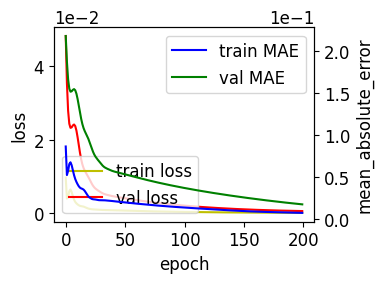

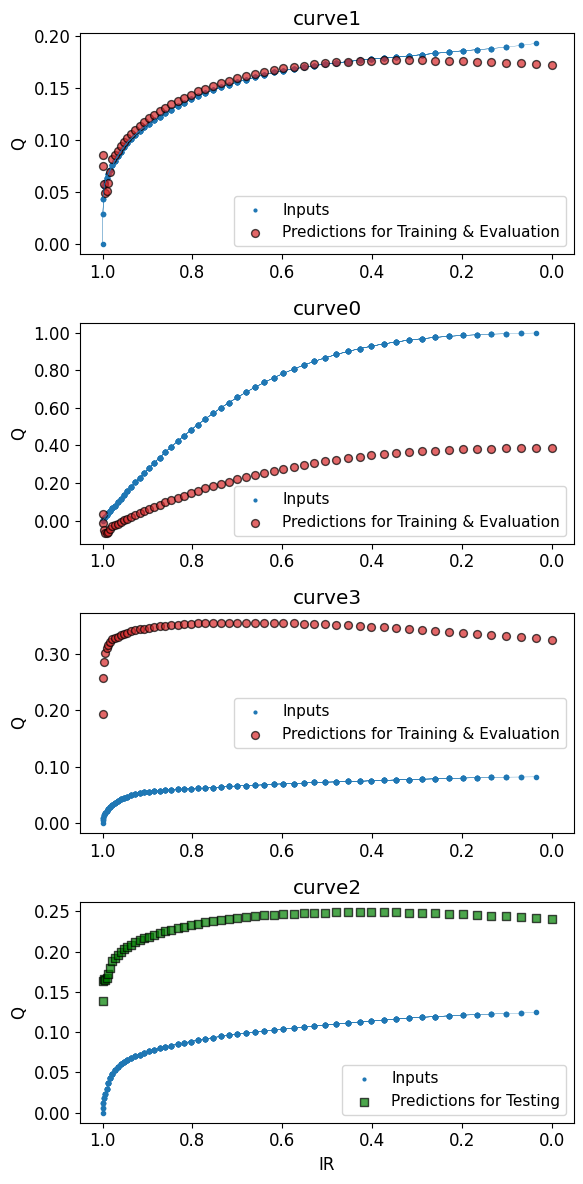

In [50]:
lstm_model = get_compiled_model()

wide_window.train_df = train_df_10
wide_window.val_df = val_df_10
wide_window.test_df = test_df_10

hist = fit_model(lstm_model, wide_window, epochs_num=200, verb=0, stop=[])
#hist = fit_model(lstm_model, wide_window, epochs_num=10, verb=1, stop=[] )
#hist = fit_model(lstm_model, wide_window, epochs_num=100, verb=1, stop=[ cp_callback])

#IPython.display.clear_output()

eval1(hist)
plot_val(lstm_model, wide_window_t)

loss :  [0.0001249510096386075]
val_loss :  [0.0002957166580017656]
mae :  [0.00707288458943367]
val_mae :  [0.011139328591525555]


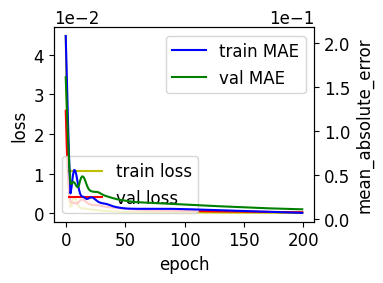

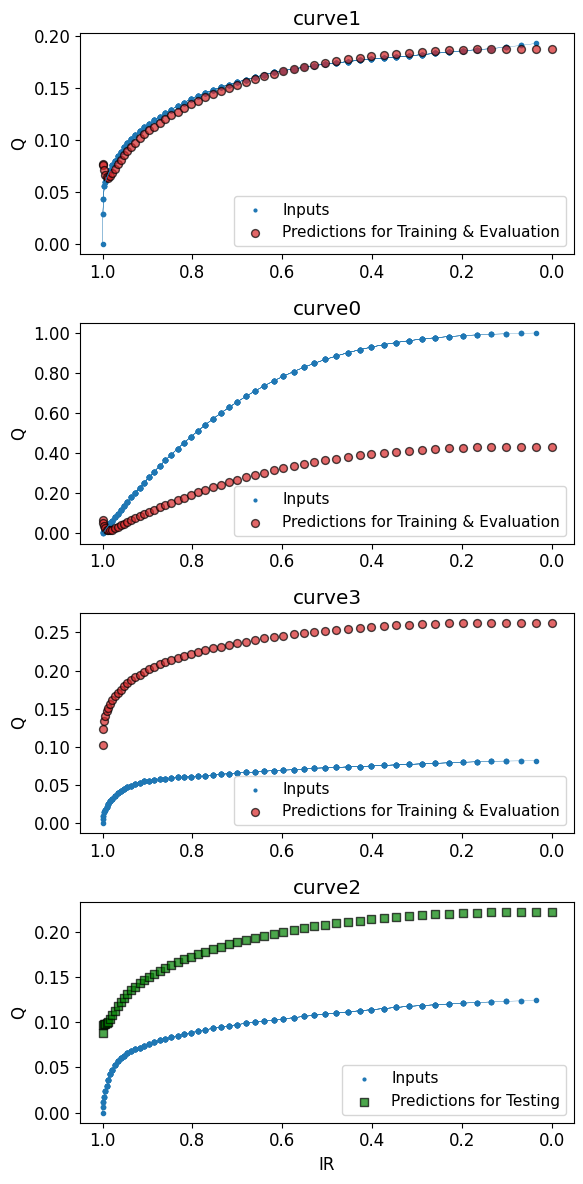

In [57]:
lstm_model = get_compiled_model()

wide_window.train_df = train_df_10
wide_window.val_df = val_df_10
wide_window.test_df = test_df_10

hist = fit_model(lstm_model, wide_window, epochs_num=200, verb=0, stop=[])
#hist = fit_model(lstm_model, wide_window, epochs_num=10, verb=1, stop=[] )
#hist = fit_model(lstm_model, wide_window, epochs_num=100, verb=1, stop=[ cp_callback])

#IPython.display.clear_output()

eval1(hist)
plot_val(lstm_model, wide_window_t)



In [ ]:
lstm_model.save("norm02/c1_02k")
np.save('norm02/c1_02k.npy',hist.history)

In [51]:
lstm_model = tf.keras.models.load_model("norm02/c1_02k")

history=np.load('norm02/c1_02k.npy',allow_pickle='TRUE').item()

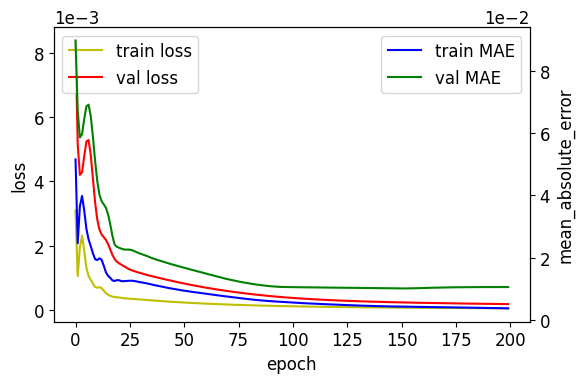

In [52]:
eval3(history)

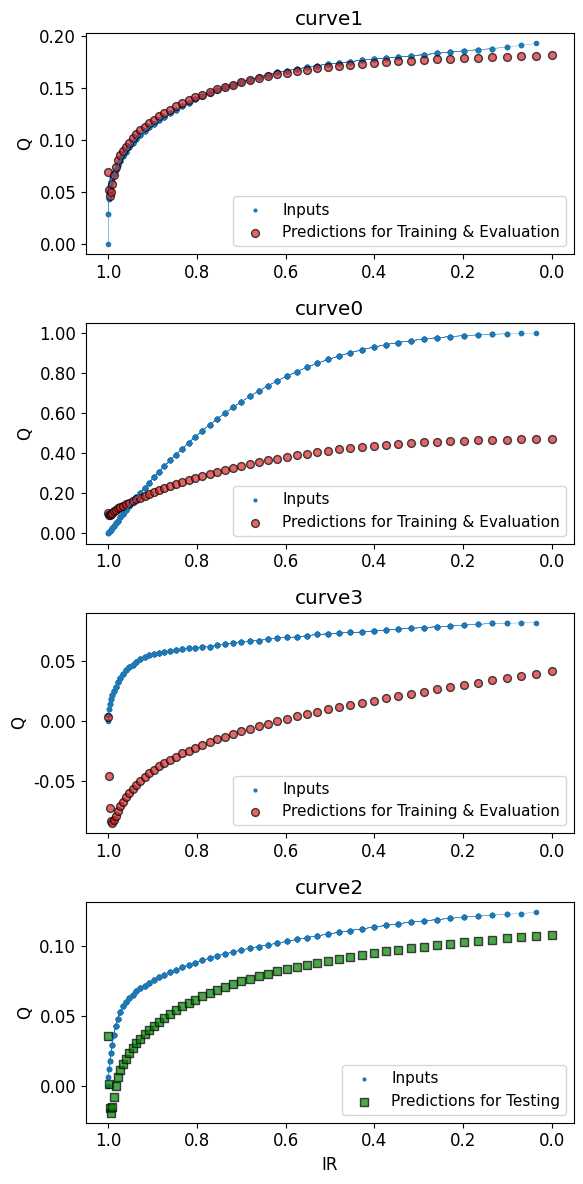

In [53]:
plot_val(lstm_model, wide_window_t)

In [ ]:
# Save files in pdf and eps format
#plt.savefig("figures/c1_los.pdf", dpi=300)
plt.savefig("figures/c1_los.png", dpi=300)
#plt.savefig("figures/c1_los.eps", dpi=300)

plot_val(lstm_model, wide_window_t)
plt.savefig("figures/c1_pred.png", dpi=300)

### Example loss history

In [97]:
hs={"tr_loss_sum":{"c0":[],"c1":[],"c2":[],"c3":[]},
    "tr_mae_sum":{"c0":[],"c1":[],"c2":[],"c3":[]},
    "va_loss_sum":{"c0":[],"c1":[],"c2":[],"c3":[]},
    "va_mae_sum":{"c0":[],"c1":[],"c2":[],"c3":[]}}

In [98]:
lstm_model = tf.keras.models.load_model("norm02/c1_02k")
#history=np.load('norm02/c1_02k.npy',allow_pickle='TRUE').item()
wide_window.train_df = train_df_10
wide_window.val_df = val_df_10
wide_window.test_df = test_df_10
tr_loss, tr_mae = lstm_model.evaluate(wide_window.train, verbose=0)
va_loss, va_mae = lstm_model.evaluate(wide_window.val, verbose=0)
hs["tr_loss_sum"]["c1"].append(tr_loss)
hs["tr_mae_sum"]["c1"].append(tr_mae)
hs["va_loss_sum"]["c1"].append(va_loss)
hs["va_mae_sum"]["c1"].append(va_mae)
#-----
wide_window.train_df = train_df_00
wide_window.val_df = val_df_00
wide_window.test_df = test_df_00
tr_loss, tr_mae = lstm_model.evaluate(wide_window.train, verbose=0)
va_loss, va_mae = lstm_model.evaluate(wide_window.val, verbose=0)
hs["tr_loss_sum"]["c0"].append(tr_loss)
hs["tr_mae_sum"]["c0"].append(tr_mae)
hs["va_loss_sum"]["c0"].append(va_loss)
hs["va_mae_sum"]["c0"].append(va_mae)
#-----
wide_window.train_df = train_df_30
wide_window.val_df = val_df_30
wide_window.test_df = test_df_30
tr_loss, tr_mae = lstm_model.evaluate(wide_window.train, verbose=0)
va_loss, va_mae = lstm_model.evaluate(wide_window.val, verbose=0)
hs["tr_loss_sum"]["c3"].append(tr_loss)
hs["tr_mae_sum"]["c3"].append(tr_mae)
hs["va_loss_sum"]["c3"].append(va_loss)
hs["va_mae_sum"]["c3"].append(va_mae)
#-----
wide_window.train_df = train_df_20
wide_window.val_df = val_df_20
wide_window.test_df = test_df_20
tr_loss, tr_mae = lstm_model.evaluate(wide_window.train, verbose=0)
va_loss, va_mae = lstm_model.evaluate(wide_window.val, verbose=0)
hs["tr_loss_sum"]["c2"].append(tr_loss)
hs["tr_mae_sum"]["c2"].append(tr_mae)
hs["va_loss_sum"]["c2"].append(va_loss)
hs["va_mae_sum"]["c2"].append(va_mae)

In [99]:
np.save('norm02/loss/hs_0.npy',hs)

In [ ]:
#hs2=np.load('norm02/hs_0.npy',allow_pickle='TRUE').item()

#### concatenate train and val
#### curve 1

loss :  [8.603083188063465e-06]
val_loss :  [1.07923888208461e-05]
mae :  [0.001988330390304327]
val_mae :  [0.0024059289135038853]


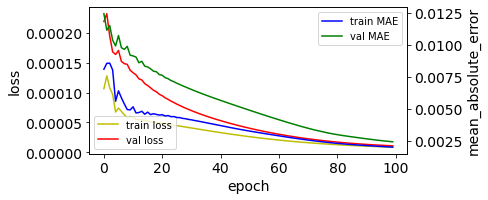

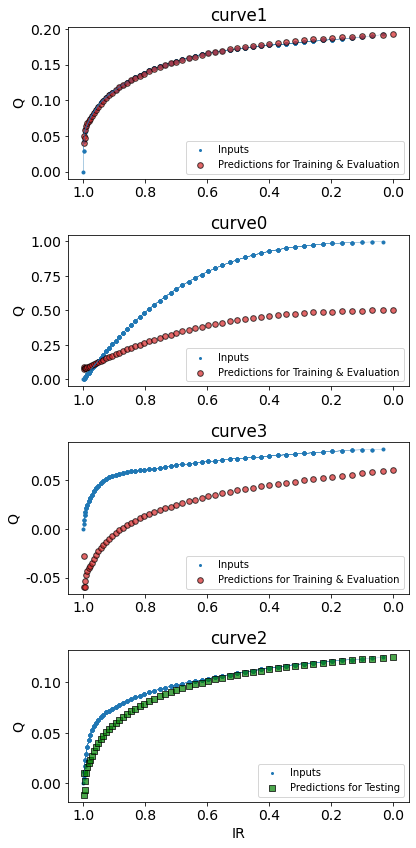

In [64]:
lstm_model = tf.keras.models.load_model("norm02/c1_02k")

train_df = tf.concat ([train_df_10,val_df_10], axis=0)
wide_window.train_df = train_df
wide_window.val_df = val_df_10
wide_window.test_df = test_df_10

hist = fit_model(lstm_model, wide_window, epochs_num=100, verb=0, stop=[])
eval1(hist)

plot_val(lstm_model, wide_window_t)

In [65]:
lstm_model.save("norm02/c1_all")
np.save('norm02/c1_all.npy',hist.history)

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: norm02/c1_all\assets


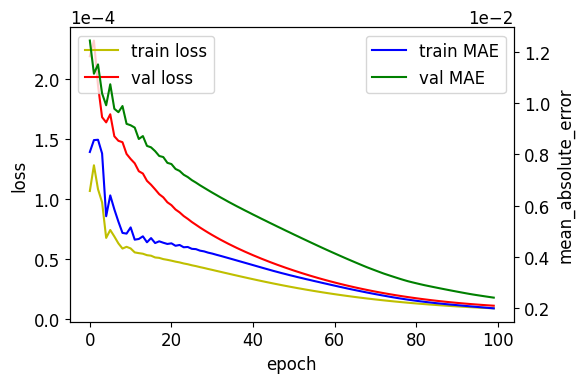

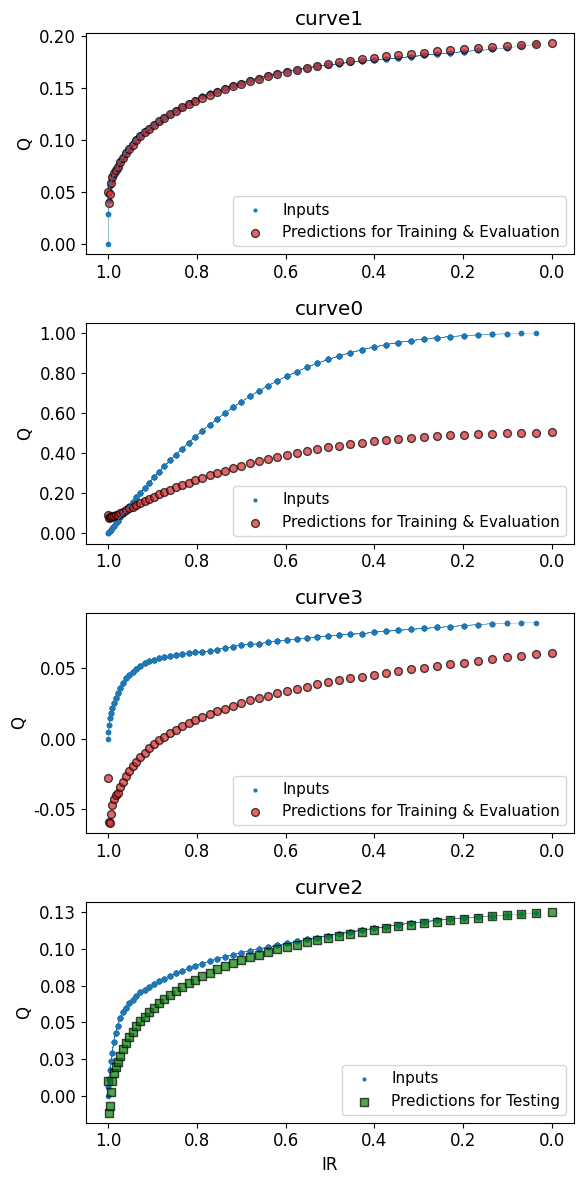

In [100]:
lstm_model = tf.keras.models.load_model("norm02/c1_all")


history=np.load('norm02/c1_all.npy',allow_pickle='TRUE').item()
eval3(history)
plt.savefig("figures/c1_los2.png", dpi=300)
plot_val(lstm_model, wide_window_t)
plt.savefig("figures/c1_pred2.png", dpi=300)

### Add curve0

In [ ]:
#lstm_model = tf.keras.models.load_model("norm02/c1_all")

wide_window.train_df = train_df_00
wide_window.val_df = val_df_00
wide_window.test_df = test_df_00

history = fit_model(lstm_model, wide_window, epochs_num=200, verb=0, stop=[] )
eval1(history)
plot_val(lstm_model, wide_window_t)

In [ ]:
#lstm_model = tf.keras.models.load_model("norm02/r00")
train_df = tf.concat ([train_df_00,val_df_00], axis=0)

wide_window.train_df = train_df
wide_window.val_df = val_df_00
wide_window.test_df = test_df_00

history = fit_model(lstm_model, wide_window, epochs_num=100, verb=0, stop=[] )
eval1(history)
plot_val(lstm_model, wide_window_t)

In [ ]:
lstm_model.save("norm02/c1c2")
np.save('norm02/c1c2.npy',history.history)

In [ ]:
lstm_model = tf.keras.models.load_model("norm02/c1c2")

history=np.load('norm02/c1c2.npy',allow_pickle='TRUE').item()
eval3(history)
plt.savefig("figures/c12_los.png", dpi=300)
plot_val(lstm_model, wide_window_t)
plt.savefig("figures/c12_pred.png", dpi=300)

### Add curve3

In [ ]:
#lstm_model = tf.keras.models.load_model("norm02/c1c2")

wide_window.train_df = train_df_30
wide_window.val_df = val_df_30
wide_window.test_df = test_df_30

history = fit_model(lstm_model, wide_window, epochs_num=300, verb=0, stop=[] )
eval1(history)

plot_val(lstm_model, wide_window_t)

In [ ]:
lstm_model.save("norm02/c123")
np.save('norm02/c123.npy',history.history)

In [ ]:
#lstm_model = tf.keras.models.load_model("norm02/c1c2")
train_df = tf.concat ([train_df_30,val_df_30], axis=0)

wide_window.train_df = train_df
wide_window.val_df = val_df_30
wide_window.test_df = test_df_30

history = fit_model(lstm_model, wide_window, epochs_num=100, verb=0, stop=[] )
eval1(history)

plot_val(lstm_model, wide_window_t)

In [ ]:
lstm_model.save("norm02/r00")
np.save('norm02/r00.npy',history.history)

In [ ]:
lstm_model = tf.keras.models.load_model("norm02/r00")

history=np.load('norm02/r00.npy',allow_pickle='TRUE').item()
eval3(history)
plt.savefig("figures/r00_los.png", dpi=300)
plot_val(lstm_model, wide_window_t)
plt.savefig("figures/r00_pred.png", dpi=300)

In [ ]:
#lstm_model = tf.keras.models.load_model("norm02/r00")
train_df = tf.concat ([train_df_00,val_df_00], axis=0)

wide_window.train_df = train_df
wide_window.val_df = val_df_00
wide_window.test_df = test_df_00

history = fit_model(lstm_model, wide_window, epochs_num=100, verb=0, stop=[] )
eval1(history)
plot_val(lstm_model, wide_window_t)

In [ ]:
lstm_model.save("norm02/r01")
np.save('norm02/r01.npy',history.history)

In [ ]:
lstm_model = tf.keras.models.load_model("norm02/r01")

history=np.load('norm02/r01.npy',allow_pickle='TRUE').item()
eval3(history)
plt.savefig("figures/r01_los.png", dpi=300)
plot_val(lstm_model, wide_window_t)
plt.savefig("figures/r01_pred.png", dpi=300)

In [ ]:
#lstm_model = tf.keras.models.load_model("norm02/r01")
train_df = tf.concat ([train_df_10,val_df_10], axis=0)
wide_window.train_df = train_df
wide_window.val_df = val_df_10
wide_window.test_df = test_df_10

history = fit_model(lstm_model, wide_window, epochs_num=50, verb=0, stop=[] )
eval1(history)
plot_val(lstm_model, wide_window_t)

In [ ]:
lstm_model.save("norm02/r02")
np.save('norm02/r02.npy',hist.history)

In [ ]:
lstm_model = tf.keras.models.load_model("norm02/r02")

history=np.load('norm02/r02.npy',allow_pickle='TRUE').item()
eval3(history)
plt.savefig("figures/r02_los.png", dpi=300)
plot_val(lstm_model, wide_window_t)
plt.savefig("figures/r02_pred.png", dpi=300)

In [ ]:
lstm_model = tf.keras.models.load_model("norm02/r02")
train_df = tf.concat ([train_df_00,val_df_00], axis=0)
wide_window.train_df = train_df
wide_window.val_df = val_df_00
wide_window.test_df = test_df_00

history = fit_model(lstm_model, wide_window, epochs_num=30, verb=0, stop=[] )
eval1(history)
plot_val(lstm_model, wide_window_t)

In [ ]:
lstm_model.save("norm02/r03")
np.save('norm02/r03.npy',history.history)

In [ ]:
#lstm_model = tf.keras.models.load_model("norm02/r03")
train_df = tf.concat ([train_df_30,val_df_30], axis=0)

wide_window.train_df = train_df
wide_window.val_df = val_df_30
wide_window.test_df = test_df_30

history = fit_model(lstm_model, wide_window, epochs_num=30, verb=0, stop=[] )
eval1(history)

plot_val(lstm_model, wide_window_t)

In [ ]:
lstm_model.save("norm02/r04")
np.save('norm02/r04.npy',history.history)

In [ ]:
#lstm_model = tf.keras.models.load_model("norm02/r04")

train_df = tf.concat ([train_df_00,val_df_00], axis=0)
wide_window.train_df = train_df
wide_window.val_df = val_df_00
wide_window.test_df = test_df_00

history = fit_model(lstm_model, wide_window, epochs_num=30, verb=0, stop=[] )
eval1(history)
plot_val(lstm_model, wide_window_t)

In [ ]:
lstm_model.save("norm02/r05")
np.save('norm02/r05.npy',history.history)

In [ ]:
#lstm_model = tf.keras.models.load_model("norm02/r05")

train_df = tf.concat ([train_df_10,val_df_10], axis=0)
wide_window.train_df = train_df
wide_window.val_df = val_df_10
wide_window.test_df = test_df_10

history = fit_model(lstm_model, wide_window, epochs_num=20, verb=0, stop=[] )
eval1(history)
plot_val(lstm_model, wide_window_t)

In [ ]:
lstm_model.save("norm02/r06")
np.save('norm02/r06.npy',history.history)


In [ ]:
lstm_model = tf.keras.models.load_model("norm02/r06")

train_df = tf.concat ([train_df_00,val_df_00], axis=0)
wide_window.train_df = train_df
wide_window.val_df = val_df_00
wide_window.test_df = test_df_00

history = fit_model(lstm_model, wide_window, epochs_num=20, verb=0, stop=[] )
eval1(history)
plot_val(lstm_model, wide_window_t)

In [ ]:
lstm_model.save("norm02/r07")
np.save('norm02/r07.npy',history.history)

In [ ]:
#lstm_model = tf.keras.models.load_model("norm02/r07")

train_df = tf.concat ([train_df_30,val_df_30], axis=0)
wide_window.train_df = train_df
wide_window.val_df = val_df_30
wide_window.test_df = test_df_30

history = fit_model(lstm_model, wide_window, epochs_num=20, verb=0, stop=[] )
eval1(history)

plot_val(lstm_model, wide_window_t)

In [ ]:
lstm_model.save("norm02/r08")
np.save('norm02/r08.npy',history.history)

### repeat curve1 and curve3

In [ ]:
lstm_model = tf.keras.models.load_model("norm02/r08")

train_df = tf.concat ([train_df_10,val_df_10], axis=0)
wide_window.train_df = train_df
wide_window.val_df = val_df_10
wide_window.test_df = test_df_10

history = fit_model(lstm_model, wide_window, epochs_num=20, verb=0, stop=[] )
eval1(history)
plot_val(lstm_model, wide_window_t)

In [ ]:
#lstm_model = tf.keras.models.load_model("norm02/r07")

train_df = tf.concat ([train_df_30,val_df_30], axis=0)
wide_window.train_df = train_df
wide_window.val_df = val_df_30
wide_window.test_df = test_df_30

history = fit_model(lstm_model, wide_window, epochs_num=20, verb=0, stop=[] )
eval1(history)

plot_val(lstm_model, wide_window_t)


lstm_model.save("norm02/r09")
np.save('norm02/r09.npy',history.history)

In [ ]:
lstm_model = tf.keras.models.load_model("norm02/r09")
history=np.load('norm02/r09.npy',allow_pickle='TRUE').item()
eval3(history)
plt.savefig("figures/r09_los.png", dpi=300)
plot_val(lstm_model, wide_window_t)
plt.savefig("figures/r09_pred.png", dpi=300)


In [ ]:
lstm_model = tf.keras.models.load_model("norm02/r09")

train_df = tf.concat ([train_df_10,val_df_10], axis=0)
wide_window.train_df = train_df
wide_window.val_df = val_df_10
wide_window.test_df = test_df_10

history = fit_model(lstm_model, wide_window, epochs_num=20, verb=0, stop=[] )
eval1(history)
plot_val(lstm_model, wide_window_t)

In [ ]:
lstm_model.save("norm02/r10")
np.save('norm02/r10.npy',history.history)

In [ ]:
lstm_model = tf.keras.models.load_model("norm02/r10")
history=np.load('norm02/r10.npy',allow_pickle='TRUE').item()
eval3(history)
plt.savefig("figures/r10_los.png", dpi=300)
plot_val(lstm_model, wide_window_t)
plt.savefig("figures/r10_pred.png", dpi=300)

In [ ]:
lstm_model = tf.keras.models.load_model("norm02/r10")

train_df = tf.concat ([train_df_30,val_df_30], axis=0)
wide_window.train_df = train_df
wide_window.val_df = val_df_30
wide_window.test_df = test_df_30

history = fit_model(lstm_model, wide_window, epochs_num=50, verb=0, stop=[] )
eval1(history)

plot_val(lstm_model, wide_window_t)

In [ ]:
lstm_model.save("norm02/r11")
np.save('norm02/r11.npy',history.history)

In [ ]:
lstm_model = tf.keras.models.load_model("norm02/r11")
history=np.load('norm02/r11.npy',allow_pickle='TRUE').item()
eval3(history)
plt.savefig("figures/r11_los.png", dpi=300)
plot_val(lstm_model, wide_window_t)
plt.savefig("figures/11_pred.png", dpi=300)

# output summary
--------------------------------------------------


In [101]:
lstm_model = tf.keras.models.load_model("norm02/c1_02k")
history=np.load('norm02/c1_02k.npy',allow_pickle='TRUE').item()

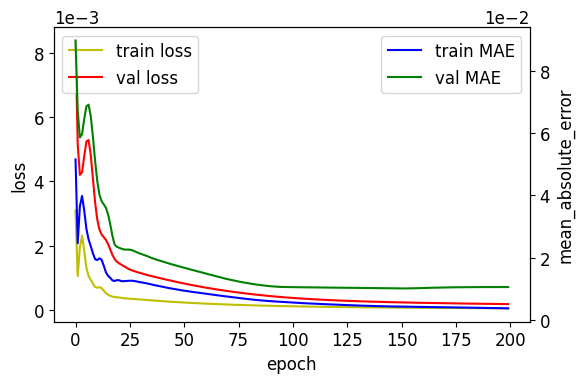

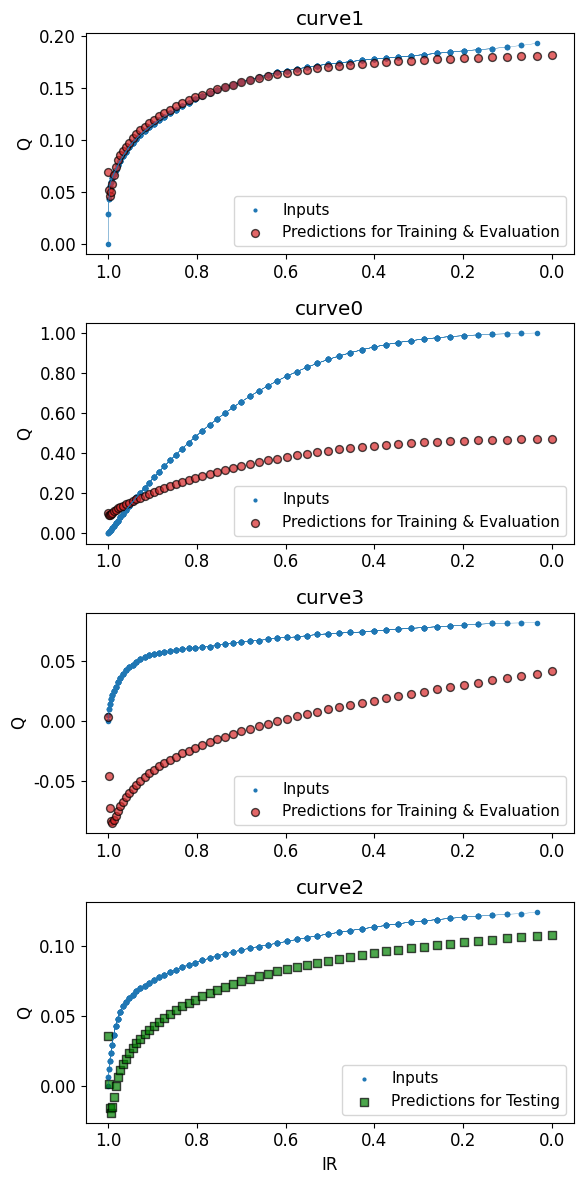

In [102]:
eval3(history)
plt.savefig("figures/c1_los.png", dpi=300)

plot_val(lstm_model, wide_window_t)

plt.tight_layout()
#plt.subplots_adjust(left = 0, bottom = 0, right = 1, top = 1, hspace = 0, wspace = 0)
plt.savefig("figures/c1_pred.png", dpi=300)

### Example loss history

In [103]:
hs={"tr_loss_sum":{"c0":[],"c1":[],"c2":[],"c3":[]},
    "tr_mae_sum":{"c0":[],"c1":[],"c2":[],"c3":[]},
    "va_loss_sum":{"c0":[],"c1":[],"c2":[],"c3":[]},
    "va_mae_sum":{"c0":[],"c1":[],"c2":[],"c3":[]}}

In [104]:
#lstm_model = tf.keras.models.load_model("norm02/c1_02k")
#history=np.load('norm02/c1_02k.npy',allow_pickle='TRUE').item()
wide_window.train_df = train_df_10
wide_window.val_df = val_df_10
wide_window.test_df = test_df_10
tr_loss, tr_mae = lstm_model.evaluate(wide_window.train, verbose=0)
va_loss, va_mae = lstm_model.evaluate(wide_window.val, verbose=0)
hs["tr_loss_sum"]["c1"].append(tr_loss)
hs["tr_mae_sum"]["c1"].append(tr_mae)
hs["va_loss_sum"]["c1"].append(va_loss)
hs["va_mae_sum"]["c1"].append(va_mae)
#-----
wide_window.train_df = train_df_00
wide_window.val_df = val_df_00
wide_window.test_df = test_df_00
tr_loss, tr_mae = lstm_model.evaluate(wide_window.train, verbose=0)
va_loss, va_mae = lstm_model.evaluate(wide_window.val, verbose=0)
hs["tr_loss_sum"]["c0"].append(tr_loss)
hs["tr_mae_sum"]["c0"].append(tr_mae)
hs["va_loss_sum"]["c0"].append(va_loss)
hs["va_mae_sum"]["c0"].append(va_mae)
#-----
wide_window.train_df = train_df_30
wide_window.val_df = val_df_30
wide_window.test_df = test_df_30
tr_loss, tr_mae = lstm_model.evaluate(wide_window.train, verbose=0)
va_loss, va_mae = lstm_model.evaluate(wide_window.val, verbose=0)
hs["tr_loss_sum"]["c3"].append(tr_loss)
hs["tr_mae_sum"]["c3"].append(tr_mae)
hs["va_loss_sum"]["c3"].append(va_loss)
hs["va_mae_sum"]["c3"].append(va_mae)
#-----
wide_window.train_df = train_df_20
wide_window.val_df = val_df_20
wide_window.test_df = test_df_20
tr_loss, tr_mae = lstm_model.evaluate(wide_window.train, verbose=0)
va_loss, va_mae = lstm_model.evaluate(wide_window.val, verbose=0)
hs["tr_loss_sum"]["c2"].append(tr_loss)
hs["tr_mae_sum"]["c2"].append(tr_mae)
hs["va_loss_sum"]["c2"].append(va_loss)
hs["va_mae_sum"]["c2"].append(va_mae)

np.save('norm02/loss/hs_0.npy',hs)

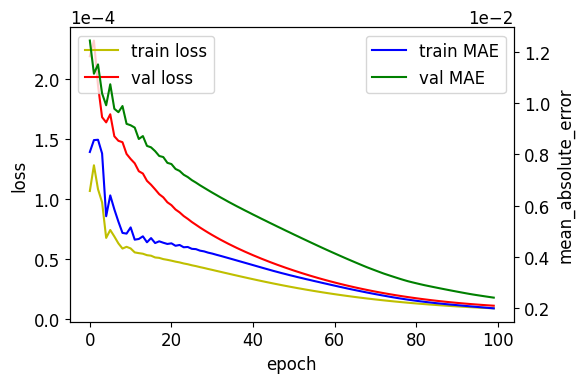

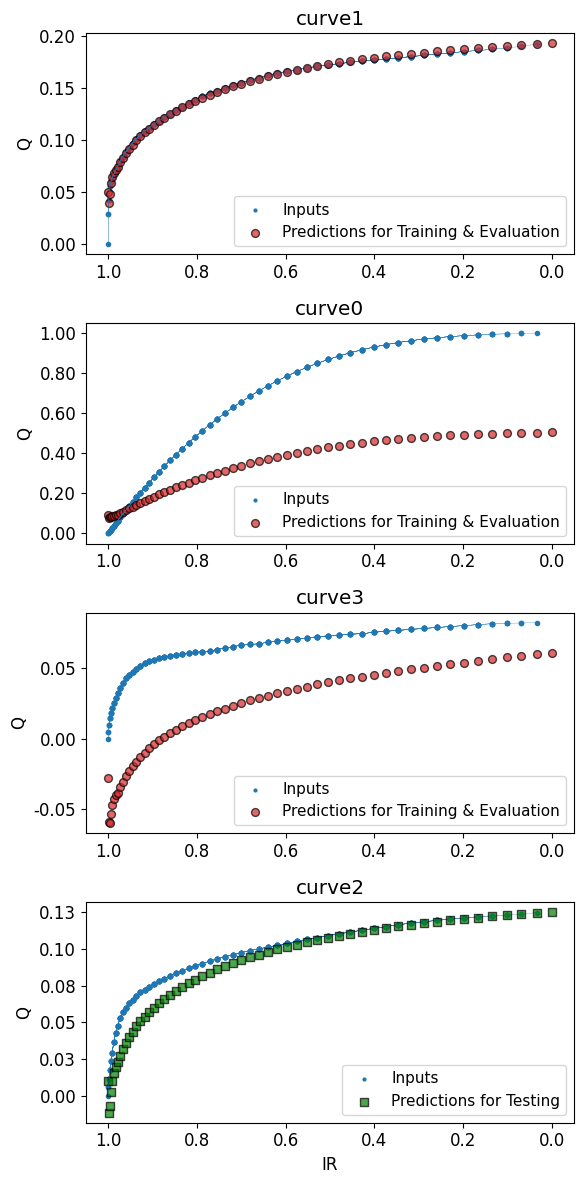

In [105]:
lstm_model = tf.keras.models.load_model("norm02/c1_all")

history=np.load('norm02/c1_all.npy',allow_pickle='TRUE').item()
eval3(history)
plt.savefig("figures/c1_los2.png", dpi=300)
plot_val(lstm_model, wide_window_t)
plt.tight_layout()

plt.savefig("figures/c1_pred2.png", dpi=300)

In [106]:
#lstm_model = tf.keras.models.load_model("norm02/c1_02k")
#history=np.load('norm02/c1_02k.npy',allow_pickle='TRUE').item()
wide_window.train_df = train_df_10
wide_window.val_df = val_df_10
wide_window.test_df = test_df_10
tr_loss, tr_mae = lstm_model.evaluate(wide_window.train, verbose=0)
va_loss, va_mae = lstm_model.evaluate(wide_window.val, verbose=0)
hs["tr_loss_sum"]["c1"].append(tr_loss)
hs["tr_mae_sum"]["c1"].append(tr_mae)
hs["va_loss_sum"]["c1"].append(va_loss)
hs["va_mae_sum"]["c1"].append(va_mae)
#-----
wide_window.train_df = train_df_00
wide_window.val_df = val_df_00
wide_window.test_df = test_df_00
tr_loss, tr_mae = lstm_model.evaluate(wide_window.train, verbose=0)
va_loss, va_mae = lstm_model.evaluate(wide_window.val, verbose=0)
hs["tr_loss_sum"]["c0"].append(tr_loss)
hs["tr_mae_sum"]["c0"].append(tr_mae)
hs["va_loss_sum"]["c0"].append(va_loss)
hs["va_mae_sum"]["c0"].append(va_mae)
#-----
wide_window.train_df = train_df_30
wide_window.val_df = val_df_30
wide_window.test_df = test_df_30
tr_loss, tr_mae = lstm_model.evaluate(wide_window.train, verbose=0)
va_loss, va_mae = lstm_model.evaluate(wide_window.val, verbose=0)
hs["tr_loss_sum"]["c3"].append(tr_loss)
hs["tr_mae_sum"]["c3"].append(tr_mae)
hs["va_loss_sum"]["c3"].append(va_loss)
hs["va_mae_sum"]["c3"].append(va_mae)
#-----
wide_window.train_df = train_df_20
wide_window.val_df = val_df_20
wide_window.test_df = test_df_20
tr_loss, tr_mae = lstm_model.evaluate(wide_window.train, verbose=0)
va_loss, va_mae = lstm_model.evaluate(wide_window.val, verbose=0)
hs["tr_loss_sum"]["c2"].append(tr_loss)
hs["tr_mae_sum"]["c2"].append(tr_mae)
hs["va_loss_sum"]["c2"].append(va_loss)
hs["va_mae_sum"]["c2"].append(va_mae)

np.save('norm02/loss/hs_1.npy',hs)

### Add curve0

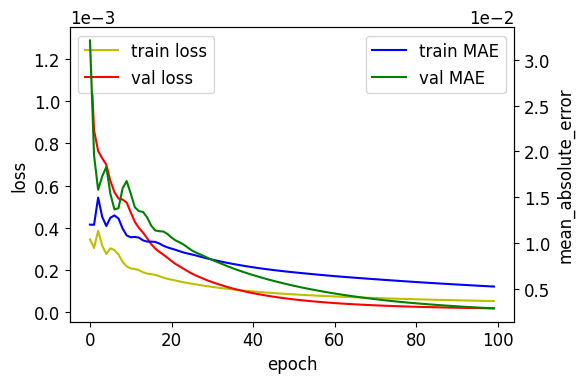

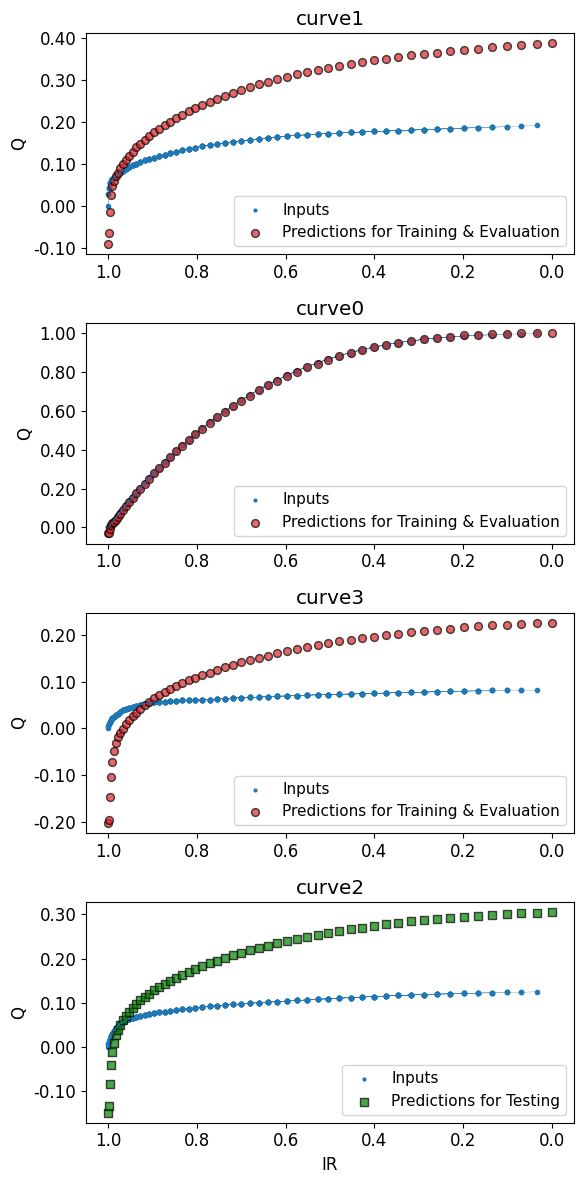

In [107]:
lstm_model = tf.keras.models.load_model("norm02/c1c2")

history=np.load('norm02/c1c2.npy',allow_pickle='TRUE').item()
eval3(history)
plt.savefig("figures/c12_los.png", dpi=300)
plot_val(lstm_model, wide_window_t)
plt.tight_layout()

plt.savefig("figures/c12_pred.png", dpi=300)

In [108]:
#lstm_model = tf.keras.models.load_model("norm02/c1_02k")
#history=np.load('norm02/c1_02k.npy',allow_pickle='TRUE').item()
wide_window.train_df = train_df_10
wide_window.val_df = val_df_10
wide_window.test_df = test_df_10
tr_loss, tr_mae = lstm_model.evaluate(wide_window.train, verbose=0)
va_loss, va_mae = lstm_model.evaluate(wide_window.val, verbose=0)
hs["tr_loss_sum"]["c1"].append(tr_loss)
hs["tr_mae_sum"]["c1"].append(tr_mae)
hs["va_loss_sum"]["c1"].append(va_loss)
hs["va_mae_sum"]["c1"].append(va_mae)
#-----
wide_window.train_df = train_df_00
wide_window.val_df = val_df_00
wide_window.test_df = test_df_00
tr_loss, tr_mae = lstm_model.evaluate(wide_window.train, verbose=0)
va_loss, va_mae = lstm_model.evaluate(wide_window.val, verbose=0)
hs["tr_loss_sum"]["c0"].append(tr_loss)
hs["tr_mae_sum"]["c0"].append(tr_mae)
hs["va_loss_sum"]["c0"].append(va_loss)
hs["va_mae_sum"]["c0"].append(va_mae)
#-----
wide_window.train_df = train_df_30
wide_window.val_df = val_df_30
wide_window.test_df = test_df_30
tr_loss, tr_mae = lstm_model.evaluate(wide_window.train, verbose=0)
va_loss, va_mae = lstm_model.evaluate(wide_window.val, verbose=0)
hs["tr_loss_sum"]["c3"].append(tr_loss)
hs["tr_mae_sum"]["c3"].append(tr_mae)
hs["va_loss_sum"]["c3"].append(va_loss)
hs["va_mae_sum"]["c3"].append(va_mae)
#-----
wide_window.train_df = train_df_20
wide_window.val_df = val_df_20
wide_window.test_df = test_df_20
tr_loss, tr_mae = lstm_model.evaluate(wide_window.train, verbose=0)
va_loss, va_mae = lstm_model.evaluate(wide_window.val, verbose=0)
hs["tr_loss_sum"]["c2"].append(tr_loss)
hs["tr_mae_sum"]["c2"].append(tr_mae)
hs["va_loss_sum"]["c2"].append(va_loss)
hs["va_mae_sum"]["c2"].append(va_mae)

np.save('norm02/loss/hs_1_2.npy',hs)

### Add curve3

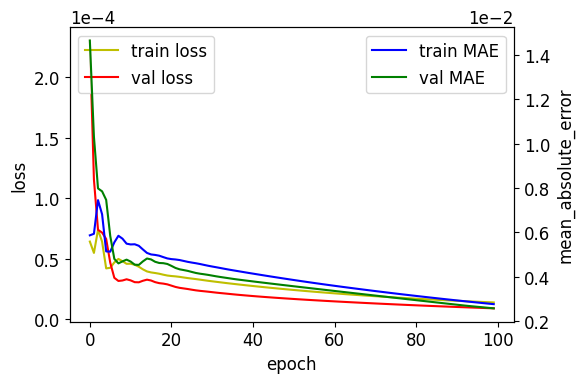

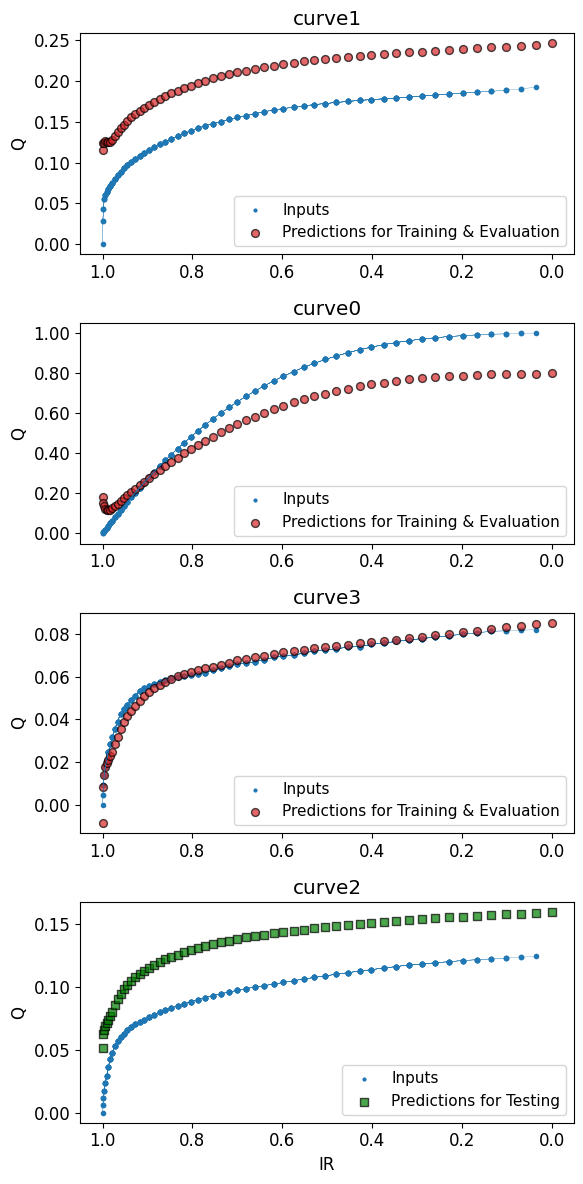

In [109]:
lstm_model = tf.keras.models.load_model("norm02/r00")

history=np.load('norm02/r00.npy',allow_pickle='TRUE').item()
eval3(history)
plt.savefig("figures/r00_los.png", dpi=300)
plot_val(lstm_model, wide_window_t)
plt.tight_layout()

plt.savefig("figures/r00_pred.png", dpi=300)

In [110]:
#lstm_model = tf.keras.models.load_model("norm02/c1_02k")
#history=np.load('norm02/c1_02k.npy',allow_pickle='TRUE').item()
wide_window.train_df = train_df_10
wide_window.val_df = val_df_10
wide_window.test_df = test_df_10
tr_loss, tr_mae = lstm_model.evaluate(wide_window.train, verbose=0)
va_loss, va_mae = lstm_model.evaluate(wide_window.val, verbose=0)
hs["tr_loss_sum"]["c1"].append(tr_loss)
hs["tr_mae_sum"]["c1"].append(tr_mae)
hs["va_loss_sum"]["c1"].append(va_loss)
hs["va_mae_sum"]["c1"].append(va_mae)
#-----
wide_window.train_df = train_df_00
wide_window.val_df = val_df_00
wide_window.test_df = test_df_00
tr_loss, tr_mae = lstm_model.evaluate(wide_window.train, verbose=0)
va_loss, va_mae = lstm_model.evaluate(wide_window.val, verbose=0)
hs["tr_loss_sum"]["c0"].append(tr_loss)
hs["tr_mae_sum"]["c0"].append(tr_mae)
hs["va_loss_sum"]["c0"].append(va_loss)
hs["va_mae_sum"]["c0"].append(va_mae)
#-----
wide_window.train_df = train_df_30
wide_window.val_df = val_df_30
wide_window.test_df = test_df_30
tr_loss, tr_mae = lstm_model.evaluate(wide_window.train, verbose=0)
va_loss, va_mae = lstm_model.evaluate(wide_window.val, verbose=0)
hs["tr_loss_sum"]["c3"].append(tr_loss)
hs["tr_mae_sum"]["c3"].append(tr_mae)
hs["va_loss_sum"]["c3"].append(va_loss)
hs["va_mae_sum"]["c3"].append(va_mae)
#-----
wide_window.train_df = train_df_20
wide_window.val_df = val_df_20
wide_window.test_df = test_df_20
tr_loss, tr_mae = lstm_model.evaluate(wide_window.train, verbose=0)
va_loss, va_mae = lstm_model.evaluate(wide_window.val, verbose=0)
hs["tr_loss_sum"]["c2"].append(tr_loss)
hs["tr_mae_sum"]["c2"].append(tr_mae)
hs["va_loss_sum"]["c2"].append(va_loss)
hs["va_mae_sum"]["c2"].append(va_mae)

np.save('norm02/loss/hs_1_2_3.npy',hs)

##### start to adjust :

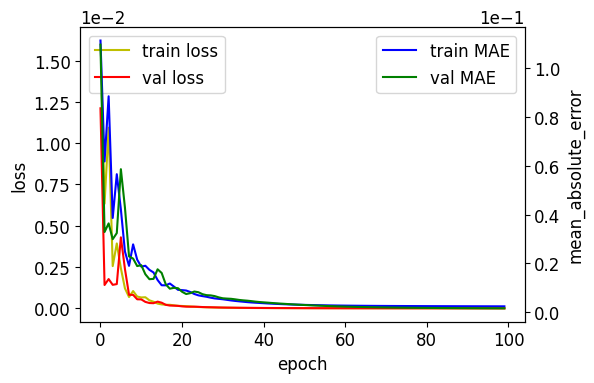

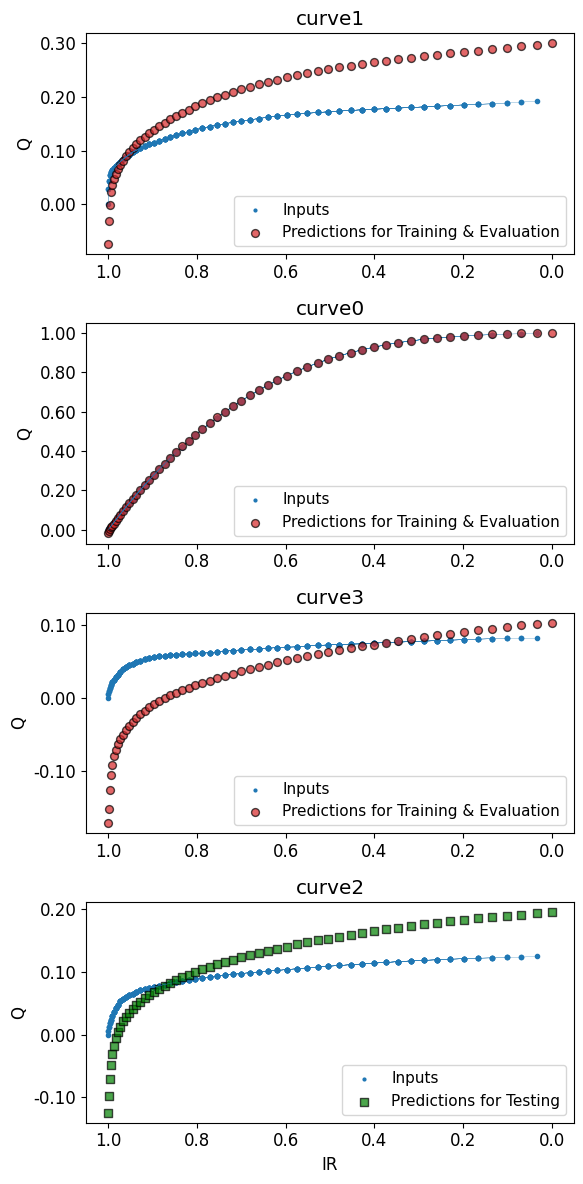

In [111]:
lstm_model = tf.keras.models.load_model("norm02/r01")

history=np.load('norm02/r01.npy',allow_pickle='TRUE').item()
eval3(history)
plt.savefig("figures/r01_los.png", dpi=300)
plot_val(lstm_model, wide_window_t)
plt.tight_layout()

plt.savefig("figures/r01_pred.png", dpi=300)

In [112]:
wide_window.train_df = train_df_10
wide_window.val_df = val_df_10
wide_window.test_df = test_df_10
tr_loss, tr_mae = lstm_model.evaluate(wide_window.train, verbose=0)
va_loss, va_mae = lstm_model.evaluate(wide_window.val, verbose=0)
hs["tr_loss_sum"]["c1"].append(tr_loss)
hs["tr_mae_sum"]["c1"].append(tr_mae)
hs["va_loss_sum"]["c1"].append(va_loss)
hs["va_mae_sum"]["c1"].append(va_mae)
#-----
wide_window.train_df = train_df_00
wide_window.val_df = val_df_00
wide_window.test_df = test_df_00
tr_loss, tr_mae = lstm_model.evaluate(wide_window.train, verbose=0)
va_loss, va_mae = lstm_model.evaluate(wide_window.val, verbose=0)
hs["tr_loss_sum"]["c0"].append(tr_loss)
hs["tr_mae_sum"]["c0"].append(tr_mae)
hs["va_loss_sum"]["c0"].append(va_loss)
hs["va_mae_sum"]["c0"].append(va_mae)
#-----
wide_window.train_df = train_df_30
wide_window.val_df = val_df_30
wide_window.test_df = test_df_30
tr_loss, tr_mae = lstm_model.evaluate(wide_window.train, verbose=0)
va_loss, va_mae = lstm_model.evaluate(wide_window.val, verbose=0)
hs["tr_loss_sum"]["c3"].append(tr_loss)
hs["tr_mae_sum"]["c3"].append(tr_mae)
hs["va_loss_sum"]["c3"].append(va_loss)
hs["va_mae_sum"]["c3"].append(va_mae)
#-----
wide_window.train_df = train_df_20
wide_window.val_df = val_df_20
wide_window.test_df = test_df_20
tr_loss, tr_mae = lstm_model.evaluate(wide_window.train, verbose=0)
va_loss, va_mae = lstm_model.evaluate(wide_window.val, verbose=0)
hs["tr_loss_sum"]["c2"].append(tr_loss)
hs["tr_mae_sum"]["c2"].append(tr_mae)
hs["va_loss_sum"]["c2"].append(va_loss)
hs["va_mae_sum"]["c2"].append(va_mae)

np.save('norm02/loss/hs_all_0.npy',hs)

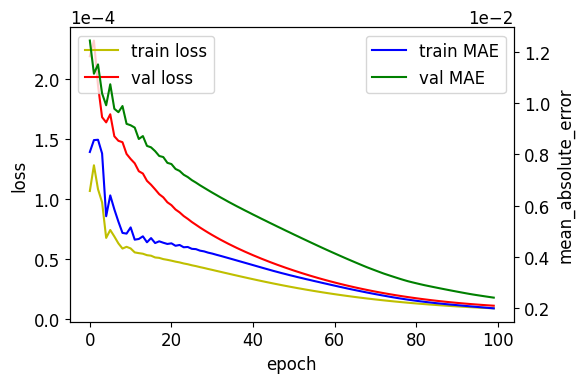

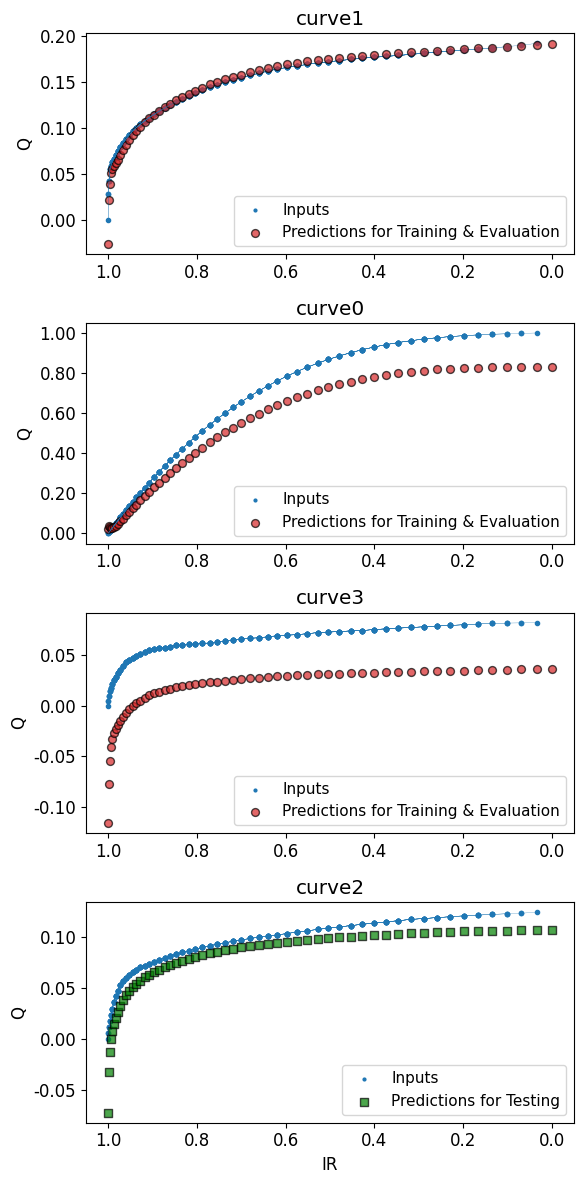

In [113]:
lstm_model = tf.keras.models.load_model("norm02/r02")

history=np.load('norm02/r02.npy',allow_pickle='TRUE').item()
eval3(history)
plt.savefig("figures/r02_los.png", dpi=300)
plot_val(lstm_model, wide_window_t)
plt.savefig("figures/r02_pred.png", dpi=300)

In [114]:
wide_window.train_df = train_df_10
wide_window.val_df = val_df_10
wide_window.test_df = test_df_10
tr_loss, tr_mae = lstm_model.evaluate(wide_window.train, verbose=0)
va_loss, va_mae = lstm_model.evaluate(wide_window.val, verbose=0)
hs["tr_loss_sum"]["c1"].append(tr_loss)
hs["tr_mae_sum"]["c1"].append(tr_mae)
hs["va_loss_sum"]["c1"].append(va_loss)
hs["va_mae_sum"]["c1"].append(va_mae)
#-----
wide_window.train_df = train_df_00
wide_window.val_df = val_df_00
wide_window.test_df = test_df_00
tr_loss, tr_mae = lstm_model.evaluate(wide_window.train, verbose=0)
va_loss, va_mae = lstm_model.evaluate(wide_window.val, verbose=0)
hs["tr_loss_sum"]["c0"].append(tr_loss)
hs["tr_mae_sum"]["c0"].append(tr_mae)
hs["va_loss_sum"]["c0"].append(va_loss)
hs["va_mae_sum"]["c0"].append(va_mae)
#-----
wide_window.train_df = train_df_30
wide_window.val_df = val_df_30
wide_window.test_df = test_df_30
tr_loss, tr_mae = lstm_model.evaluate(wide_window.train, verbose=0)
va_loss, va_mae = lstm_model.evaluate(wide_window.val, verbose=0)
hs["tr_loss_sum"]["c3"].append(tr_loss)
hs["tr_mae_sum"]["c3"].append(tr_mae)
hs["va_loss_sum"]["c3"].append(va_loss)
hs["va_mae_sum"]["c3"].append(va_mae)
#-----
wide_window.train_df = train_df_20
wide_window.val_df = val_df_20
wide_window.test_df = test_df_20
tr_loss, tr_mae = lstm_model.evaluate(wide_window.train, verbose=0)
va_loss, va_mae = lstm_model.evaluate(wide_window.val, verbose=0)
hs["tr_loss_sum"]["c2"].append(tr_loss)
hs["tr_mae_sum"]["c2"].append(tr_mae)
hs["va_loss_sum"]["c2"].append(va_loss)
hs["va_mae_sum"]["c2"].append(va_mae)

np.save('norm02/loss/hs_all_01.npy',hs)

In [115]:
lstm_model = tf.keras.models.load_model("norm02/r03")

wide_window.train_df = train_df_10
wide_window.val_df = val_df_10
wide_window.test_df = test_df_10
tr_loss, tr_mae = lstm_model.evaluate(wide_window.train, verbose=0)
va_loss, va_mae = lstm_model.evaluate(wide_window.val, verbose=0)
hs["tr_loss_sum"]["c1"].append(tr_loss)
hs["tr_mae_sum"]["c1"].append(tr_mae)
hs["va_loss_sum"]["c1"].append(va_loss)
hs["va_mae_sum"]["c1"].append(va_mae)
#-----
wide_window.train_df = train_df_00
wide_window.val_df = val_df_00
wide_window.test_df = test_df_00
tr_loss, tr_mae = lstm_model.evaluate(wide_window.train, verbose=0)
va_loss, va_mae = lstm_model.evaluate(wide_window.val, verbose=0)
hs["tr_loss_sum"]["c0"].append(tr_loss)
hs["tr_mae_sum"]["c0"].append(tr_mae)
hs["va_loss_sum"]["c0"].append(va_loss)
hs["va_mae_sum"]["c0"].append(va_mae)
#-----
wide_window.train_df = train_df_30
wide_window.val_df = val_df_30
wide_window.test_df = test_df_30
tr_loss, tr_mae = lstm_model.evaluate(wide_window.train, verbose=0)
va_loss, va_mae = lstm_model.evaluate(wide_window.val, verbose=0)
hs["tr_loss_sum"]["c3"].append(tr_loss)
hs["tr_mae_sum"]["c3"].append(tr_mae)
hs["va_loss_sum"]["c3"].append(va_loss)
hs["va_mae_sum"]["c3"].append(va_mae)
#-----
wide_window.train_df = train_df_20
wide_window.val_df = val_df_20
wide_window.test_df = test_df_20
tr_loss, tr_mae = lstm_model.evaluate(wide_window.train, verbose=0)
va_loss, va_mae = lstm_model.evaluate(wide_window.val, verbose=0)
hs["tr_loss_sum"]["c2"].append(tr_loss)
hs["tr_mae_sum"]["c2"].append(tr_mae)
hs["va_loss_sum"]["c2"].append(va_loss)
hs["va_mae_sum"]["c2"].append(va_mae)

np.save('norm02/loss/hs_all_010.npy',hs)

In [116]:
lstm_model = tf.keras.models.load_model("norm02/r04")
wide_window.train_df = train_df_10
wide_window.val_df = val_df_10
wide_window.test_df = test_df_10
tr_loss, tr_mae = lstm_model.evaluate(wide_window.train, verbose=0)
va_loss, va_mae = lstm_model.evaluate(wide_window.val, verbose=0)
hs["tr_loss_sum"]["c1"].append(tr_loss)
hs["tr_mae_sum"]["c1"].append(tr_mae)
hs["va_loss_sum"]["c1"].append(va_loss)
hs["va_mae_sum"]["c1"].append(va_mae)
#-----
wide_window.train_df = train_df_00
wide_window.val_df = val_df_00
wide_window.test_df = test_df_00
tr_loss, tr_mae = lstm_model.evaluate(wide_window.train, verbose=0)
va_loss, va_mae = lstm_model.evaluate(wide_window.val, verbose=0)
hs["tr_loss_sum"]["c0"].append(tr_loss)
hs["tr_mae_sum"]["c0"].append(tr_mae)
hs["va_loss_sum"]["c0"].append(va_loss)
hs["va_mae_sum"]["c0"].append(va_mae)
#-----
wide_window.train_df = train_df_30
wide_window.val_df = val_df_30
wide_window.test_df = test_df_30
tr_loss, tr_mae = lstm_model.evaluate(wide_window.train, verbose=0)
va_loss, va_mae = lstm_model.evaluate(wide_window.val, verbose=0)
hs["tr_loss_sum"]["c3"].append(tr_loss)
hs["tr_mae_sum"]["c3"].append(tr_mae)
hs["va_loss_sum"]["c3"].append(va_loss)
hs["va_mae_sum"]["c3"].append(va_mae)
#-----
wide_window.train_df = train_df_20
wide_window.val_df = val_df_20
wide_window.test_df = test_df_20
tr_loss, tr_mae = lstm_model.evaluate(wide_window.train, verbose=0)
va_loss, va_mae = lstm_model.evaluate(wide_window.val, verbose=0)
hs["tr_loss_sum"]["c2"].append(tr_loss)
hs["tr_mae_sum"]["c2"].append(tr_mae)
hs["va_loss_sum"]["c2"].append(va_loss)
hs["va_mae_sum"]["c2"].append(va_mae)

np.save('norm02/loss/hs_all_0103.npy',hs)

In [117]:
lstm_model = tf.keras.models.load_model("norm02/r05")
wide_window.train_df = train_df_10
wide_window.val_df = val_df_10
wide_window.test_df = test_df_10
tr_loss, tr_mae = lstm_model.evaluate(wide_window.train, verbose=0)
va_loss, va_mae = lstm_model.evaluate(wide_window.val, verbose=0)
hs["tr_loss_sum"]["c1"].append(tr_loss)
hs["tr_mae_sum"]["c1"].append(tr_mae)
hs["va_loss_sum"]["c1"].append(va_loss)
hs["va_mae_sum"]["c1"].append(va_mae)
#-----
wide_window.train_df = train_df_00
wide_window.val_df = val_df_00
wide_window.test_df = test_df_00
tr_loss, tr_mae = lstm_model.evaluate(wide_window.train, verbose=0)
va_loss, va_mae = lstm_model.evaluate(wide_window.val, verbose=0)
hs["tr_loss_sum"]["c0"].append(tr_loss)
hs["tr_mae_sum"]["c0"].append(tr_mae)
hs["va_loss_sum"]["c0"].append(va_loss)
hs["va_mae_sum"]["c0"].append(va_mae)
#-----
wide_window.train_df = train_df_30
wide_window.val_df = val_df_30
wide_window.test_df = test_df_30
tr_loss, tr_mae = lstm_model.evaluate(wide_window.train, verbose=0)
va_loss, va_mae = lstm_model.evaluate(wide_window.val, verbose=0)
hs["tr_loss_sum"]["c3"].append(tr_loss)
hs["tr_mae_sum"]["c3"].append(tr_mae)
hs["va_loss_sum"]["c3"].append(va_loss)
hs["va_mae_sum"]["c3"].append(va_mae)
#-----
wide_window.train_df = train_df_20
wide_window.val_df = val_df_20
wide_window.test_df = test_df_20
tr_loss, tr_mae = lstm_model.evaluate(wide_window.train, verbose=0)
va_loss, va_mae = lstm_model.evaluate(wide_window.val, verbose=0)
hs["tr_loss_sum"]["c2"].append(tr_loss)
hs["tr_mae_sum"]["c2"].append(tr_mae)
hs["va_loss_sum"]["c2"].append(va_loss)
hs["va_mae_sum"]["c2"].append(va_mae)

np.save('norm02/loss/hs_all_01030.npy',hs)

In [118]:
lstm_model = tf.keras.models.load_model("norm02/r06")
wide_window.train_df = train_df_10
wide_window.val_df = val_df_10
wide_window.test_df = test_df_10
tr_loss, tr_mae = lstm_model.evaluate(wide_window.train, verbose=0)
va_loss, va_mae = lstm_model.evaluate(wide_window.val, verbose=0)
hs["tr_loss_sum"]["c1"].append(tr_loss)
hs["tr_mae_sum"]["c1"].append(tr_mae)
hs["va_loss_sum"]["c1"].append(va_loss)
hs["va_mae_sum"]["c1"].append(va_mae)
#-----
wide_window.train_df = train_df_00
wide_window.val_df = val_df_00
wide_window.test_df = test_df_00
tr_loss, tr_mae = lstm_model.evaluate(wide_window.train, verbose=0)
va_loss, va_mae = lstm_model.evaluate(wide_window.val, verbose=0)
hs["tr_loss_sum"]["c0"].append(tr_loss)
hs["tr_mae_sum"]["c0"].append(tr_mae)
hs["va_loss_sum"]["c0"].append(va_loss)
hs["va_mae_sum"]["c0"].append(va_mae)
#-----
wide_window.train_df = train_df_30
wide_window.val_df = val_df_30
wide_window.test_df = test_df_30
tr_loss, tr_mae = lstm_model.evaluate(wide_window.train, verbose=0)
va_loss, va_mae = lstm_model.evaluate(wide_window.val, verbose=0)
hs["tr_loss_sum"]["c3"].append(tr_loss)
hs["tr_mae_sum"]["c3"].append(tr_mae)
hs["va_loss_sum"]["c3"].append(va_loss)
hs["va_mae_sum"]["c3"].append(va_mae)
#-----
wide_window.train_df = train_df_20
wide_window.val_df = val_df_20
wide_window.test_df = test_df_20
tr_loss, tr_mae = lstm_model.evaluate(wide_window.train, verbose=0)
va_loss, va_mae = lstm_model.evaluate(wide_window.val, verbose=0)
hs["tr_loss_sum"]["c2"].append(tr_loss)
hs["tr_mae_sum"]["c2"].append(tr_mae)
hs["va_loss_sum"]["c2"].append(va_loss)
hs["va_mae_sum"]["c2"].append(va_mae)

np.save('norm02/loss/hs_all_010301.npy',hs)

In [119]:
lstm_model = tf.keras.models.load_model("norm02/r07")
wide_window.train_df = train_df_10
wide_window.val_df = val_df_10
wide_window.test_df = test_df_10
tr_loss, tr_mae = lstm_model.evaluate(wide_window.train, verbose=0)
va_loss, va_mae = lstm_model.evaluate(wide_window.val, verbose=0)
hs["tr_loss_sum"]["c1"].append(tr_loss)
hs["tr_mae_sum"]["c1"].append(tr_mae)
hs["va_loss_sum"]["c1"].append(va_loss)
hs["va_mae_sum"]["c1"].append(va_mae)
#-----
wide_window.train_df = train_df_00
wide_window.val_df = val_df_00
wide_window.test_df = test_df_00
tr_loss, tr_mae = lstm_model.evaluate(wide_window.train, verbose=0)
va_loss, va_mae = lstm_model.evaluate(wide_window.val, verbose=0)
hs["tr_loss_sum"]["c0"].append(tr_loss)
hs["tr_mae_sum"]["c0"].append(tr_mae)
hs["va_loss_sum"]["c0"].append(va_loss)
hs["va_mae_sum"]["c0"].append(va_mae)
#-----
wide_window.train_df = train_df_30
wide_window.val_df = val_df_30
wide_window.test_df = test_df_30
tr_loss, tr_mae = lstm_model.evaluate(wide_window.train, verbose=0)
va_loss, va_mae = lstm_model.evaluate(wide_window.val, verbose=0)
hs["tr_loss_sum"]["c3"].append(tr_loss)
hs["tr_mae_sum"]["c3"].append(tr_mae)
hs["va_loss_sum"]["c3"].append(va_loss)
hs["va_mae_sum"]["c3"].append(va_mae)
#-----
wide_window.train_df = train_df_20
wide_window.val_df = val_df_20
wide_window.test_df = test_df_20
tr_loss, tr_mae = lstm_model.evaluate(wide_window.train, verbose=0)
va_loss, va_mae = lstm_model.evaluate(wide_window.val, verbose=0)
hs["tr_loss_sum"]["c2"].append(tr_loss)
hs["tr_mae_sum"]["c2"].append(tr_mae)
hs["va_loss_sum"]["c2"].append(va_loss)
hs["va_mae_sum"]["c2"].append(va_mae)

np.save('norm02/loss/hs_all_0103010.npy',hs)

In [120]:
lstm_model = tf.keras.models.load_model("norm02/r08")
wide_window.train_df = train_df_10
wide_window.val_df = val_df_10
wide_window.test_df = test_df_10
tr_loss, tr_mae = lstm_model.evaluate(wide_window.train, verbose=0)
va_loss, va_mae = lstm_model.evaluate(wide_window.val, verbose=0)
hs["tr_loss_sum"]["c1"].append(tr_loss)
hs["tr_mae_sum"]["c1"].append(tr_mae)
hs["va_loss_sum"]["c1"].append(va_loss)
hs["va_mae_sum"]["c1"].append(va_mae)
#-----
wide_window.train_df = train_df_00
wide_window.val_df = val_df_00
wide_window.test_df = test_df_00
tr_loss, tr_mae = lstm_model.evaluate(wide_window.train, verbose=0)
va_loss, va_mae = lstm_model.evaluate(wide_window.val, verbose=0)
hs["tr_loss_sum"]["c0"].append(tr_loss)
hs["tr_mae_sum"]["c0"].append(tr_mae)
hs["va_loss_sum"]["c0"].append(va_loss)
hs["va_mae_sum"]["c0"].append(va_mae)
#-----
wide_window.train_df = train_df_30
wide_window.val_df = val_df_30
wide_window.test_df = test_df_30
tr_loss, tr_mae = lstm_model.evaluate(wide_window.train, verbose=0)
va_loss, va_mae = lstm_model.evaluate(wide_window.val, verbose=0)
hs["tr_loss_sum"]["c3"].append(tr_loss)
hs["tr_mae_sum"]["c3"].append(tr_mae)
hs["va_loss_sum"]["c3"].append(va_loss)
hs["va_mae_sum"]["c3"].append(va_mae)
#-----
wide_window.train_df = train_df_20
wide_window.val_df = val_df_20
wide_window.test_df = test_df_20
tr_loss, tr_mae = lstm_model.evaluate(wide_window.train, verbose=0)
va_loss, va_mae = lstm_model.evaluate(wide_window.val, verbose=0)
hs["tr_loss_sum"]["c2"].append(tr_loss)
hs["tr_mae_sum"]["c2"].append(tr_mae)
hs["va_loss_sum"]["c2"].append(va_loss)
hs["va_mae_sum"]["c2"].append(va_mae)

np.save('norm02/loss/hs_all_01030103.npy',hs)

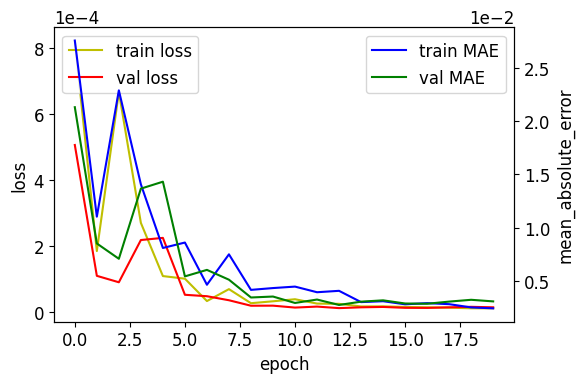

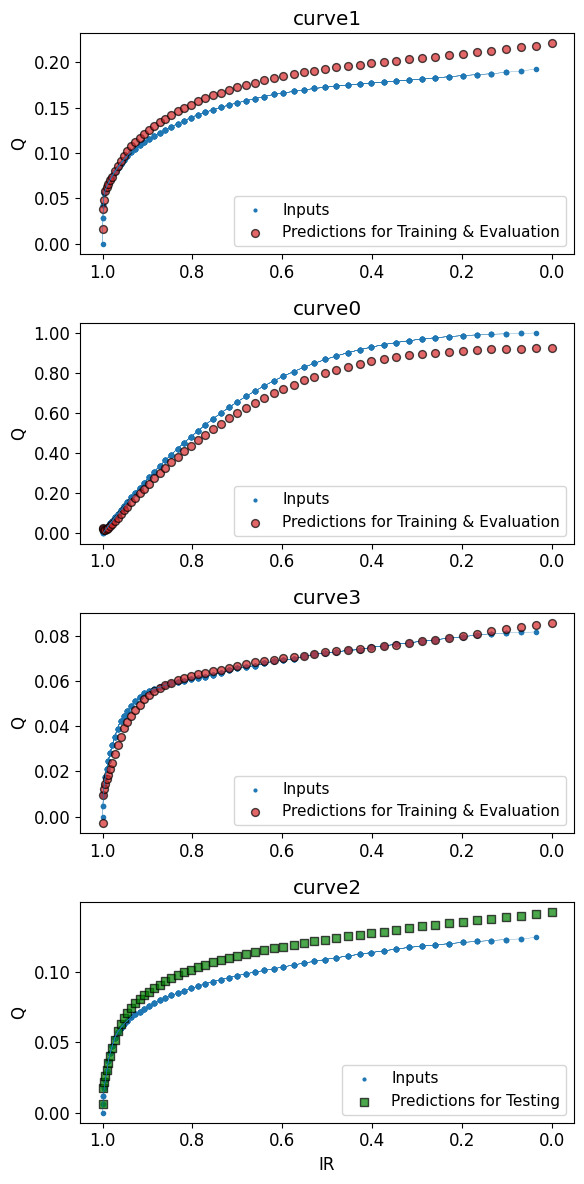

In [121]:
lstm_model = tf.keras.models.load_model("norm02/r09")
history=np.load('norm02/r09.npy',allow_pickle='TRUE').item()
eval3(history)
plt.savefig("figures/r09_los.png", dpi=300)
plot_val(lstm_model, wide_window_t)
plt.tight_layout()

plt.savefig("figures/r09_pred.png", dpi=300)

wide_window.train_df = train_df_10
wide_window.val_df = val_df_10
wide_window.test_df = test_df_10
tr_loss, tr_mae = lstm_model.evaluate(wide_window.train, verbose=0)
va_loss, va_mae = lstm_model.evaluate(wide_window.val, verbose=0)
hs["tr_loss_sum"]["c1"].append(tr_loss)
hs["tr_mae_sum"]["c1"].append(tr_mae)
hs["va_loss_sum"]["c1"].append(va_loss)
hs["va_mae_sum"]["c1"].append(va_mae)
#-----
wide_window.train_df = train_df_00
wide_window.val_df = val_df_00
wide_window.test_df = test_df_00
tr_loss, tr_mae = lstm_model.evaluate(wide_window.train, verbose=0)
va_loss, va_mae = lstm_model.evaluate(wide_window.val, verbose=0)
hs["tr_loss_sum"]["c0"].append(tr_loss)
hs["tr_mae_sum"]["c0"].append(tr_mae)
hs["va_loss_sum"]["c0"].append(va_loss)
hs["va_mae_sum"]["c0"].append(va_mae)
#-----
wide_window.train_df = train_df_30
wide_window.val_df = val_df_30
wide_window.test_df = test_df_30
tr_loss, tr_mae = lstm_model.evaluate(wide_window.train, verbose=0)
va_loss, va_mae = lstm_model.evaluate(wide_window.val, verbose=0)
hs["tr_loss_sum"]["c3"].append(tr_loss)
hs["tr_mae_sum"]["c3"].append(tr_mae)
hs["va_loss_sum"]["c3"].append(va_loss)
hs["va_mae_sum"]["c3"].append(va_mae)
#-----
wide_window.train_df = train_df_20
wide_window.val_df = val_df_20
wide_window.test_df = test_df_20
tr_loss, tr_mae = lstm_model.evaluate(wide_window.train, verbose=0)
va_loss, va_mae = lstm_model.evaluate(wide_window.val, verbose=0)
hs["tr_loss_sum"]["c2"].append(tr_loss)
hs["tr_mae_sum"]["c2"].append(tr_mae)
hs["va_loss_sum"]["c2"].append(va_loss)
hs["va_mae_sum"]["c2"].append(va_mae)

np.save('norm02/loss/hs_all_010301033.npy',hs)

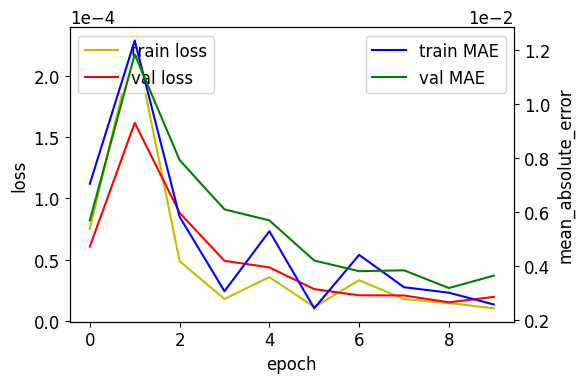

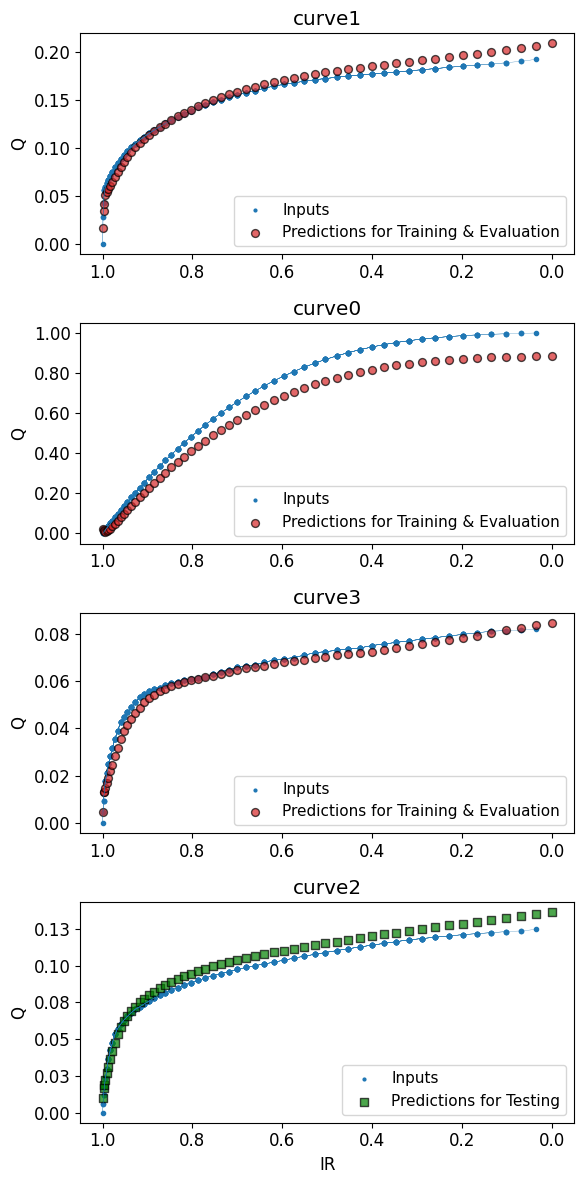

In [122]:
lstm_model = tf.keras.models.load_model("norm02/r10")
history=np.load('norm02/r10.npy',allow_pickle='TRUE').item()
eval3(history)
plt.savefig("figures/r10_los.png", dpi=300)
plot_val(lstm_model, wide_window_t)
plt.tight_layout()

plt.savefig("figures/r10_pred.png", dpi=300)

wide_window.train_df = train_df_10
wide_window.val_df = val_df_10
wide_window.test_df = test_df_10
tr_loss, tr_mae = lstm_model.evaluate(wide_window.train, verbose=0)
va_loss, va_mae = lstm_model.evaluate(wide_window.val, verbose=0)
hs["tr_loss_sum"]["c1"].append(tr_loss)
hs["tr_mae_sum"]["c1"].append(tr_mae)
hs["va_loss_sum"]["c1"].append(va_loss)
hs["va_mae_sum"]["c1"].append(va_mae)
#-----
wide_window.train_df = train_df_00
wide_window.val_df = val_df_00
wide_window.test_df = test_df_00
tr_loss, tr_mae = lstm_model.evaluate(wide_window.train, verbose=0)
va_loss, va_mae = lstm_model.evaluate(wide_window.val, verbose=0)
hs["tr_loss_sum"]["c0"].append(tr_loss)
hs["tr_mae_sum"]["c0"].append(tr_mae)
hs["va_loss_sum"]["c0"].append(va_loss)
hs["va_mae_sum"]["c0"].append(va_mae)
#-----
wide_window.train_df = train_df_30
wide_window.val_df = val_df_30
wide_window.test_df = test_df_30
tr_loss, tr_mae = lstm_model.evaluate(wide_window.train, verbose=0)
va_loss, va_mae = lstm_model.evaluate(wide_window.val, verbose=0)
hs["tr_loss_sum"]["c3"].append(tr_loss)
hs["tr_mae_sum"]["c3"].append(tr_mae)
hs["va_loss_sum"]["c3"].append(va_loss)
hs["va_mae_sum"]["c3"].append(va_mae)
#-----
wide_window.train_df = train_df_20
wide_window.val_df = val_df_20
wide_window.test_df = test_df_20
tr_loss, tr_mae = lstm_model.evaluate(wide_window.train, verbose=0)
va_loss, va_mae = lstm_model.evaluate(wide_window.val, verbose=0)
hs["tr_loss_sum"]["c2"].append(tr_loss)
hs["tr_mae_sum"]["c2"].append(tr_mae)
hs["va_loss_sum"]["c2"].append(va_loss)
hs["va_mae_sum"]["c2"].append(va_mae)

np.save('norm02/loss/hs_all_0103010331.npy',hs)

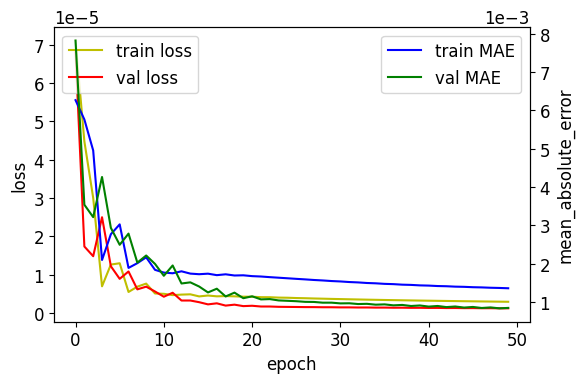

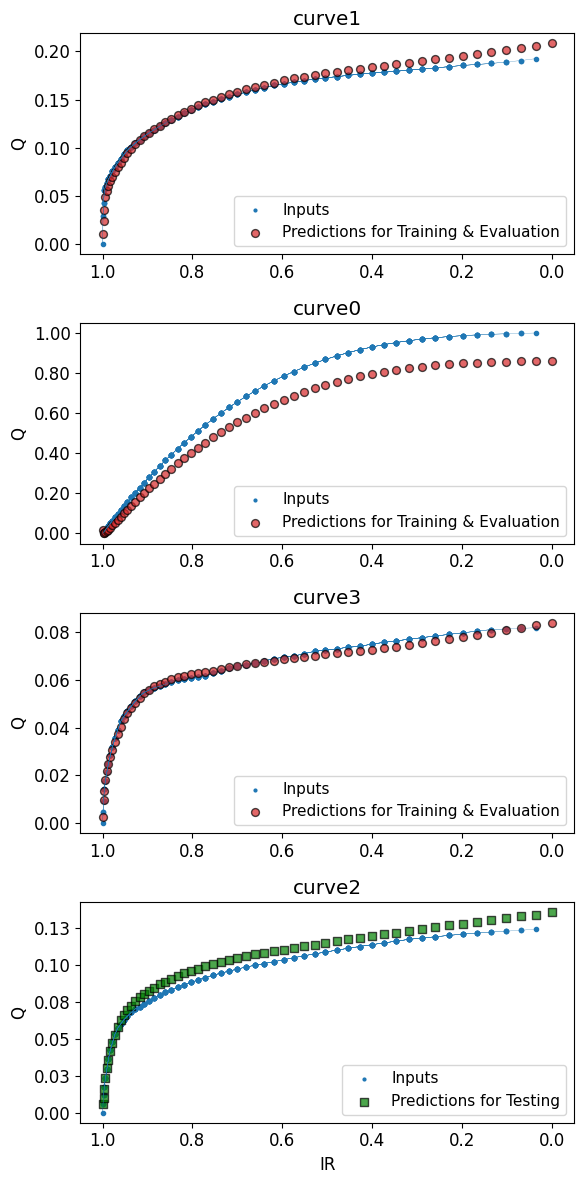

In [123]:
lstm_model = tf.keras.models.load_model("norm02/r11")
history=np.load('norm02/r11.npy',allow_pickle='TRUE').item()
eval3(history)
plt.savefig("figures/r11_los.png", dpi=300)
plot_val(lstm_model, wide_window_t)
plt.tight_layout()

plt.savefig("figures/11_pred.png", dpi=300)

wide_window.train_df = train_df_10
wide_window.val_df = val_df_10
wide_window.test_df = test_df_10
tr_loss, tr_mae = lstm_model.evaluate(wide_window.train, verbose=0)
va_loss, va_mae = lstm_model.evaluate(wide_window.val, verbose=0)
hs["tr_loss_sum"]["c1"].append(tr_loss)
hs["tr_mae_sum"]["c1"].append(tr_mae)
hs["va_loss_sum"]["c1"].append(va_loss)
hs["va_mae_sum"]["c1"].append(va_mae)
#-----
wide_window.train_df = train_df_00
wide_window.val_df = val_df_00
wide_window.test_df = test_df_00
tr_loss, tr_mae = lstm_model.evaluate(wide_window.train, verbose=0)
va_loss, va_mae = lstm_model.evaluate(wide_window.val, verbose=0)
hs["tr_loss_sum"]["c0"].append(tr_loss)
hs["tr_mae_sum"]["c0"].append(tr_mae)
hs["va_loss_sum"]["c0"].append(va_loss)
hs["va_mae_sum"]["c0"].append(va_mae)
#-----
wide_window.train_df = train_df_30
wide_window.val_df = val_df_30
wide_window.test_df = test_df_30
tr_loss, tr_mae = lstm_model.evaluate(wide_window.train, verbose=0)
va_loss, va_mae = lstm_model.evaluate(wide_window.val, verbose=0)
hs["tr_loss_sum"]["c3"].append(tr_loss)
hs["tr_mae_sum"]["c3"].append(tr_mae)
hs["va_loss_sum"]["c3"].append(va_loss)
hs["va_mae_sum"]["c3"].append(va_mae)
#-----
wide_window.train_df = train_df_20
wide_window.val_df = val_df_20
wide_window.test_df = test_df_20
tr_loss, tr_mae = lstm_model.evaluate(wide_window.train, verbose=0)
va_loss, va_mae = lstm_model.evaluate(wide_window.val, verbose=0)
hs["tr_loss_sum"]["c2"].append(tr_loss)
hs["tr_mae_sum"]["c2"].append(tr_mae)
hs["va_loss_sum"]["c2"].append(va_loss)
hs["va_mae_sum"]["c2"].append(va_mae)

np.save('norm02/loss/hs_all_01030103313.npy',hs)

In [124]:
hs=np.load('norm02/loss/hs_all_01030103313.npy',allow_pickle='TRUE').item()

# final IR-Fw

In [125]:
lstm_model = tf.keras.models.load_model("norm02/r11")

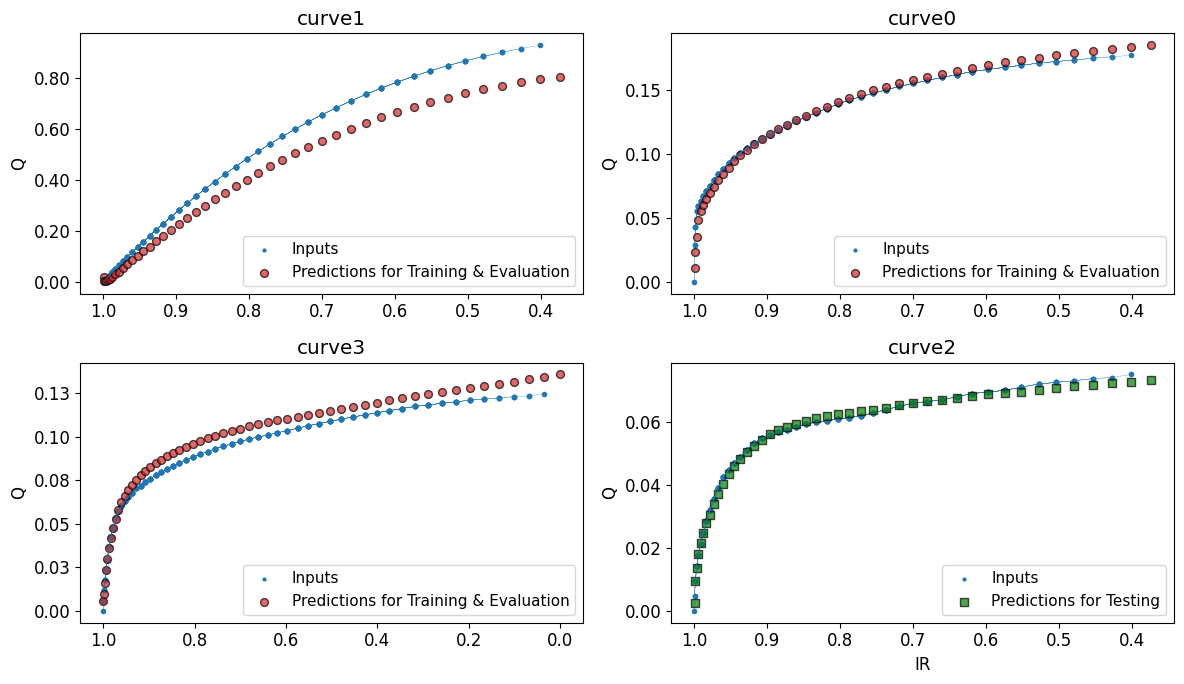

In [149]:
#def plot_val(curves=[train_df_00, train_df_10, train_df_20, train_df_30],model=None,
def plot_val3( model=None,
             window_t=None, plot_col='FlowHt', max_subplots=40, n_batch=None):

    font = { 'family': 'serif', 'color' : 'black', 'weight': 'normal', 'size'  :  14}
    #print(aaa)
    fig = plt.figure(figsize =(12,7))
    markers = ["o", "s", "D", "h"]
    colors = ["blue", "red", "green", "k",  "m", 'cyan', 'y', 'w']
    df = [train_df_00, train_df_10, train_df_20, train_df_30]
    for j in range(1, 5):
          ax = fig.add_subplot(2, 2, j)
          #df0 = dd[j-1]
          window_t.train_df = df[j-1]
          dataset = window_t.train
          for i, batch in enumerate(dataset) :
                    inputs, labels, lab = batch
                    if  j-1 == 0 and i == 0 :
                      x_max_0 = np.array([tf.reduce_max(labels)])
                      x_min_0 = np.array([tf.reduce_min(labels)])

                    x_max_tmp = np.array([tf.reduce_max(labels)])
                    x_min_tmp = np.array([tf.reduce_min(labels)])
                    if x_max_0 <= x_max_tmp:
                        x_max = x_max_tmp
                        x_max_0 = x_max_tmp
                    if x_min_0 >= x_min_tmp:
                        x_min = x_min_tmp
                        x_min_0 = x_min_tmp

                    if model is not None:
                        batnum = len(inputs)
                        predictions = model(inputs)

                        predict0 = predictions.numpy()
                        predict1 =  np.concatenate((predict0.T), axis=0)

                        predict = np.zeros([batnum+7, batnum]) #batch+window-shift, batch
                        for ii in range(batnum) :
                            predict[ii:8+ii, ii] = predict1[0:, ii]

                        avg_pred = np.true_divide(predict.sum(1),(predict!=0).sum(1))
                        avg_pred = tf.convert_to_tensor(avg_pred, dtype=tf.float32)
                    plot_col_index = window_t.column_indices[plot_col]
                    max_n = min(max_subplots, len(inputs))
                    if i==0 :
                        ax.scatter(inputs[:, :, 0], inputs[:, :, plot_col_index],marker = '.',
                          color='tab:blue', s=16, label='Inputs')
                        ax.plot(inputs[:, :, 0], inputs[:, :, plot_col_index],
                         linestyle='-', linewidth=0.2, color='tab:blue', ms=7)

                    ax.plot(inputs[:, :, 0], inputs[:, :, plot_col_index], marker = '.',
                         linestyle='-', linewidth=0.2, color='tab:blue', zorder=-1 )


                    for n in range(max_n):
                        if window_t.label_columns:
                                label_col_index = window_t.label_columns_indices.get(plot_col, None)
                        else:
                                label_col_index = plot_col_index
                        if label_col_index is None:
                                continue
                        if model is not None:
                            if n == 0 and i == 0 :
                                #ax2.scatter(lab[n, :-1, 0], predictions[n, :-1, 0],marker='o',label='Predictions', c='#ff7f0e', s=32)
                                #ax3.scatter(predictions[n, :-1, 0], labels[n, :-1, label_col_index],color = colors[j],  facecolors='none', marker = '.')
                                pass
                            if n == max_n-1 and i == len(dataset)-1 :
                                #ax2.scatter(lab[n, 1:, 0], predictions[n, 1:, 0],marker='X', label='Predictions',c='#2ca02c',    s=64)
                                pass
                            #ax3.scatter(predictions[n, 0, 0], labels[n, 0, label_col_index],color = colors[j],  facecolors='none', marker = '.')
                            #ax3.scatter(predictions[n, 7, 0], labels[n, 7, label_col_index],color = colors[j],  facecolors='none', marker = '.')

                            l_max = np.array([tf.reduce_max(labels)])
                            p_max = np.array([tf.reduce_max(predictions)])
                            x_max_tmp = max(l_max, p_max)
                            l_min = np.array([tf.reduce_min(labels)])
                            p_min = np.array([tf.reduce_min(predictions)])
                            x_min_tmp = max(l_min, p_min)
                            if x_max_0 < x_max_tmp :
                                x_max = x_max_tmp
                                x_max_0 = x_max_tmp
                            if x_min_0 > x_min_tmp :
                                x_min = x_min_tmp
                                x_min_0 = x_min_tmp
                    #ax2.scatter(lab[:, 0, 0], predictions[:, 0, 0],marker='x', label='Predictions', c='#ff7f0e', s=64)
                    if j-1 != 3 :
                        if i == 0 :
                            ax.scatter(lab[0, 0:7, 0], predictions[0, 0:7, 0],marker='o',
                                   label='Predictions for Training & Evaluation', color='tab:red' ,
                                       edgecolor='k',  alpha=0.7, s=32)
                        ax.scatter(lab[:, 7, 0], predictions[:, 7, 0],marker='o',  color='tab:red',
                                   edgecolor='k',  alpha=0.7, s=32)

                    if j-1 == 3 :
                        if i == 0 :
                            ax.scatter(lab[0, 0:7, 0], predictions[0, 0:7, 0],marker='s',
                                       label='Predictions for Testing', facecolor='g', edgecolor='k', alpha=0.7,s=32)
                        ax.scatter(lab[:, 7, 0], predictions[:, 7, 0],marker='s', facecolor='g',edgecolor='k',alpha=0.7, s=32)
                    #ax2.scatter(lab[:, :, 0], predictions[:, :, 0],marker='.', label='Predictions',c='#ff7f0e', s=32)
                    #plt.scatter(predictions[:, :, 0], labels[:, :, label_col_index],color = colors[j],  facecolors='none', marker = '.')
                    #if i == len(dataset)-1  :
                    #    ax2.scatter(lab[n, 0:, 0], predictions[n, 0:, 0],
                    #            marker='x', label='Predictions', c='#ff7f0e', s=64)
                    if i == 0 :
                        ax.legend(fontsize=11)

                    #if j==1 or 3  :
                    ax.set_ylabel('Q')
                    #if j==3    :
                    #    ax.set_xlabel('Infiltration Ratio')
                    if j==4    :
                        ax.set_xlabel('IR')

                    if n_batch is not None :
                        if n_batch <= i :
                            break
                        else:
                            continue
                    else :
                        continue
                    x_max_0 = x_max.copy()
                    x_min_0 = x_min.copy()
              #ax2.scatter(lab[-1:, 1:, 0], predictions[-1:, 0:7, 0],marker='x', label='Predictions', c='#ff7f0e', s=64)
              #ax2.scatter(lab[-1:, -1:, 0], predictions[-1:, 7, 0],marker='s', label='Predictions', c='#ff7f0e', s=64)
              #ax2.scatter(lab[-1:, 1, 0], predictions[-1:, 0, 0],marker='s', label='Predictions', c='#ff7f0e', s=64)
          if model is not None:
                y_min = tf.identity(x_min)
                y_max = tf.identity(x_max)
         #plt.gca().text(0.9,0.1, "train_df_{}0".format(j), fontdict =font, ha="center", transform=ax[n].transAxes)
          if j-1 == 0 : jj=1
          if j-1 == 1 : jj=0
          if j-1 == 2 : jj=3
          if j-1 == 3 : jj=2
          plt.gca().set_title("curve"+str(jj))
          plt.gca().invert_xaxis()
          #plt.gca().set_ylim(-0.2, 0.9)
          ax.yaxis.set_major_formatter(mtick.FormatStrFormatter('%.2f'))
          plt.gcf().tight_layout()

plot_val3(lstm_model, wide_window_t)



plt.savefig("figures/final_ir.png", dpi=300)



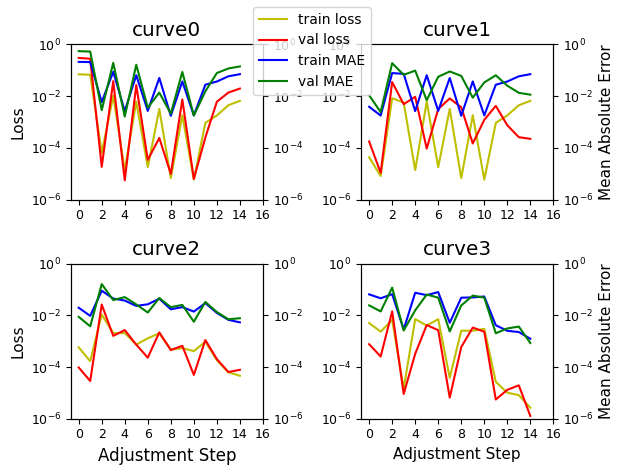

In [142]:
import matplotlib.ticker as ticker

fig = plt.figure()
axes = fig.subplots(nrows=2, ncols=2)

axes[0, 0].plot(hs["tr_loss_sum"]['c0'], color='y', label="train loss")
#axes[0, 0].plot(hs["tr_loss_sum"]['c0'], marker='o', color='g', label="train loss")
axes[0, 0].plot(hs["va_loss_sum"]['c0'], color='r', label="val loss")

#plt.gca().set_xticklabels( fontsize=10)

axes[0,0].set_yscale('log')
axes[0,0].xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))

cr_axes1 = axes[0,0].twinx()
cr_axes1.set_yscale('log')

cr_axes1.plot(hs["tr_mae_sum"]['c0'],color='b', label="train MAE")
cr_axes1.plot(hs["va_mae_sum"]['c0'],color='g', label="val MAE")
axes[0, 0].set_xticks(np.arange(0, 17, 2))
cr_axes1.set_xticks(np.arange(0, 17, 2))

axes[0, 0].tick_params(labelsize=9)
cr_axes1.tick_params(labelsize=9)

axes[0, 0].set_ylabel('Loss', fontsize=11)
#cr_axes1.set_ylabel('MAE', fontsize=10)
axes[0, 0].set_title("curve0")

axes[0, 0].set_ylim(1e-6, 1 )
cr_axes1.set_ylim(1e-6, 1 )

#----------
axes[0, 1].plot(hs["tr_loss_sum"]['c1'], color='y' )
axes[0, 1].plot(hs["va_loss_sum"]['c1'], color='r')

axes[0,1].set_yscale('log')
axes[0,1].xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))
cr_axes2 = axes[0,1].twinx()
cr_axes2.set_yscale('log')

cr_axes2.plot(hs["tr_mae_sum"]['c1'],color='b')
cr_axes2.plot(hs["va_mae_sum"]['c1'],color='g')
axes[0, 1].set_xticks(np.arange(0, 17, 2))
cr_axes2.set_xticks(np.arange(0, 17, 2))

cr_axes2.set_ylabel('Mean Absolute Error', fontsize=11)
axes[0, 1].set_title("curve1")

axes[0, 1].tick_params(labelsize=9)
cr_axes2.tick_params(labelsize=9)

axes[0, 1].set_ylim(1e-6, 1 )
cr_axes2.set_ylim(1e-6, 1 )
#----------
axes[1, 0].plot(hs["tr_loss_sum"]['c2'], color='y')
axes[1, 0].plot(hs["va_loss_sum"]['c2'], color='r')

axes[1,0].set_yscale('log')
axes[1,0].xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))
cr_axes3 = axes[1,0].twinx()
cr_axes3.set_yscale('log')

cr_axes3.plot(hs["tr_mae_sum"]['c2'],color='b')
cr_axes3.plot(hs["va_mae_sum"]['c2'],color='g')
axes[1, 0].set_xticks(np.arange(0, 17, 2))
cr_axes3.set_xticks(np.arange(0, 17, 2))

axes[1, 0].set_ylabel('Loss', fontsize=11)
axes[1, 0].set_xlabel('Adjustment Step', fontsize=12)
axes[1, 0].set_title("curve2")

axes[1, 0].tick_params(labelsize=9)
cr_axes3.tick_params(labelsize=9)

axes[1, 0].set_ylim(1e-6, 1 )
cr_axes3.set_ylim(1e-6, 1 )
#----------
axes[1, 1].plot(hs["tr_loss_sum"]['c3'], color='y')
axes[1, 1].plot(hs["va_loss_sum"]['c3'], color='r')

axes[1,1].set_yscale('log')
axes[1,1].xaxis.set_major_formatter(mtick.FormatStrFormatter('%.0f'))
cr_axes4 = axes[1,1].twinx()
cr_axes4.set_yscale('log')

cr_axes4.plot(hs["tr_mae_sum"]['c3'],color='b')
cr_axes4.plot(hs["va_mae_sum"]['c3'],color='g')
axes[1, 1].set_xticks(np.arange(0, 17, 2))
cr_axes4.set_xticks(np.arange(0, 17, 2))

cr_axes4.set_ylabel('Mean Absolute Error', fontsize=11)
axes[1, 1].set_xlabel('Adjustment Step', fontsize=11)
axes[1, 1].set_title("curve3")
axes[1, 1].set_ylim(1e-6, 1 )
cr_axes4.set_ylim(1e-6, 1 )

axes[1, 1].tick_params(labelsize=9)
cr_axes4.tick_params(labelsize=9)

#axes[1, 1].set_yticks([1e-6,1e-4,1e-2,1])
#axes[1, 1].get_yaxis().set_major_formatter(ticker.ScalarFormatter())
#cr_axes4.set_yticks([1e-6,1e-4,1e-2,1])
#cr_axes4.get_yaxis().set_major_formatter(ticker.ScalarFormatter())

lines = []
labels = []
for ax in fig.axes:
	Line, Label = ax.get_legend_handles_labels()
	# print(Label)
	lines.extend(Line)
	labels.extend(Label)

fig.legend(lines, labels, loc='upper center', fontsize=10)

fig.tight_layout()
plt.show()


fig.savefig("figures/adjust.png", dpi=300)





----------------------------------------------------- 
 

# Another training
# Curve 0 + other curves 

In [ ]:
lstm_model = get_compiled_model()

wide_window.train_df = train_df_00
wide_window.val_df = val_df_00
wide_window.test_df = test_df_00

history = fit_model(lstm_model, wide_window, epochs_num=500, verb=0, stop=[] )
eval1(history)

In [ ]:
plot_val(lstm_model, wide_window_t)

In [ ]:
lstm_model.save("norm01/c0_05k")
np.save('norm01/c0_05k.npy',history.history)

In [ ]:
#history=np.load('norm01/c0_05k.npy',allow_pickle='TRUE').item()
#eval3(history)

In [ ]:
lstm_model = tf.keras.models.load_model("norm01/c0_05k")

train_df = tf.concat ([train_df_00,val_df_00], axis=0)

wide_window.train_df = train_df
wide_window.val_df = val_df_00
wide_window.test_df = test_df_00

history = fit_model(lstm_model, wide_window, epochs_num=50, verb=0, stop=[] )
eval1(history)
plot_val(lstm_model, wide_window_t)

In [ ]:
lstm_model.save("norm01/c0_all")
np.save('norm01/c0_all.npy',history.history)

In [ ]:
"""
lstm_model = tf.keras.models.load_model("norm01/c0_all")

history=np.load('norm01/c0_all.npy',allow_pickle='TRUE').item()
eval3(history)
plot_val(lstm_model, wide_window_t)
"""

In [ ]:
lstm_model = tf.keras.models.load_model("norm01/c0_all")

wide_window.train_df = train_df_30
wide_window.val_df = val_df_30
wide_window.test_df = test_df_30
history = fit_model(lstm_model, wide_window, epochs_num=150, verb=0, stop=[] )
eval1(history)
plot_val(lstm_model, wide_window_t)


In [ ]:
train_df = tf.concat ([train_df_30,val_df_30], axis=0)

wide_window.train_df = train_df
wide_window.val_df = val_df_30
wide_window.test_df = test_df_30

history = fit_model(lstm_model, wide_window, epochs_num=50, verb=0, stop=[] )
eval1(history)
plot_val(lstm_model, wide_window_t)

In [ ]:
lstm_model.save("norm01/522rep01")

In [ ]:
lstm_model = tf.keras.models.load_model("norm01/522rep01")

wide_window.train_df = train_df_10
wide_window.val_df = val_df_10
wide_window.test_df = test_df_10
history = fit_model(lstm_model, wide_window, epochs_num=40, verb=0, stop=[] )
eval1(history)
plot_val(lstm_model, wide_window_t)

In [ ]:

train_df = tf.concat ([train_df_10,val_df_10], axis=0)
wide_window.train_df = train_df
wide_window.val_df = val_df_10
wide_window.test_df = test_df_10
history = fit_model(lstm_model, wide_window, epochs_num=40, verb=0, stop=[] )
eval1(history)
plot_val(lstm_model, wide_window_t)

In [ ]:
lstm_model.save("norm01/522rep02")

In [ ]:
lstm_model = tf.keras.models.load_model("norm01/522rep02")

train_df = tf.concat ([train_df_30,val_df_30], axis=0)
wide_window.train_df = train_df
wide_window.val_df = val_df_30
wide_window.test_df = test_df_30

history = fit_model(lstm_model, wide_window, epochs_num=20, verb=0, stop=[] )
eval1(history)
plot_val(lstm_model, wide_window_t)


In [ ]:
lstm_model.save("norm01/522rep03")

In [ ]:
lstm_model = tf.keras.models.load_model("norm01/522rep03")

train_df = tf.concat ([train_df_00,val_df_00], axis=0)

wide_window.train_df = train_df
wide_window.val_df = val_df_00
wide_window.test_df = test_df_00

history = fit_model(lstm_model, wide_window, epochs_num=50, verb=0, stop=[] )
eval1(history)
plot_val(lstm_model, wide_window_t)


In [ ]:
train_df = tf.concat ([train_df_30,val_df_30], axis=0)
wide_window.train_df = train_df
wide_window.val_df = val_df_30
wide_window.test_df = test_df_30
history = fit_model(lstm_model, wide_window, epochs_num=50, verb=0, stop=[] )
eval1(history)
plot_val(lstm_model, wide_window_t)

In [ ]:
train_df = tf.concat ([train_df_00,val_df_00], axis=0)

wide_window.train_df = train_df
wide_window.val_df = val_df_00
wide_window.test_df = test_df_00

history = fit_model(lstm_model, wide_window, epochs_num=30, verb=0, stop=[] )
eval1(history)
plot_val(lstm_model, wide_window_t)

In [ ]:
train_df = tf.concat ([train_df_30,val_df_30], axis=0)
wide_window.train_df = train_df
wide_window.val_df = val_df_30
wide_window.test_df = test_df_30
history = fit_model(lstm_model, wide_window, epochs_num=10, verb=0, stop=[] )
eval1(history)
plot_val(lstm_model, wide_window_t)

In [ ]:
train_df = tf.concat ([train_df_10,val_df_10], axis=0)
wide_window.train_df = train_df
wide_window.val_df = val_df_10
wide_window.test_df = test_df_10
history = fit_model(lstm_model, wide_window, epochs_num=10, verb=0, stop=[] )
eval1(history)
plot_val(lstm_model, wide_window_t)


In [ ]:
train_df = tf.concat ([train_df_30,val_df_30], axis=0)
wide_window.train_df = train_df
wide_window.val_df = val_df_30
wide_window.test_df = test_df_30
history = fit_model(lstm_model, wide_window, epochs_num=50, verb=0, stop=[] )
eval1(history)
plot_val(lstm_model, wide_window_t)

In [ ]:
train_df = tf.concat ([train_df_10,val_df_10], axis=0)
wide_window.train_df = train_df
wide_window.val_df = val_df_10
wide_window.test_df = test_df_10
history = fit_model(lstm_model, wide_window, epochs_num=30, verb=0, stop=[] )
eval1(history)
plot_val(lstm_model, wide_window_t)

In [ ]:
train_df = tf.concat ([train_df_30,val_df_30], axis=0)
wide_window.train_df = train_df
wide_window.val_df = val_df_30
wide_window.test_df = test_df_30
history = fit_model(lstm_model, wide_window, epochs_num=20, verb=0, stop=[] )
eval1(history)
plot_val(lstm_model, wide_window_t)

In [ ]:
train_df = tf.concat ([train_df_10,val_df_10], axis=0)
wide_window.train_df = train_df
wide_window.val_df = val_df_10
wide_window.test_df = test_df_10
history = fit_model(lstm_model, wide_window, epochs_num=20, verb=0, stop=[] )
eval1(history)
plot_val(lstm_model, wide_window_t)

In [ ]:
train_df = tf.concat ([train_df_30,val_df_30], axis=0)
wide_window.train_df = train_df
wide_window.val_df = val_df_30
wide_window.test_df = test_df_30
history = fit_model(lstm_model, wide_window, epochs_num=10, verb=0, stop=[] )
eval1(history)
plot_val(lstm_model, wide_window_t)

In [ ]:
train_df = tf.concat ([train_df_10,val_df_10], axis=0)
wide_window.train_df = train_df
wide_window.val_df = val_df_10
wide_window.test_df = test_df_10
history = fit_model(lstm_model, wide_window, epochs_num=10, verb=0, stop=[] )
eval1(history)
plot_val(lstm_model, wide_window_t)

In [ ]:
train_df = tf.concat ([train_df_30,val_df_30], axis=0)
wide_window.train_df = train_df
wide_window.val_df = val_df_30
wide_window.test_df = test_df_30
history = fit_model(lstm_model, wide_window, epochs_num=10, verb=0, stop=[] )
eval1(history)
plot_val(lstm_model, wide_window_t)

In [ ]:
train_df = tf.concat ([train_df_10,val_df_10], axis=0)
wide_window.train_df = train_df
wide_window.val_df = val_df_10
wide_window.test_df = test_df_10
history = fit_model(lstm_model, wide_window, epochs_num=10, verb=0, stop=[] )
eval1(history)
plot_val(lstm_model, wide_window_t)

In [ ]:
train_df = tf.concat ([train_df_30,val_df_30], axis=0)
wide_window.train_df = train_df
wide_window.val_df = val_df_30
wide_window.test_df = test_df_30
history = fit_model(lstm_model, wide_window, epochs_num=10, verb=0, stop=[] )
eval1(history)
plot_val(lstm_model, wide_window_t)

In [ ]:
lstm_model.save("norm01/522rep04")


 

----------------------------------------------

### hyperparameters

# batch plot

In [143]:

lstm_model = tf.keras.models.load_model("norm02/r11")

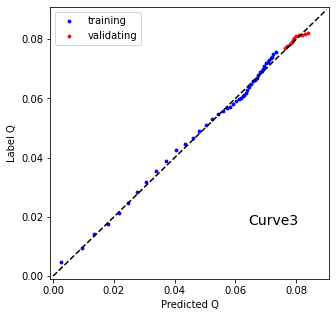

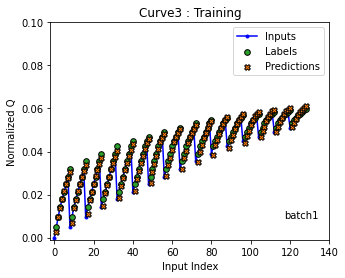

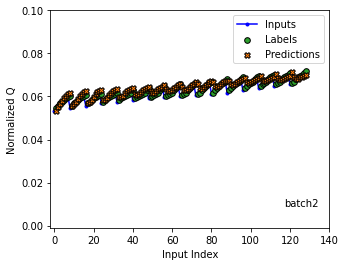

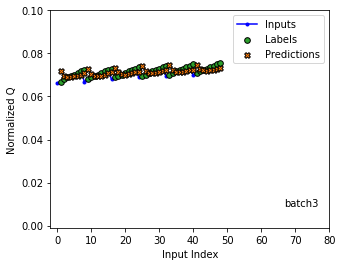

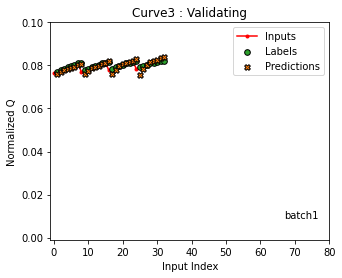

In [121]:

n = len(df)*0.5
crv_tr = train_df_30
crv_va = val_df_30
crv_te = test_df_30

window_t = wide_window_t
model = lstm_model
n_batch = 30

window_t.train_df = crv_tr
window_t.val_df = crv_va


#window_t.plot_batch(model, dset_name='train', n_batch=10 )
input_indices = np.arange(wide_window_t.total_window_size*16-16 )[slice(0, wide_window_t.total_window_size*16 -1, None)]
label_indices = np.arange(wide_window_t.total_window_size*16-15 )[slice(1, None, None)]

#fig, ax5 = plt.subplots(figsize =(5,3))
fig1, ax3 = plt.subplots(figsize =(5,5))
ax3.margins(0.01)

markers = ["X","o", "s", "D", "h"]
colors = ["blue", "red", "green", "k",  "m", 'cyan', 'y', 'w']

data = [window_t.train, window_t.val]
for j, dataset in enumerate(data) :

      for i, batch in enumerate(dataset) :
            fig2, ax5 = plt.subplots(figsize =(5,4))
            inputs, labels, lab = batch
            predictions = model(inputs)

            in3 = np.array(inputs, dtype=np.float32)
            #in3 = tf.convert_to_tensor(data, dtype=tf.float32)
            in3 = in3.reshape(8*len(inputs),5)
            in3 = tf.convert_to_tensor(in3, dtype=tf.float32)

            la3 = np.array(labels, dtype=np.float32)
            la3 = la3.reshape(8*len(inputs),1)
            la3 = tf.convert_to_tensor(la3, dtype=tf.float32)

            pr3 = np.array(predictions, dtype=np.float32)
            pr3 = pr3.reshape(8*len(inputs),1)
            pr3 = tf.convert_to_tensor(pr3, dtype=tf.float32)

          #  ax5.scatter(input_indices, inputs[:, :, 1],label='Inputs', marker='.',
            ax5.plot(input_indices[:8*len(inputs)], in3[:,1],label='Inputs', marker='.',
                        color=colors[j], zorder=-10 )
            ax5.scatter(label_indices[:8*len(inputs)], la3[:],label='Labels', marker='o',
                    edgecolors='k', c='#2ca02c', s=32)
            #ax5.scatter(label_indices,   predictions[:, :, 0], label='Predictions',
            ax5.scatter(label_indices[:(8*len(inputs))],   pr3[:], label='Predictions',
                          marker='X',  edgecolors='k', c='#ff7f0e', s=32)

            #ax3.scatter(predictions[:, 0, 0], labels[:, 0, 0],
            ax3.scatter(predictions[:, 7, 0], labels[:, 7, 0],
                        marker='.',color=colors[j], s=32)
            if j==0 and i==0 :
                ax3.scatter(predictions[0, 0:7, 0], labels[0, 0:7, 0],label='training',
                        marker='.',color=colors[j], s=32)
            if j==1 and i==0 :
                ax3.scatter(predictions[0, 0:7, 0], labels[0, 0:7, 0],label='validating',
                        marker='.',color=colors[j], s=32)


            ax5.legend()
            if i < 3 and j==0 :
                ax5.set_ylim(-0.001,0.1)
                ax5.text(0.9, 0.1,  "batch"+str(i+1), ha="center", transform=ax5.transAxes)
            else:
                ax5.set_ylim(-0.001,0.1)
                ax5.text(0.9, 0.1,  "batch"+str(i+1), ha="center", transform=ax5.transAxes)

            if j==0 and i==0 :
                ax3.legend()
            if j==1 and i==0:
                ax3.legend()
            #i1 = i+1
            if i==0 and j==0 : ax5.set_title('Curve3 : Training')
            if i==0 and j==1 : ax5.set_title('Curve3 : Validating')
            ax5.set_xlabel('Input Index')
            ax5.set_ylabel('Normalized Q')
            ax5.set_xlim(-2,140)
            if i == len(list(dataset))-1 : ax5.set_xlim(-2,80)

            fig2.savefig("figures/bc3"+str(j)+str(i)+".png", dpi=300)


            if n_batch is not None :
                    if n_batch <= i :
                        break
                    else:
                        continue
            else :
                continue

ax3.plot([0, 0.09], [0, 0.09], 'k--') # dashed diagonal
#ax5.invert_xaxis()
ax3.text(0.8, 0.2,  "Curve3", size=14, ha="center", transform=ax3.transAxes)
ax3.set_xlabel('Predicted Q')
ax3.set_ylabel('Label Q')
plt.gca().set_xlim(-1,80)

subplot_title = ('Validation')
#plt.gca().set_title(subplot_title)
fig1.savefig("figures/xy3.png", dpi=300)

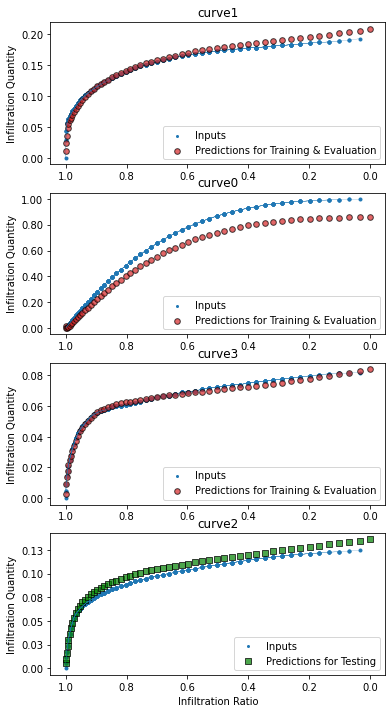

In [122]:
lstm_model = tf.keras.models.load_model("norm02/r11")
wide_window.train_df = train_df_10
wide_window.val_df = val_df_10
wide_window.test_df = test_df_10
#history = fit_model(lstm_model, wide_window, epochs_num=10, verb=0, stop=[] )
#eval1(history)
plot_val(lstm_model, wide_window_t)


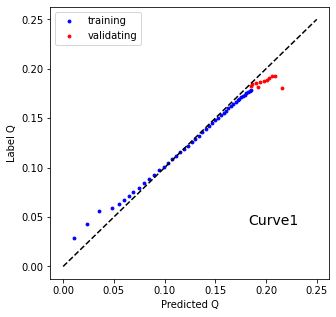

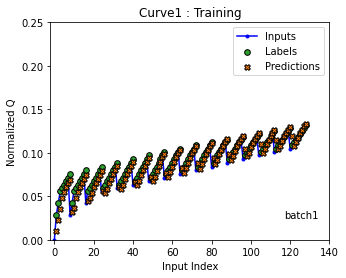

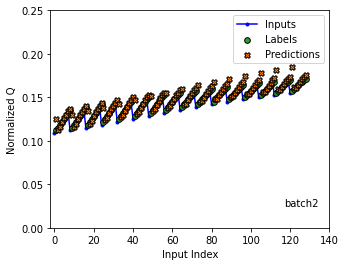

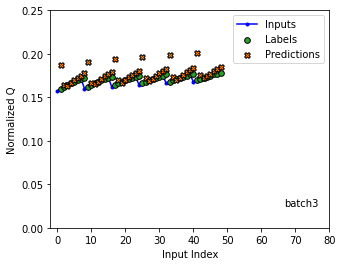

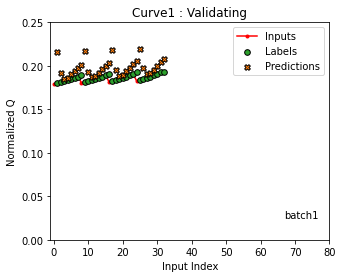

In [123]:
n = len(df)*0.5
crv_tr = train_df_10
crv_va = val_df_10
crv_te = test_df_10

window_t = wide_window_t
model = lstm_model
n_batch = 30

window_t.train_df = crv_tr
window_t.val_df = crv_va


#window_t.plot_batch(model, dset_name='train', n_batch=10 )
input_indices = np.arange(wide_window_t.total_window_size*16-16 )[slice(0, wide_window_t.total_window_size*16 -1, None)]
label_indices = np.arange(wide_window_t.total_window_size*16-15 )[slice(1, None, None)]

#fig, ax5 = plt.subplots(figsize =(5,3))
#ax5.margins(0.01)
fig1, ax3 = plt.subplots(figsize =(5,5))

markers = ["X","o", "s", "D", "h"]
colors = ["blue", "red", "green", "k",  "m", 'cyan', 'y', 'w']

data = [window_t.train, window_t.val]
for j, dataset in enumerate(data) :

      for i, batch in enumerate(dataset) :
            fig2, ax5 = plt.subplots(figsize =(5,4))
            inputs, labels, lab = batch
            predictions = model(inputs)

            in3 = np.array(inputs, dtype=np.float32)
            #in3 = tf.convert_to_tensor(data, dtype=tf.float32)
            in3 = in3.reshape(8*len(inputs),5)
            in3 = tf.convert_to_tensor(in3, dtype=tf.float32)

            la3 = np.array(labels, dtype=np.float32)
            la3 = la3.reshape(8*len(inputs),1)
            la3 = tf.convert_to_tensor(la3, dtype=tf.float32)

            pr3 = np.array(predictions, dtype=np.float32)
            pr3 = pr3.reshape(8*len(inputs),1)
            pr3 = tf.convert_to_tensor(pr3, dtype=tf.float32)

          #  ax5.scatter(input_indices, inputs[:, :, 1],label='Inputs', marker='.',
            ax5.plot(input_indices[:8*len(inputs)], in3[:,1],label='Inputs', marker='.',
                        color=colors[j], zorder=-10 )
            ax5.scatter(label_indices[:8*len(inputs)], la3[:],label='Labels', marker='o',
                    edgecolors='k', c='#2ca02c', s=32)
            #ax5.scatter(label_indices,   predictions[:, :, 0], label='Predictions',
            ax5.scatter(label_indices[:(8*len(inputs))],   pr3[:], label='Predictions',
                          marker='X',  edgecolors='k', c='#ff7f0e', s=32)

            ax3.scatter(predictions[:, 7, 0], labels[:, 7, 0],
                        marker='.',color=colors[j], s=32)
            if j==0 and i==0 :
                ax3.scatter(predictions[0, 0:7, 0], labels[0, 0:7, 0],label='training',
                        marker='.',color=colors[j], s=32)
            if j==1 and i==0 :
                ax3.scatter(predictions[0, 0:7, 0], labels[0, 0:7, 0],label='validating',
                        marker='.',color=colors[j], s=32)

            ax5.legend()
            if i < 3 and j==0 :
                ax5.set_ylim(0,0.25)
                ax5.text(0.9, 0.1,  "batch"+str(i+1), ha="center", transform=ax5.transAxes)
            else:
                ax5.set_ylim(0,0.25)
                ax5.text(0.9, 0.1,  "batch"+str(i+1), ha="center", transform=ax5.transAxes)

            if j==0 and i==0 :
                ax3.legend()
            if j==1 and i==0:
                ax3.legend()
            #i1 = i+1
            if i==0 and j==0 : ax5.set_title('Curve1 : Training')
            if i==0 and j==1 : ax5.set_title('Curve1 : Validating')
            ax5.set_xlabel('Input Index')
            ax5.set_ylabel('Normalized Q')
            ax5.set_xlim(-2,140)
            if i == len(list(dataset))-1 : ax5.set_xlim(-2,80)

            fig2.savefig("figures/bc1"+str(j)+str(i)+".png", dpi=300)


            if n_batch is not None :
                    if n_batch <= i :
                        break
                    else:
                        continue
            else :
                continue

ax3.plot([0, 0.25], [0, 0.25], 'k--') # dashed diagonal
#ax3.set_xlim(0,0.22)
#ax3.set_ylim(0,0.22)
#ax5.invert_xaxis()
ax3.set_xlabel('Predicted Q')
ax3.set_ylabel('Label Q')
ax3.text(0.8, 0.2,  "Curve1", size=14, ha="center", transform=ax3.transAxes)

subplot_title = ('Validation')
#plt.gca().set_title(subplot_title)
plt.gca().set_xlim(-1,80)
#ax5.set_xlim(-1,80)

fig1.savefig("figures/xy1.png", dpi=300)

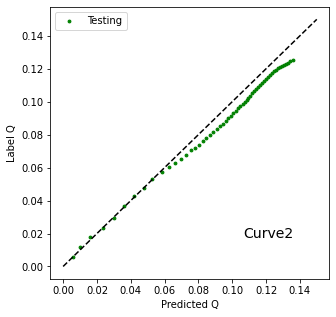

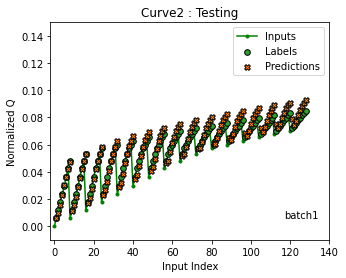

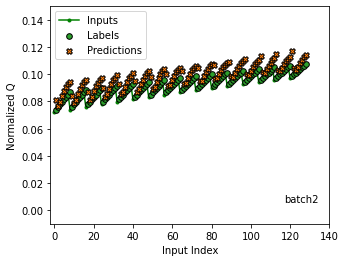

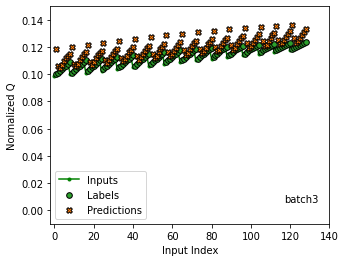

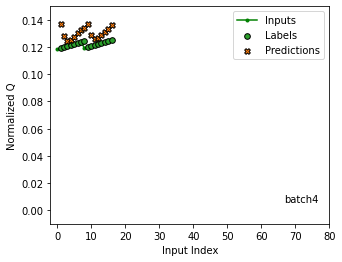

In [124]:
n = len(df)*0.5
crv_tr = train_df_20
crv_va = val_df_20
crv_te = test_df_20

window_t = wide_window_t
model = lstm_model
n_batch = 30

window_t.train_df = crv_tr
window_t.val_df = crv_va
window_t.test_df = crv_te


#window_t.plot_batch(model, dset_name='train', n_batch=10 )
input_indices = np.arange(wide_window_t.total_window_size*16-16 )[slice(0, wide_window_t.total_window_size*16 -1, None)]
label_indices = np.arange(wide_window_t.total_window_size*16-15 )[slice(1, None, None)]

#fig, ax5 = plt.subplots(figsize =(5,3))
#ax5.margins(0.01)
fig1, ax3 = plt.subplots(figsize =(5,5))

markers = ["X","o", "s", "D", "h"]
colors = ["blue", "red", "green", "k",  "m", 'cyan', 'y', 'w']

data = [window_t.test]
for j, dataset in enumerate(data) :

      for i, batch in enumerate(dataset) :
            fig2, ax5 = plt.subplots(figsize =(5,4))
            inputs, labels, lab = batch
            predictions = model(inputs)

            in3 = np.array(inputs, dtype=np.float32)
            #in3 = tf.convert_to_tensor(data, dtype=tf.float32)
            in3 = in3.reshape(8*len(inputs),5)
            in3 = tf.convert_to_tensor(in3, dtype=tf.float32)

            la3 = np.array(labels, dtype=np.float32)
            la3 = la3.reshape(8*len(inputs),1)
            la3 = tf.convert_to_tensor(la3, dtype=tf.float32)

            pr3 = np.array(predictions, dtype=np.float32)
            pr3 = pr3.reshape(8*len(inputs),1)
            pr3 = tf.convert_to_tensor(pr3, dtype=tf.float32)

          #  ax5.scatter(input_indices, inputs[:, :, 1],label='Inputs', marker='.',
            ax5.plot(input_indices[:8*len(inputs)], in3[:,1],label='Inputs', marker='.',
                        color=colors[2], zorder=-10 )
            ax5.scatter(label_indices[:8*len(inputs)], la3[:],label='Labels', marker='o',
                    edgecolors='k', c='#2ca02c', s=32)
            #ax5.scatter(label_indices,   predictions[:, :, 0], label='Predictions',
            ax5.scatter(label_indices[:(8*len(inputs))],   pr3[:], label='Predictions',
                          marker='X',  edgecolors='k', c='#ff7f0e', s=32)

            ax3.scatter(predictions[:, 7, 0], labels[:, 7, 0],
                        marker='.',color=colors[2], s=32)
            if j==0 and i==0 :
                ax3.scatter(predictions[0, 0:7, 0], labels[0, 0:7, 0],label='Testing',
                        marker='.',color=colors[2], s=32)
            if j==1 and i==0 :
                ax3.scatter(predictions[0, 0:7, 0], labels[0, 0:7, 0],label='Testing',
                        marker='o',color=colors[2], s=16)

            ax5.legend()
            if i < 3 and j==0 :
                ax5.set_ylim(-0.01,0.15)
                ax5.text(0.9, 0.1,  "batch"+str(i+1), ha="center", transform=ax5.transAxes)
            else:
                ax5.set_ylim(-0.01,0.15)
                ax5.text(0.9, 0.1,  "batch"+str(i+1), ha="center", transform=ax5.transAxes)

            if j==0 and i==0 :
                ax3.legend()
            if j==1 and i==0:
                ax3.legend()
            #i1 = i+1
            if i==0 and j==0 : ax5.set_title('Curve2 : Testing')
            if i==0 and j==1 : ax5.set_title('Curve2 : Testing')
            ax5.set_xlabel('Input Index')
            ax5.set_ylabel('Normalized Q')
            ax5.set_xlim(-2,140)
            if i == len(list(dataset))-1 : ax5.set_xlim(-2,80)

            fig2.savefig("figures/bc2"+str(j)+str(i)+".png", dpi=300)


            if n_batch is not None :
                    if n_batch <= i :
                        break
                    else:
                        continue
            else :
                continue

ax3.plot([0, 0.15], [0, 0.15], 'k--') # dashed diagonal
#ax3.set_xlim(0,0.22)
#ax3.set_ylim(0,0.22)
#ax5.invert_xaxis()
ax3.set_xlabel('Predicted Q')
ax3.set_ylabel('Label Q')
ax3.text(0.8, 0.2,  "Curve2", size=14, ha="center", transform=ax5.transAxes)

subplot_title = ('Validation')
#plt.gca().set_title(subplot_title)
#plt.gca().set_xlim(0,80)
fig1.savefig("figures/xy2.png", dpi=300)


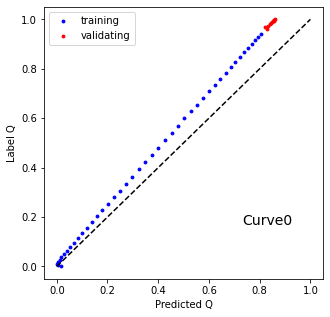

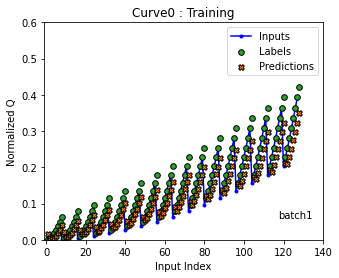

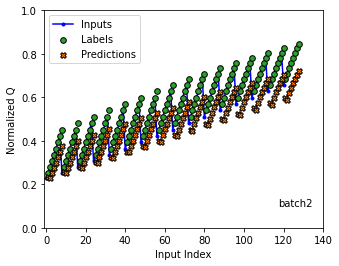

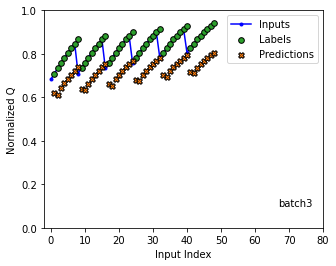

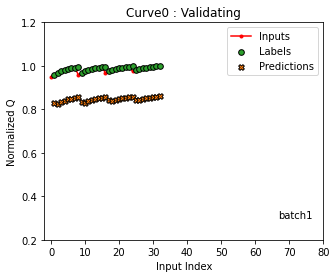

In [84]:
n = len(df)*0.5
crv_tr = train_df_00
crv_va = val_df_00
crv_te = test_df_00

window_t = wide_window_t
model = lstm_model
n_batch = 30

window_t.train_df = crv_tr
window_t.val_df = crv_va


#window_t.plot_batch(model, dset_name='train', n_batch=10 )
input_indices = np.arange(wide_window_t.total_window_size*16-16 )[slice(0, wide_window_t.total_window_size*16 -1, None)]
label_indices = np.arange(wide_window_t.total_window_size*16-15 )[slice(1, None, None)]

#fig, ax5 = plt.subplots(figsize =(5,3))
#ax5.margins(0.01)
fig1, ax3 = plt.subplots(figsize =(5,5))

markers = ["X","o", "s", "D", "h"]
colors = ["blue", "red", "green", "k",  "m", 'cyan', 'y', 'w']

data = [window_t.train, window_t.val]
for j, dataset in enumerate(data) :

      for i, batch in enumerate(dataset) :
            fig2, ax5 = plt.subplots(figsize =(5,4))
            inputs, labels, lab = batch
            predictions = model(inputs)

            in3 = np.array(inputs, dtype=np.float32)
            #in3 = tf.convert_to_tensor(data, dtype=tf.float32)
            in3 = in3.reshape(8*len(inputs),5)
            in3 = tf.convert_to_tensor(in3, dtype=tf.float32)

            la3 = np.array(labels, dtype=np.float32)
            la3 = la3.reshape(8*len(inputs),1)
            la3 = tf.convert_to_tensor(la3, dtype=tf.float32)

            pr3 = np.array(predictions, dtype=np.float32)
            pr3 = pr3.reshape(8*len(inputs),1)
            pr3 = tf.convert_to_tensor(pr3, dtype=tf.float32)

            ax5.plot(input_indices[:8*len(inputs)], in3[:,1],label='Inputs', marker='.',
                        color=colors[j], zorder=-10 )
            ax5.scatter(label_indices[:8*len(inputs)], la3[:],label='Labels', marker='o',
                    edgecolors='k', c='#2ca02c', s=32)
            #ax5.scatter(label_indices,   predictions[:, :, 0], label='Predictions',
            ax5.scatter(label_indices[:(8*len(inputs))],   pr3[:], label='Predictions',
                          marker='X',  edgecolors='k', c='#ff7f0e', s=32)

            ax3.scatter(predictions[:, 7, 0], labels[:, 7, 0],
                        marker='.',color=colors[j], s=32)
            if j==0 and i==0 :
                ax3.scatter(predictions[0, 0:7, 0], labels[0, 0:7, 0],label='training',
                        marker='.',color=colors[j], s=32)
            if j==1 and i==0 :
                ax3.scatter(predictions[0, 0:7, 0], labels[0, 0:7, 0],label='validating',
                        marker='.',color=colors[j], s=32)


            ax5.legend()
            if i < 1 and j==0 :
                ax5.set_ylim(0,0.6)
                ax5.text(0.9, 0.1,  "batch"+str(i+1), ha="center", transform=ax5.transAxes)
            else:
                ax5.set_ylim(0,1)
                ax5.text(0.9, 0.1,  "batch"+str(i+1), ha="center", transform=ax5.transAxes)

            if j==0 and i==0 :
                ax3.legend()
            if j==1 and i==0:
                ax3.legend()
            #i1 = i+1
            if i==0 and j==0 : ax5.set_title('Curve0 : Training')
            if i==0 and j==1 : ax5.set_title('Curve0 : Validating')
            ax5.set_xlabel('Input Index')
            ax5.set_ylabel('Normalized Q')
            ax5.set_xlim(-1,140)
            if i == len(list(dataset))-1 : ax5.set_xlim(-2,80)
            if j== 1 : ax5.set_ylim(0.2,1.2)
            fig2.savefig("figures/bc0"+str(j)+str(i)+".png", dpi=300)


            if n_batch is not None :
                    if n_batch <= i :
                        break
                    else:
                        continue
            else :
                continue

ax3.plot([0, 1], [0, 1], 'k--') # dashed diagonal
#ax3.set_xlim(0,0.22)
#ax3.set_ylim(0,0.22)
#ax5.invert_xaxis()
ax3.set_xlabel('Predicted Q')
ax3.set_ylabel('Label Q')
ax3.text(0.8, 0.2,  "Curve0", size=14, ha="center", transform=ax3.transAxes)

subplot_title = ('Validation')
#plt.gca().set_title(subplot_title)
#plt.gca().set_ylim(0.2,1.2)

fig1.savefig("figures/xy0.png", dpi=300)

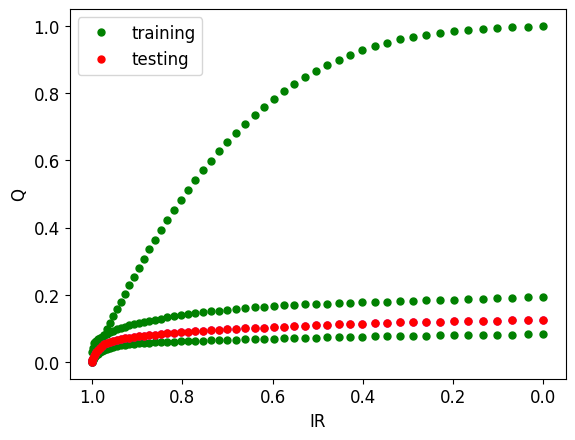

In [152]:
def plot_curve3(trg, valg, teg):
    plt.plot(trg['IR'], trg['FlowHt'], 'go', label='training', markersize=5, zorder=1)
    #plt.plot(valg['IR'], valg['FlowHt'], 'mo', label='val',  markersize=5, zorder=1)
    plt.plot(valg['IR'], valg['FlowHt'], 'mo',   markersize=5, zorder=1)
    plt.plot(teg['IR'], teg['FlowHt'], 'ro', label='testing',  markersize=5, zorder=1)
    plt.xlabel('IR')
    #plt.ylabel('Flow Height [m]')
    plt.ylabel('Q')
    #plt.xlim([plt.xlim()[1], plt.xlim()[0]])
#    plt.xlim(0, 1)
#    plt.ylim(0, 100)
    plt.legend(loc='best')
    plt.gca().invert_xaxis()


n = len(df)*0.5
crv_tr0 = df[0:int(n*0.50)].copy()
crv_tr1 = df[int(n*0.75):int(n)].copy()
crv_tr = pd.concat([crv_tr0, crv_tr1])
crv_va = df[int(n*0.50):int(n*0.75)].copy()

plot_curve3(crv_tr, crv_va, crv_va )

In [153]:

lstm_model = tf.keras.models.load_model("norm02/r11")

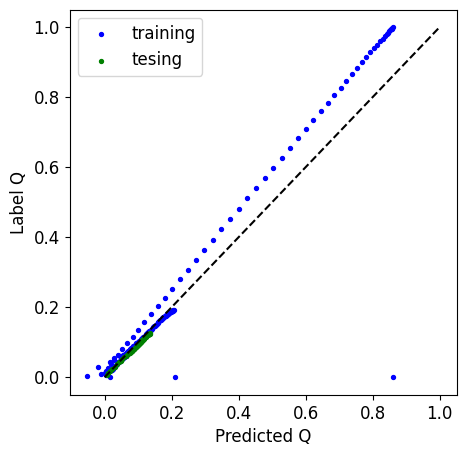

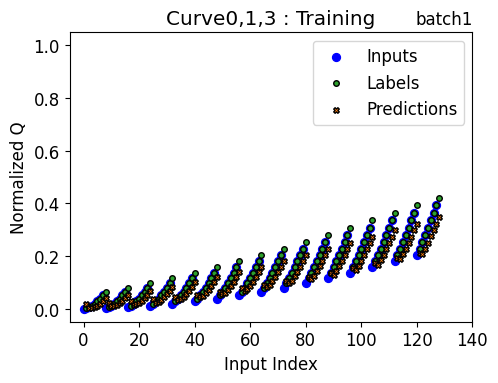

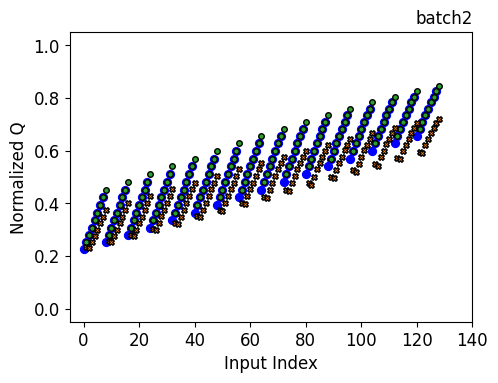

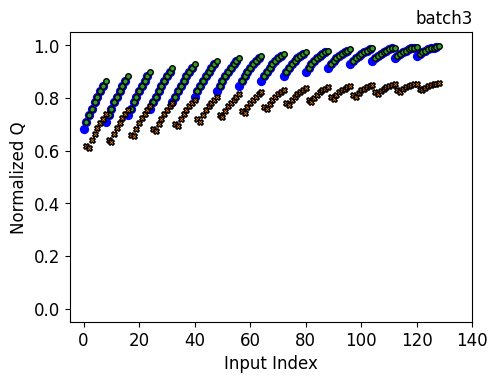

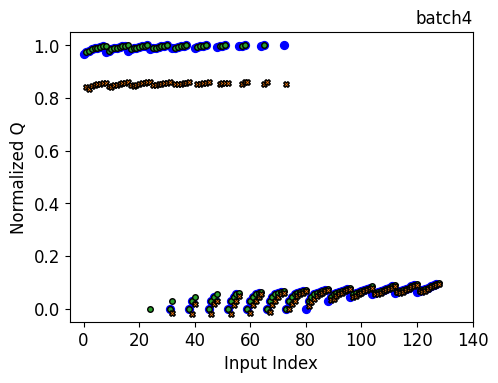

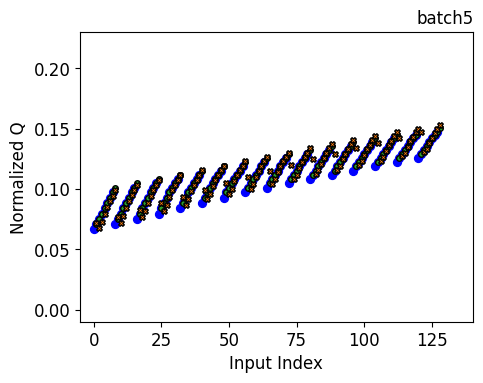

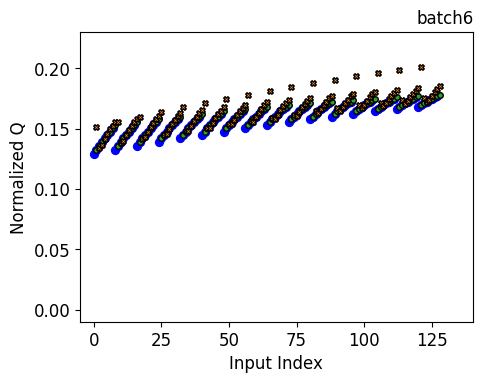

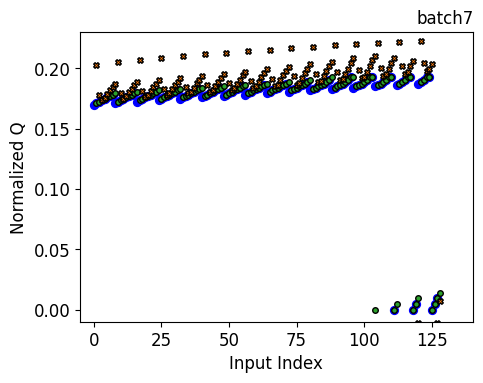

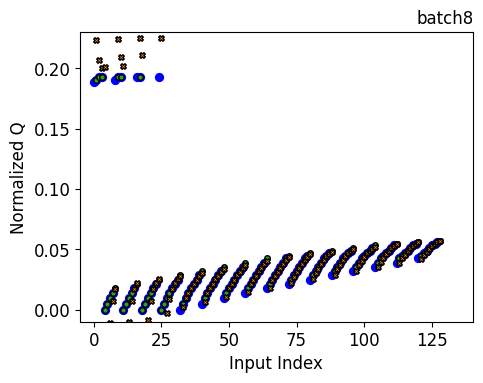

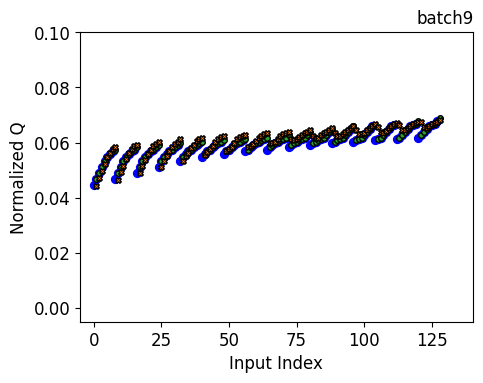

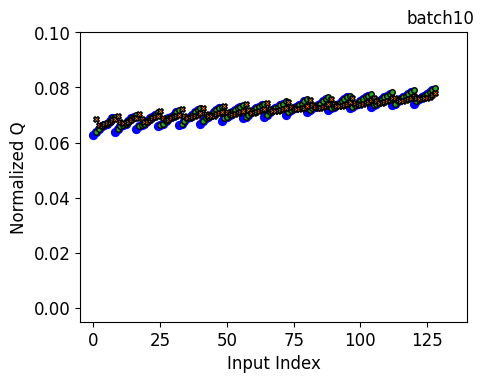

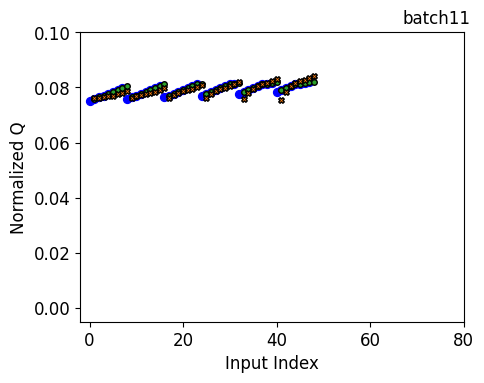

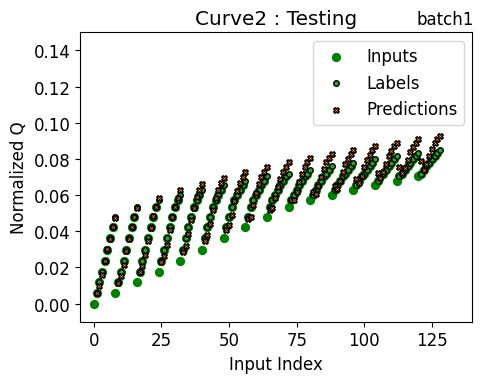

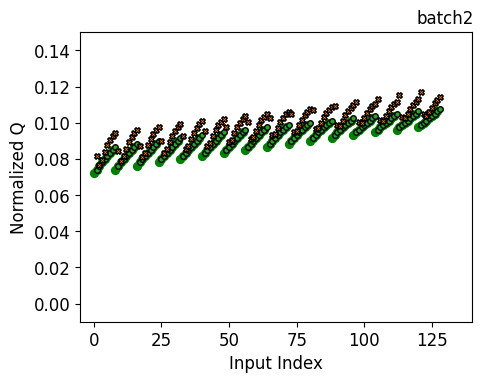

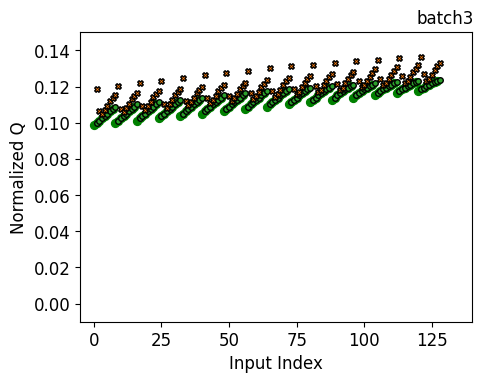

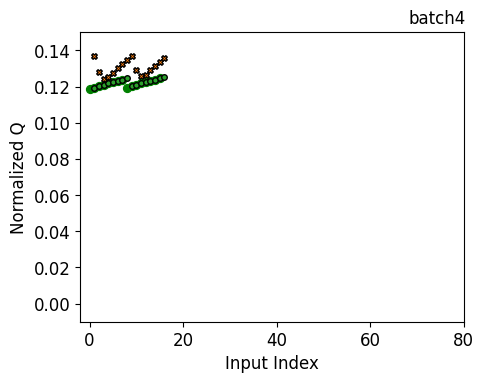

In [188]:
n = len(df)*0.5
crv_tr0 = df[0:int(n*0.50)].copy()
crv_tr1 = df[int(n*0.75):int(n)].copy()
crv_tr = pd.concat([crv_tr0, crv_tr1])
crv_va = df[int(n*0.50):int(n*0.75)].copy()

window_t = wide_window_t
model = lstm_model
n_batch = 30

window_t.train_df = crv_tr
window_t.val_df = crv_va

#window_t.plot_batch(model, dset_name='train', n_batch=10 )
input_indices = np.arange(wide_window_t.total_window_size*16-16 )[slice(0, wide_window_t.total_window_size*16 -1, None)]
label_indices = np.arange(wide_window_t.total_window_size*16-15 )[slice(1, None, None)]
#
pre_t = np.array([])
lab_t = np.array([])
pre_v = np.array([])
lab_v = np.array([])
#fig, ax5 = plt.subplots(figsize =(5,3))
#ax5.margins(0.01)
fig1, ax3 = plt.subplots(figsize =(5,5))

markers = ["X","o", "s", "D", "h"]
colors = ["blue", "red", "green", "k",  "m", 'cyan', 'y', 'w']

data = [window_t.train, window_t.val]
for j, dataset in enumerate(data) :
      i1=0
      for i, batch in enumerate(dataset) :
            fig2, ax5 = plt.subplots(figsize =(5,4))
            inputs, labels, lab = batch
            predictions = model(inputs)

            in3 = np.array(inputs, dtype=np.float32)
            #in3 = tf.convert_to_tensor(data, dtype=tf.float32)
            in3 = in3.reshape(8*len(inputs),5)
            in3 = tf.convert_to_tensor(in3, dtype=tf.float32)

            la3 = np.array(labels, dtype=np.float32)
            la3 = la3.reshape(8*len(inputs),1)
            la3 = tf.convert_to_tensor(la3, dtype=tf.float32)

            pr3 = np.array(predictions, dtype=np.float32)
            pr3 = pr3.reshape(8*len(inputs),1)
            pr3 = tf.convert_to_tensor(pr3, dtype=tf.float32)

          #  ax5.scatter(input_indices, inputs[:, :, 1],label='Inputs', marker='.',
            if j == 0:
                ax5.scatter(input_indices[:8*len(inputs)], in3[:,1],label='Inputs', marker='.',
                        color=colors[j] , s=128)
            if j == 1:
                ax5.scatter(input_indices[:8*len(inputs)], in3[:,1],label='Inputs', marker='.',
                        color=colors[2], s=128 )

            ax5.scatter(label_indices[:8*len(inputs)], la3[:],label='Labels', marker='o',
                    edgecolors='k', c='#2ca02c', s=16)
            #ax5.scatter(label_indices,   predictions[:, :, 0], label='Predictions',
            ax5.scatter(label_indices[:(8*len(inputs))],   pr3[:], label='Predictions',
                          marker='X',  edgecolors='k', c='#ff7f0e', s=16)
            if j == 0 :
                ax3.scatter(predictions[:, 7, 0], labels[:, 7, 0],
                        marker='.',color=colors[j], s=32)
                pre_t = np.append(pre_t, predictions[:, 7, 0])
                lab_t = np.append(lab_t, labels[:, 7, 0])
            if j == 1 :
                ax3.scatter(predictions[:, 7, 0], labels[:, 7, 0],
                        marker='.',color=colors[2], s=32)
                pre_v = np.append(pre_v, predictions[:, 7, 0])
                lab_v = np.append(lab_v, labels[:, 7, 0])

            if j==0 and i==0 :
                ax3.scatter(predictions[0, 0:7, 0], labels[0, 0:7, 0],label='training',
                        marker='.',color=colors[j], s=32)
                pre_t = np.append(pre_t, np.ravel(predictions[0, 0:7, 0]))
                lab_t = np.append(lab_t, np.ravel(labels[0, 0:7, 0]))

            if j==1 and i==0 :
                ax3.scatter(predictions[0, 0:7, 0], labels[0, 0:7, 0],label='tesing',
                        marker='.',color=colors[2], s=32)
                pre_v = np.append(pre_v, np.ravel(predictions[0, 0:7, 0]))
                lab_v = np.append(lab_v, np.ravel(labels[0, 0:7, 0]))

            if i == 0:
                ax5.legend()
            if i < 4 and j==0 :
                ax5.set_ylim(-0.05,1.05)
                ax5.text(0.93, 1.03 ,  "batch"+str(i+1), ha="center", transform=ax5.transAxes)
            if 3 < i < 8 and j==0 :
                ax5.set_ylim(-0.01,0.23)
                ax5.text(0.93, 1.03,  "batch"+str(i+1), ha="center", transform=ax5.transAxes)
            if i >= 8 and j==0  :
                ax5.set_ylim(-0.005,0.10)
                ax5.text(0.93, 1.03,  "batch"+str(i+1), ha="center", transform=ax5.transAxes)
            if j==1  :
                ax5.set_ylim(-0.01,0.15)
                ax5.text(0.93, 1.03,  "batch"+str(i+1), ha="center", transform=ax5.transAxes)

            if j==0 and i1==0 :
                ax3.legend()
            if j==1 and i==0:
                ax3.legend()
            i1 = i+1
            if i==0 and j==0 : ax5.set_title('Curve0,1,3 : Training')
            if i==0 and j==1 : ax5.set_title('Curve2 : Testing')
            ax5.set_xlabel('Input Index')
            ax5.set_ylabel('Normalized Q')
            ax5.set_xlim(-5,140)
            if i == len(list(dataset))-1 : ax5.set_xlim(-2,80)
            
            plt.gcf().tight_layout()

            fig2.savefig("figures/tot"+str(j)+str(i)+".png", dpi=300)

            if n_batch is not None :
                    if n_batch <= i :
                        break
                    else:
                        continue
            else :
                continue

            #ax3.legend([],['train', 'val'])
#ax3.legend()

ax3.plot([0, 1], [0, 1], 'k--') # dashed diagonal
#ax5.invert_xaxis()
ax3.set_xlabel('Predicted Q')
ax3.set_ylabel('Label Q')
#ax3.set_ylim(0,1.1)
#ax3.set_xlim(0,1.1)

#ax3.margins(0.02, 0.02)

#subplot_title = ('Test')
#plt.gca().set_title(subplot_title)
# save figure
fig1.savefig("figures/txy.png", dpi=300)



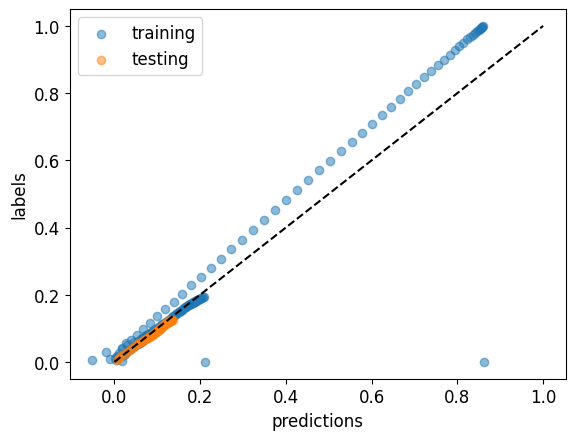

In [155]:
plt.scatter(pre_t, lab_t, alpha=0.5, label='training')
plt.scatter(pre_v, lab_v, alpha=0.5, label='testing')
plt.xlabel('predictions')
plt.ylabel('labels')
fig1.savefig("figures/txy_2.png", dpi=300)
plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal
plt.legend()

Coefficients: 
 [[1.12744198]]
Mean squared error: 1.11e-03
Coefficient of determination: 0.979193


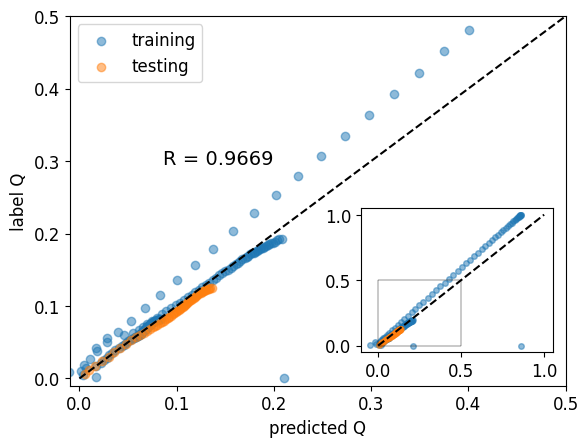

In [156]:
from sklearn import datasets, linear_model
from sklearn.metrics import mean_squared_error, r2_score
import matplotlib.patches as patches

fig = plt.figure()

# Create linear regression object
regr = linear_model.LinearRegression()

pre_all2 = pre_t.reshape(-1, 1)
lab_all2 = lab_t.reshape(-1,1)
pre_all3 = pre_v.reshape(-1, 1)
lab_all3 = lab_v.reshape(-1,1)

pre_all = np.append(pre_t,pre_v)
lab_all = np.append(lab_t,lab_v)
pre_all = pre_all.reshape(-1, 1)
lab_all = lab_all.reshape(-1,1)



# Train the model using the training sets
regr.fit(pre_all, lab_all)

# Make predictions using the testing set
pre_pre_all = regr.predict(pre_all)

# The coefficients
print('Coefficients: \n', regr.coef_)
# The mean squared error
print('Mean squared error: %.2e'
      % mean_squared_error(pre_all, pre_pre_all))
# The coefficient of determination: 1 is perfect prediction
print('Coefficient of determination: %.6f'
      % r2_score(pre_all, pre_pre_all))

# Plot outputs
ax1 = plt.axes()  # standard axes
ax2 = plt.axes([0.58, 0.18, 0.3, 0.3])

ax1.scatter(pre_all2, lab_all2,   alpha=0.5, label='training')
ax1.scatter(pre_all3, lab_all3,   alpha=0.5, label='testing')
#ax1.plot(pre_all2, pre_pre_all2, color='blue', linewidth=3)

ax1.set_xlabel('predicted Q')
ax1.set_ylabel('label Q')
ax1.plot([0, 1], [0, 1], 'k--') # dashed diagonal
ax1.text(0.3, 0.6 ,  "R = 0.9669", fontsize=14 , ha="center", transform=ax1.transAxes)

#plt.xticks(())
#plt.yticks(())

ax2.scatter(pre_all2, lab_all2,  alpha=0.5, s=16)
ax2.scatter(pre_all3, lab_all3,  alpha=0.5, s=16)
#ax2.plot(pre_all2, pre_pre_all2, color='blue', linewidth=2)

#ax2.set_xlabel('predictions')
#ax2.set_ylabel('labels')
ax2.plot([0, 1], [0, 1], 'k--') # dashed diagonal
ax2.add_patch(
     patches.Rectangle(
        (0, 0),
        0.5,
        0.5,
        linewidth=0.3,
        edgecolor = 'k',
        facecolor = 'yellow',
        fill=False #, alpha=0.6
     ) )




ax1.set_xlim(-0.01,0.5)
ax1.set_ylim(-0.01,0.5)


lines = []
labels = []
for ax in fig.axes:
	Line, Label = ax.get_legend_handles_labels()
	# print(Label)
	lines.extend(Line)
	labels.extend(Label)

ax1.legend(lines, labels, loc='upper left')

#ax2.tight_layout()


#plt.gcf().savefig("figures/txy_reg.png", dpi=300)
fig.savefig("figures/txy_reg.png", dpi=300)

In [170]:
cov = (np.sum(pre_t*lab_t)-len(pre_t)*np.mean(pre_t)
       *np.mean(lab_t))/len(pre_t)
print(cov)

0.0747211460380092


In [171]:
np.cov(pre_t, lab_t)[0,1]

0.075155571305672

In [172]:
corr = cov/(np.std(pre_t)*np.std(lab_t))
corr

0.9647389931694261

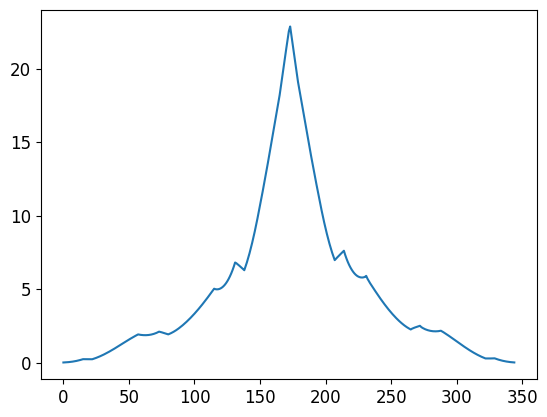

In [173]:
C0 = np.correlate(pre_t,lab_t,'full')
#np.correlate(pre_all,lab_all,'full')
plt.plot(C0)

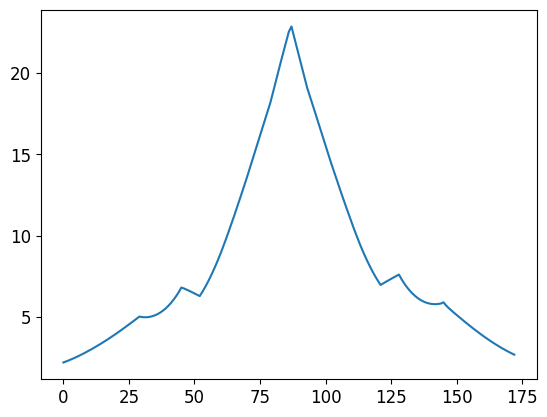

In [174]:
C0 = np.correlate(pre_t,lab_t,'same')
#np.correlate(pre_all,lab_all,'full')
plt.plot(C0)

In [175]:
R1 = np.corrcoef(pre_t, lab_t)[1,0]
R1
#plt.plot(R1)

0.964738993169426

In [176]:
R2 = np.corrcoef(pre_t, lab_t)
R2

array([[1.        , 0.96473899],
       [0.96473899, 1.        ]])

In [177]:
import scipy.stats as stats
stats.pearsonr(pre_t, lab_t)

(0.9647389931694259, 4.6932544150469285e-101)

In [ ]:
# Predict Any Curve

#### read Good data

In [178]:
df3 = pd.read_csv(
    #os.path.join(mglearn.datasets.DATA_PATH, "anycurve3.csv") )
    os.path.join(mglearn.datasets.DATA_PATH, "constant(del).csv") )

df3 = df3[['IR', 'FlowHt', 'Sand','Ash','delIR','delFlow']]
df3['delIF'] = df3['delFlow']/df3['delIR']*-1

df3['delIF']=df3['delIF'].replace(np.nan, 0)
df3 = df3[['IR', 'FlowHt', 'Sand','Ash', 'delIR' ]]

display(df3.head())

IR  FlowHt  Sand  Ash   delIR
0  1.0000    0.00   0.4  0.6  0.0000
1  0.9995    0.38   0.4  0.6 -0.0005
2  0.9985    0.96   0.4  0.6 -0.0010
3  0.9970    1.54   0.4  0.6 -0.0015
4  0.9950    2.02   0.4  0.6 -0.0020

IR        FlowHt          Sand           Ash         delIR
count  2.320000e+02  2.320000e+02  2.320000e+02  2.320000e+02  2.320000e+02
mean  -8.805217e-16 -3.062684e-17 -6.916881e-15  1.308340e-15 -9.953724e-16
std    1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00  1.000000e+00
min   -2.174275e+00 -7.893240e-01 -1.369029e+00 -1.369029e+00 -1.698768e+00
25%   -7.672155e-01 -5.202807e-01 -5.989500e-01 -5.989500e-01 -8.642854e-01
50%    2.786256e-01 -3.790967e-01 -6.855627e-15  1.332268e-15 -1.033895e-15
75%    9.065283e-01 -1.456194e-01  5.989500e-01  5.989500e-01  8.642854e-01
max    1.115497e+00  2.981395e+00  1.369029e+00  1.369029e+00  1.698768e+00

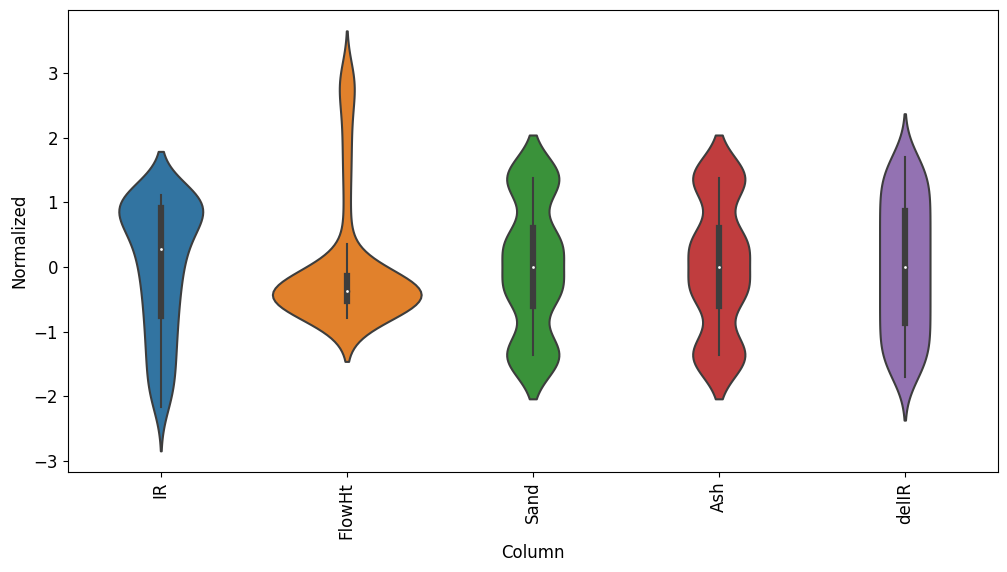

In [179]:
df3_mean = df3.mean()
df3_std = df3.std()
df3_std_s = (df3 - df3_mean) / df3_std
df3_std_m = df3_std_s.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df3_std_m)
_ = ax.set_xticklabels(df3.keys(), rotation=90)
df3_std_s.describe()


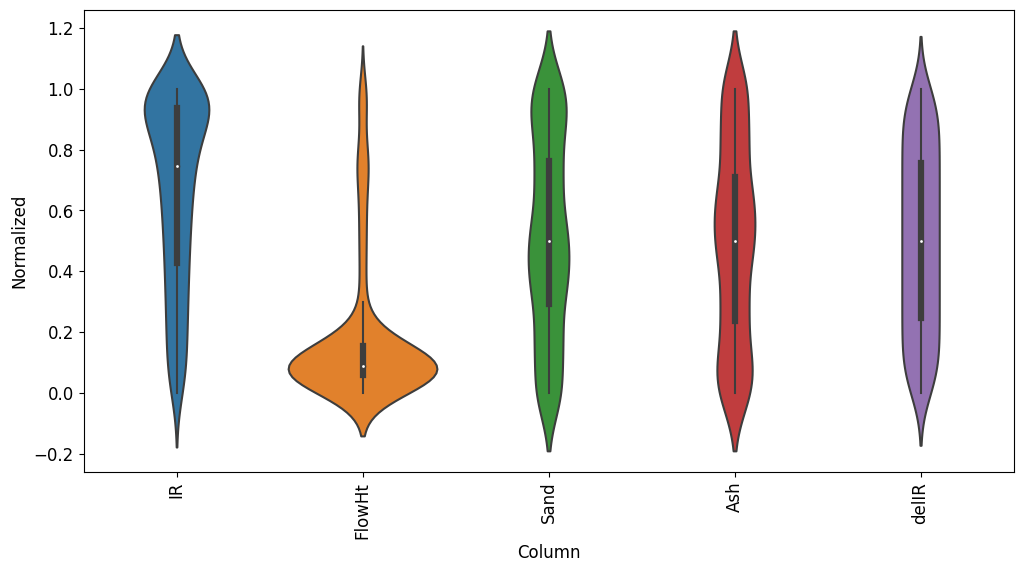

In [180]:
df3_min = df3.min()
df3_max = df3.max()
df3_std_01 = (df3 - df_min) / (df3_max-df3_min)
df3_std_m01 = df3_std_01.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std_m01)
_ = ax.set_xticklabels(df.keys(), rotation=90)
df3_std_s.describe()
plt.show()

In [181]:
lstm_model = tf.keras.models.load_model("norm02/r11")

#### predict vs.input 'as is'

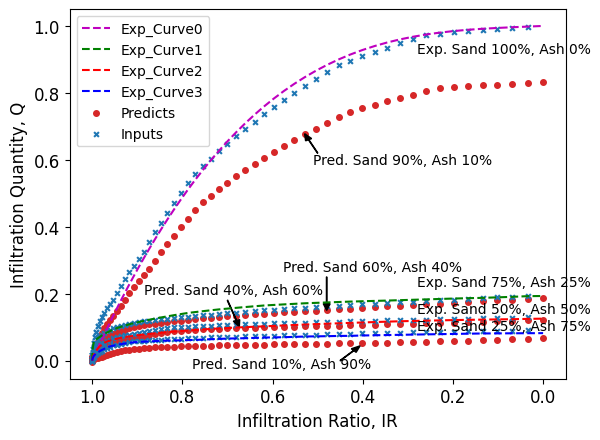

In [187]:
df3 = df3_std_01

colors = ["blue", "red", "green", "k",  "m", 'cyan', 'y', 'w']

df3_org = df3

n = len(df3)
c_21 = df3[0:int(n*0.25)].copy()
c_11 = df3[int(n*0.25):int(n*0.5)].copy()
c_31 = df3[int(n*0.5):int(n*0.75)].copy()
c_01 = df3[int(n*0.75):int(n)].copy()

fig, ax2 = plt.subplots()
data_set = [c_01, c_11, c_21, c_31 ]
#data_set = [c_31 ]

for j, data in enumerate(data_set) :
    wide_window_t.train_df = data
    ds = wide_window_t.train
    for i, batch in enumerate(ds) :
        inputs, targets, lab = batch
        predictions = lstm_model(inputs)
        ax2.scatter(lab[:,7,0], predictions[:,7,0], marker='.', color='tab:red',
                    s=64,  zorder=-1 )
        if i==0:
            ax2.scatter(lab[0,0:7,0], predictions[0,0:7,0], marker='.', color='tab:red',
                      s=64,  zorder=-1  )
        if i==0 and j==0 :
            ax2.scatter(lab[0,0:7,0], predictions[0,0:7,0], marker='.', color='tab:red',
                    label='Predicts', s=64,  zorder=-1  )

        ax2.scatter(inputs[:, 7, 0], inputs[:, 7, 1], color='tab:blue',
                    marker='x', s=12)
        if i ==0 :
            ax2.scatter(inputs[0,0:7,0], inputs[0,0:7,1], marker='x', color='tab:blue',
                     s=12)
        if i ==0 and j==0 :
            ax2.scatter(inputs[0,0:7,0], inputs[0,0:7,1], marker='x', color='tab:blue',
                     label='Inputs', s=12)
#ax2.plot(c_01.iloc[0:58,0], c_01.iloc[0:58,1], 'm-', label='Curve0')
#ax2.plot(c_11.iloc[0:58,0], c_11.iloc[0:58,1], 'g-', label='Curve1')
#ax2.plot(c_21.iloc[0:58,0], c_21.iloc[0:58,1], 'r-', label='Curve2')
#ax2.plot(c_31.iloc[0:58,0], c_31.iloc[0:58,1], 'b-', label='Curve3')
# --- experiment-------
ax2.plot(curve_0.iloc[0:58,0], curve_0.iloc[0:58,1], 'm--',  label='Exp_Curve0')
ax2.plot(curve_1.iloc[0:58,0], curve_1.iloc[0:58,1], 'g--',  label='Exp_Curve1')
ax2.plot(curve_2.iloc[0:58,0], curve_2.iloc[0:58,1], 'r--',  label='Exp_Curve2')
ax2.plot(curve_3.iloc[0:58,0], curve_3.iloc[0:58,1], 'b--',  label='Exp_Curve3')

ax2.legend(fontsize=10)

ax2.text(0.7, 0.88,  "Exp. Sand 100%, Ash 0%", fontsize=10,transform=ax2.transAxes)

ax2.text(0.49, 0.58,  "Pred. Sand 90%, Ash 10%",fontsize=10, transform=ax2.transAxes)
ax2.arrow(0.5, 0.62, 0.02, 0.04, head_width=0.015, head_length=0.02, fc='k', ec='k')

ax2.text(0.7, 0.25,  "Exp. Sand 75%, Ash 25%", fontsize=10,transform=ax2.transAxes)
ax2.text(0.7, 0.178,  "Exp. Sand 50%, Ash 50%", fontsize=10,transform=ax2.transAxes)
ax2.text(0.7, 0.131,  "Exp. Sand 25%, Ash 75%",fontsize=10, transform=ax2.transAxes)

ax2.text(0.43, 0.29,  "Pred. Sand 60%, Ash 40%",fontsize=10, transform=ax2.transAxes)
ax2.arrow(0.48, 0.25, -0.0, -0.08, head_width=0.015, head_length=0.02, fc='k', ec='k')

ax2.text(0.15, 0.23,  "Pred. Sand 40%, Ash 60%", fontsize=10,transform=ax2.transAxes)
ax2.arrow(0.7, 0.18, -0.02, -0.06, head_width=0.015, head_length=0.02, fc='k', ec='k')

ax2.text(0.247, 0.03,  "Pred. Sand 10%, Ash 90%", fontsize=10,transform=ax2.transAxes)
ax2.arrow(0.45, 0, -0.03, 0.03, head_width=0.015, head_length=0.02, fc='k', ec='k')



ax2.invert_xaxis()
ax2.set_xlabel('Infiltration Ratio, IR')
ax2.set_ylabel('Infiltration Quantity, Q')
fig.savefig("figures/other_guess.png", dpi=300)

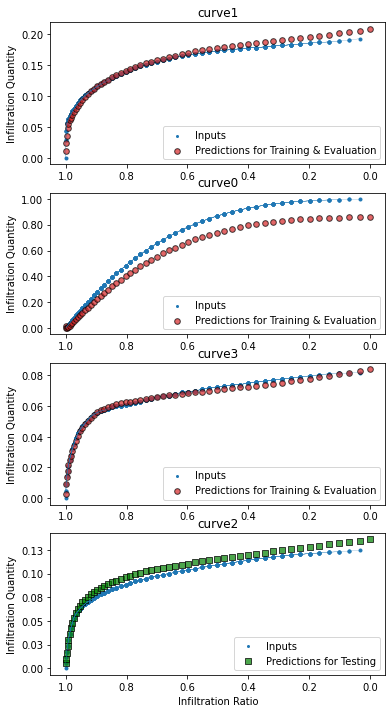

In [50]:
train_df_00 = c_01
train_df_10 = c_11
train_df_20 = c_21
train_df_30 = c_31

plot_val(lstm_model, wide_window_t)

####  Modify the future input based on the present predictions

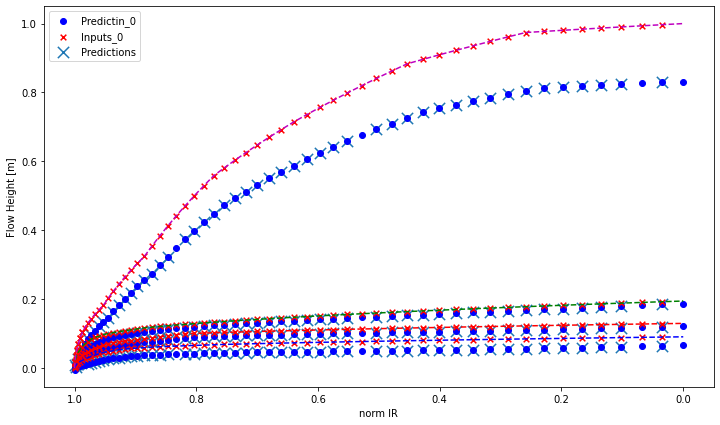

In [51]:
fig, ax2 = plt.subplots(figsize = (12,7))
#------------------------------------------
ax2.set_xlabel('norm IR')
ax2.set_ylabel('Flow Height [m]')
#ax2.set_xlim([1., 0])
#ax2.plot(curve_1.iloc[0:58,0], curve_1.iloc[0:58,1], 'g-',
#        curve_2.iloc[0:58,0], curve_2.iloc[0:58,1], 'r-',
#         curve_3.iloc[0:58,0], curve_3.iloc[0:58,1], 'b-'
#          ,curve_0.iloc[0:58,0], curve_0.iloc[0:58,1], 'm-')
#------------------------------------------
ax2.plot(c_11.iloc[0:58,0], c_11.iloc[0:58,1], 'g--',
        c_21.iloc[0:58,0], c_21.iloc[0:58,1], 'r--',
        c_31.iloc[0:58,0], c_31.iloc[0:58,1], 'b--',
        c_01.iloc[0:58,0], c_01.iloc[0:58,1], 'm--',)


def split_window( features ):
    inputs = features[:, input_slice, :]
    labels = features[:, labels_slice, :]
    lab = features[:,  labels_slice, 0:2]

    labels = tf.stack( [labels[:, :, 1] ])
    print(f'in split_window : {inputs}')
    print(f'in split_window : {labels}')

    return inputs, labels, lab
def makedata(data) :
    ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=total_window_size,
      sequence_stride=1,
      shuffle=False, #default
#      shuffle=True,
      batch_size=60,)
    ds = ds.map(split_window )
    return ds

input_width = 8
label_width = 8
shift = 1
total_window_size = input_width + shift
input_slice = slice(0, input_width)
#input_indices = np.arange(self.total_window_size)[self.input_slice]
label_start = total_window_size - label_width
labels_slice = slice(label_start, None)
#label_indices = np.arange(self.total_window_size)[self.labels_slice]

data_set = [c_01, c_11, c_21, c_31 ]
#data_set = [c_31 ]

for j, data in enumerate(data_set) :

    wide_window_t.train_df = data
    ds = wide_window_t.train

#    ds = makedata(data)

    for i, batch in enumerate(ds) :
        inputs, labels, lab = batch
        inputs = inputs.numpy()

        predictions = lstm_model(inputs)
        # for good data, it is OK
        if i == 0 :
            ax2.scatter(lab[0,0:7,0], predictions[0,0:7,0], marker='o', color ='b'  )
            ax2.scatter(inputs[0, 0:7, 0], inputs[0, 0:7, 1],
                  color ='r',  marker='x', s=32)
        if i == 0 and j==0   :
            ax2.scatter(lab[0,0:7,0], predictions[0,0:7,0], marker='o', color ='b',label='Predictin_0')
            ax2.scatter(inputs[0, 0:7, 0], inputs[0, 0:7, 1],label='Inputs_0',
                  color ='r',  marker='x', s=32)

        ax2.scatter(lab[:,7,0], predictions[:,7,0], marker='o', color ='b')
        ax2.scatter(inputs[:, 7, 0], inputs[:, 7, 1],
                  color ='r',  marker='x', s=32)

        if i > 0 :
            #inputs[0,:,1] = inputs_res[-1:,:,1]
            pass
        for n in range (len(inputs)-1) :
        #for n in range (15) :
            #predictions = lstm_model(inputs)
            prediction = lstm_model(inputs[n:n+1])
            #ax2.scatter(lab[n,0, 0],  prediction[0,0,0],marker='X', label='Predictions', c='tab:red', s=128, zorder=-10 )
            ax2.scatter(lab[n,7,0 ],  prediction[0,7,0] ,marker='x',
                     c='tab:blue', s=128, zorder=-10 )
            if j==0 and i==0 and n==0  :
                ax2.scatter(lab[n, 0:7,0 ],  prediction[n, 0:7,0 ] ,marker='x',
                        label='Predictions', c='tab:blue', s=128, zorder=-10 )
            prediction = prediction.numpy()

            inputs[n+1, 0, 1] = prediction[0, 0, 0]
            #inputs[n+1, :, 1] = predictions[n, :, 0]

        inputs = tf.convert_to_tensor(inputs, dtype=tf.float32)
        inputs_res = inputs

        #predictions = tf.convert_to_tensor(predictions, dtype=tf.float32)
        #predictions = lstm_model(inputs)
#        ax2.scatter(lab[:,:, 0],  predictions[:, :, 0],marker='o', edgecolors=None, label='Predictions'
#             ,facecolors='red'  )# , c='#ff7f0e', s=64)
#        ax2.scatter(inputs[:, :, 0], inputs[:, :, 1],label='Inputs', marker='x')
        #ax2.scatter(lab[:,0, 0],  predictions[:, 0, 0],marker='.', label='Predictions'
        #      , c='tab:red', s=128)
        #ax2.scatter(inputs[:, 0, 0], inputs[:, 0, 1],label='Inputs', marker='X', s=64,  zorder=-10)
ax2.legend()

#ax2.set_ylim([-10, 70])
ax2.invert_xaxis()

#### read Bad data


In [ ]:
df4 = pd.read_csv(
    os.path.join(mglearn.datasets.DATA_PATH, "anycurve3.csv") ) # bad data
    #os.path.join(mglearn.datasets.DATA_PATH, "constant(del).csv") )

df4 = df4[['IR', 'FlowHt', 'Sand','Ash','delIR','delFlow']]
df4['delIF'] = df4['delFlow']/df4['delIR']*-1

df4['delIF']=df4['delIF'].replace(np.nan, 0)
df4 = df4[['IR', 'FlowHt', 'Sand','Ash', 'delIR' ]]

display(df4.head())

In [ ]:
df4_mean = df4.mean()
df4_std = df4.std()
df4_std_s = (df4 - df4_mean) / df4_std
df4_std_m = df4_std_s.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df4_std_m)
_ = ax.set_xticklabels(df4.keys(), rotation=90)
df4_std_s.describe()

In [ ]:
df4_min = df4.min()
df4_max = df4.max()
df4_std_01 = (df4 - df4_min) / (df4_max-df4_min)
df4_std_m01 = df4_std_01.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std_m01)
_ = ax.set_xticklabels(df.keys(), rotation=90)
df_std_s.describe()
plt.show()

In [ ]:
df4 = df4_std_01

In [ ]:
colors = ["blue", "red", "green", "k",  "m", 'cyan', 'y', 'w']



n = len(df4)
c_2 = df4[0:int(n*0.25)].copy()
c_1 = df4[int(n*0.25):int(n*0.5)].copy()
c_3 = df4[int(n*0.5):int(n*0.75)].copy()
c_0 = df4[int(n*0.75):int(n)].copy()


fig, ax2 = plt.subplots()

#data_set = [c_0, c_1, c_2, c_3 ]
data_set = [c_0, c_1, c_2, c_3 ]

for j, data in enumerate(data_set) :
    wide_window_t.train_df = data
    ds = wide_window_t.train

    for n, batch in enumerate(ds) :
        inputs, targets, lab = batch
        predictions = lstm_model(inputs)
        ax2.scatter(lab[:,0,0], predictions[:,0,0], marker='o', color='b' )
        ax2.scatter(inputs[:, 0, 0], inputs[:, 0, 1],label='Inputs',
                   color='r', marker='x', s=32)

ax2.plot(curve_1.iloc[0:58,0], curve_1.iloc[0:58,1], 'g-',
        curve_2.iloc[0:58,0], curve_2.iloc[0:58,1], 'r-',
        curve_3.iloc[0:58,0], curve_3.iloc[0:58,1], 'b-',
        curve_0.iloc[0:58,0], curve_0.iloc[0:58,1], 'm-',)

ax2.plot(c_1.iloc[0:58,0], c_1.iloc[0:58,1], 'g--',
            c_2.iloc[0:58,0], c_2.iloc[0:58,1], 'r--',
            c_3.iloc[0:58,0], c_3.iloc[0:58,1], 'b--',
            c_0.iloc[0:58,0], c_0.iloc[0:58,1], 'm--',)


ax2.set_xlim([0, 1.05])

ax2.invert_xaxis()

In [ ]:
train_df_00 = c_0
train_df_10 = c_1
train_df_20 = c_2
train_df_30 = c_3

plot_val(lstm_model, wide_window_t)

In [ ]:
fig, ax2 = plt.subplots(figsize = (12,7))

train_df_3 = curve_3.copy()
train_df_2 = curve_2.copy()
train_df_1 = curve_1.copy()
train_df_0 = curve_0.copy()
#plots_t.plot_all(train_df_0, set_name='0', marker2='o' ,model=conv_model,window_t=conv_window_t, edgecolor2 ='g')
#------------------------------------------
ax2.set_xlabel('norm IR')
ax2.set_ylabel('Flow Height [m]')
#ax2.set_xlim([1., 0])
#ax2.plot(curve_1.iloc[0:58,0], curve_1.iloc[0:58,1], 'g-',
#        curve_2.iloc[0:58,0], curve_2.iloc[0:58,1], 'r-',
#         curve_3.iloc[0:58,0], curve_3.iloc[0:58,1], 'b-'
#          ,curve_0.iloc[0:58,0], curve_0.iloc[0:58,1], 'm-')
#------------------------------------------
ax2.plot(c_1.iloc[0:58,0], c_1.iloc[0:58,1], 'g--',
        c_2.iloc[0:58,0], c_2.iloc[0:58,1], 'r--',
        c_3.iloc[0:58,0], c_3.iloc[0:58,1], 'b--',
        c_0.iloc[0:58,0], c_0.iloc[0:58,1], 'm--',)


def split_window( features ):
    inputs = features[:, input_slice, :]
    labels = features[:, labels_slice, :]
    lab = features[:,  labels_slice, 0:2]

    labels = tf.stack( [labels[:, :, 1] ])
    print(f'in split_window : {inputs}')
    print(f'in split_window : {labels}')

    return inputs, labels, lab
def makedata(data) :
    ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=total_window_size,
      sequence_stride=1,
      shuffle=False, #default
#      shuffle=True,
      batch_size=60,)
    ds = ds.map(split_window )
    return ds

input_width = 8
label_width = 8
shift = 1
total_window_size = input_width + shift
input_slice = slice(0, input_width)
#input_indices = np.arange(self.total_window_size)[self.input_slice]
label_start = total_window_size - label_width
labels_slice = slice(label_start, None)
#label_indices = np.arange(self.total_window_size)[self.labels_slice]

#data_set = [c_0, c_1, c_2, c_3 ]
data_set = [c_0, c_1, c_2, c_3 ]


for j, data in enumerate(data_set) :

    wide_window_t.train_df = data
    ds = wide_window_t.train

#    ds = makedata(data)

    for i, batch in enumerate(ds) :
        inputs, labels, lab = batch
        inputs = inputs.numpy()

        predictions = lstm_model(inputs)
        # for good data, it is OK
        ax2.scatter(lab[:,0,0], predictions[:,0,0], marker='o', color ='b')
        ax2.scatter(inputs[:, 0, 0], inputs[:, 0, 1],label='Inputs', marker='X', s=32)

        if i > 0 :
            #inputs[0,:,1] = inputs_res[-1:,:,1]
            pass
        for n in range (len(inputs)-1) :
        #for n in range (15) :
            #predictions = lstm_model(inputs)
            prediction = lstm_model(inputs[n:n+1])
            #ax2.scatter(lab[n,0, 0],  prediction[0,0,0],marker='X', label='Predictions', c='tab:red', s=128, zorder=-10 )
            ax2.scatter(lab[n, 7 , 0],  prediction[0, 7 ,0],marker='x',
                        label='Predictions', c='tab:blue', s=32, zorder=-10 )
            #ax2.scatter(inputs[n, 0 , 0], inputs[n, 0 , 1],label='Inputs', marker='o', s=64,  zorder=-10)

            prediction = prediction.numpy()

            inputs[n+1, 0, 1] = prediction[0, 0, 0]
            #inputs[n+1, :, 1] = predictions[n, :, 0]

        inputs = tf.convert_to_tensor(inputs, dtype=tf.float32)
        inputs_res = inputs


ax2.set_xlim([1.05,0])
#ax2.invert_xaxis()

#### read Similar data

In [ ]:
df5 = pd.read_csv(
    #os.path.join(mglearn.datasets.DATA_PATH, "anycurve3.csv") )
    os.path.join(mglearn.datasets.DATA_PATH, "constant(del)2.csv") ) # input experiment

df5 = df5[['IR', 'FlowHt', 'Sand','Ash','delIR','delFlow']]
#df5['delIF'] = df5['delFlow']/df5['delIR']*-1

#df5['delIF']=df5['delIF'].replace(np.nan, 0)
df5 = df5[['IR', 'FlowHt', 'Sand','Ash', 'delIR' ]]

display(df5.head())

In [ ]:
df5_mean = df5.mean()
df5_std = df5.std()
df5_std_s = (df5 - df5_mean) / df5_std
df5_std_m = df5_std_s.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df5_std_m)
_ = ax.set_xticklabels(df5.keys(), rotation=90)
df5_std_s.describe()

In [ ]:
df5_min = df5.min()
df5_max = df5.max()
df5_std_01 = (df5 - df_min) / (df5_max-df5_min)
df5_std_m01 = df5_std_01.melt(var_name='Column', value_name='Normalized')
plt.figure(figsize=(12, 6))
ax = sns.violinplot(x='Column', y='Normalized', data=df_std_m01)
_ = ax.set_xticklabels(df.keys(), rotation=90)
df_std_s.describe()
plt.show()

In [ ]:
df5 = df5_std_01

In [ ]:
lstm_model = tf.keras.models.load_model("norm02/r11")

In [ ]:
colors = ["blue", "red", "green", "k",  "m", 'cyan', 'y', 'w']

df5_org = df5

n = len(df5)
c_22 = df5[0:int(n*0.25)].copy()
c_12 = df5[int(n*0.25):int(n*0.5)].copy()
c_32 = df5[int(n*0.5):int(n*0.75)].copy()
c_02 = df5[int(n*0.75):int(n)].copy()

fig, ax2 = plt.subplots()
data_set = [c_02, c_12, c_22, c_32 ]
#data_set = [c_31 ]

for j, data in enumerate(data_set) :
    wide_window_t.train_df = data
    ds = wide_window_t.train

    for i, batch in enumerate(ds) :
        inputs, targets, lab = batch
        predictions = lstm_model(inputs)
        ax2.scatter(lab[:,7,0], predictions[:,7,0], marker='o', color='tab:red',
                    s=16 )
        if i==0:
            ax2.scatter(lab[0,0:7,0], predictions[0,0:7,0], marker='o', color='tab:red',
                      s=16 )
        if i==0 and j==0 :
            ax2.scatter(lab[0,0:7,0], predictions[0,0:7,0], marker='o', color='tab:red',
                    label='Predicts', s=16 )

        ax2.scatter(inputs[:, 7, 0], inputs[:, 7, 1], color='tab:blue',
                    marker='x', s=16)
        if i ==0 :
            ax2.scatter(inputs[0,0:7,0], inputs[0,0:7,1], marker='x', color='tab:blue',
                     s=16)
        if i ==0 and j==0 :
            ax2.scatter(inputs[0,0:7,0], inputs[0,0:7,1], marker='x', color='tab:blue',
                     label='Inputs', s=16)
# --- experiment-------
ax2.plot(curve_1.iloc[0:58,0], curve_1.iloc[0:58,1], 'g-',
        curve_2.iloc[0:58,0], curve_2.iloc[0:58,1], 'r-',
        curve_3.iloc[0:58,0], curve_3.iloc[0:58,1], 'b-',
        curve_0.iloc[0:58,0], curve_0.iloc[0:58,1], 'm-',)
# ---- input equivalent to experiment -----
ax2.plot(c_12.iloc[0:58,0], c_12.iloc[0:58,1], 'tab:red',
        c_22.iloc[0:58,0], c_22.iloc[0:58,1], 'r--',
        c_32.iloc[0:58,0], c_32.iloc[0:58,1], 'b--',
        c_02.iloc[0:58,0], c_02.iloc[0:58,1], 'm--', zorder=1)
#-- guessed data---------------------------------------
ax2.plot(c_11.iloc[0:58,0], c_11.iloc[0:58,1], 'g--',
        c_21.iloc[0:58,0], c_21.iloc[0:58,1], 'r--',
        c_31.iloc[0:58,0], c_31.iloc[0:58,1], 'b--',
        c_01.iloc[0:58,0], c_01.iloc[0:58,1], 'm--',)
ax2.set_xlim(0.0, 1.03)
ax2.invert_xaxis()

In [ ]:
train_df_00 = c_02
train_df_10 = c_12
train_df_20 = c_22
train_df_30 = c_32

plot_val(lstm_model, wide_window_t)

In [ ]:
fig, ax2 = plt.subplots(figsize = (12,7))
#------------------------------------------
ax2.set_xlabel('norm IR')
ax2.set_ylabel('Flow Height [m]')
#ax2.set_xlim([1., 0])
ax2.plot(curve_1.iloc[0:58,0], curve_1.iloc[0:58,1], 'g-',
        curve_2.iloc[0:58,0], curve_2.iloc[0:58,1], 'r-',
         curve_3.iloc[0:58,0], curve_3.iloc[0:58,1], 'b-'
          ,curve_0.iloc[0:58,0], curve_0.iloc[0:58,1], 'm-')
#------------------------------------------
ax2.plot(c_12.iloc[0:58,0], c_12.iloc[0:58,1], 'g--',
        c_22.iloc[0:58,0], c_22.iloc[0:58,1], 'r--',
        c_32.iloc[0:58,0], c_32.iloc[0:58,1], 'b--',
        c_02.iloc[0:58,0], c_02.iloc[0:58,1], 'm--',)


def split_window( features ):
    inputs = features[:, input_slice, :]
    labels = features[:, labels_slice, :]
    lab = features[:,  labels_slice, 0:2]

    labels = tf.stack( [labels[:, :, 1] ])
    print(f'in split_window : {inputs}')
    print(f'in split_window : {labels}')

    return inputs, labels, lab
def makedata(data) :
    ds = tf.keras.preprocessing.timeseries_dataset_from_array(
      data=data,
      targets=None,
      sequence_length=total_window_size,
      sequence_stride=1,
      shuffle=False, #default
#      shuffle=True,
      batch_size=60,)
    ds = ds.map(split_window )
    return ds

input_width = 8
label_width = 8
shift = 1
total_window_size = input_width + shift
input_slice = slice(0, input_width)
#input_indices = np.arange(self.total_window_size)[self.input_slice]
label_start = total_window_size - label_width
labels_slice = slice(label_start, None)
#label_indices = np.arange(self.total_window_size)[self.labels_slice]

data_set = [c_02, c_12, c_22, c_32 ]
#data_set = [c_31 ]

for j, data in enumerate(data_set) :

    wide_window_t.train_df = data
    ds = wide_window_t.train

#    ds = makedata(data)

    for i, batch in enumerate(ds) :
        inputs, labels, lab = batch
        inputs = inputs.numpy()

        predictions = lstm_model(inputs)
        # for good data, it is OK
        ax2.scatter(lab[:,0,0], predictions[:,0,0], marker='o', color ='b')
        #ax2.scatter(inputs[:, 0, 0], inputs[:, 0, 1],label='Inputs', marker='X', s=32)

        if i > 0 :
            #inputs[0,:,1] = inputs_res[-1:,:,1]
            pass
        for n in range (len(inputs)-1) :
        #for n in range (15) :
            #predictions = lstm_model(inputs)
            prediction = lstm_model(inputs[n:n+1])
            #ax2.scatter(lab[n,0, 0],  prediction[0,0,0],marker='X', label='Predictions', c='tab:red', s=128, zorder=-10 )
            ax2.scatter(lab[n, 7 , 0],  prediction[0, 7 ,0],marker='x', label='Predictions', c='tab:red', s=128, zorder=-10 )
            #ax2.scatter(inputs[n, 0 , 0], inputs[n, 0 , 1],label='Inputs', marker='o', s=64,  zorder=-10)

            prediction = prediction.numpy()

            inputs[n+1, 0, 1] = prediction[0, 0, 0]
            #inputs[n+1, :, 1] = predictions[n, :, 0]

        inputs = tf.convert_to_tensor(inputs, dtype=tf.float32)
        inputs_res = inputs

        #predictions = tf.convert_to_tensor(predictions, dtype=tf.float32)
        #predictions = lstm_model(inputs)
#        ax2.scatter(lab[:,:, 0],  predictions[:, :, 0],marker='o', edgecolors=None, label='Predictions'
#             ,facecolors='red'  )# , c='#ff7f0e', s=64)
#        ax2.scatter(inputs[:, :, 0], inputs[:, :, 1],label='Inputs', marker='x')
        #ax2.scatter(lab[:,0, 0],  predictions[:, 0, 0],marker='.', label='Predictions'
        #      , c='tab:red', s=128)
        #ax2.scatter(inputs[:, 0, 0], inputs[:, 0, 1],label='Inputs', marker='X', s=64,  zorder=-10)

#ax2.set_ylim([-10, 70])
ax2.invert_xaxis()

#------------------------------------------
ax2.plot(c_11.iloc[0:58,0], c_11.iloc[0:58,1], 'g--',
        c_21.iloc[0:58,0], c_21.iloc[0:58,1], 'r--',
        c_31.iloc[0:58,0], c_31.iloc[0:58,1], 'b--',
        c_01.iloc[0:58,0], c_01.iloc[0:58,1], 'm--',)
